In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pandas_datareader.data as web

from yahoo_fin import options
import yahoo_fin.stock_info as si

In [2]:
SMALL_SIZE = 12+2
MEDIUM_SIZE = 14+2
BIGGER_SIZE = 16+2

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE-2)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [3]:
#msft = yf.Ticker('msft')
#dates = options.get_options_chain("msft")

dates = options.get_expiration_dates("nflx")
dates
#dates[0]
#msft.options[0]
#msft

['March 1, 2024',
 'March 8, 2024',
 'March 15, 2024',
 'March 22, 2024',
 'March 28, 2024',
 'April 5, 2024',
 'April 19, 2024',
 'May 17, 2024',
 'June 21, 2024',
 'July 19, 2024',
 'September 20, 2024',
 'December 20, 2024',
 'January 17, 2025',
 'June 20, 2025',
 'December 19, 2025',
 'January 16, 2026',
 'December 18, 2026']

In [4]:
from datetime import datetime
current_datetime = datetime.now().strftime("%Y-%m-%d %H-%M-%S")

current_datetime

'2024-02-29 19-50-04'

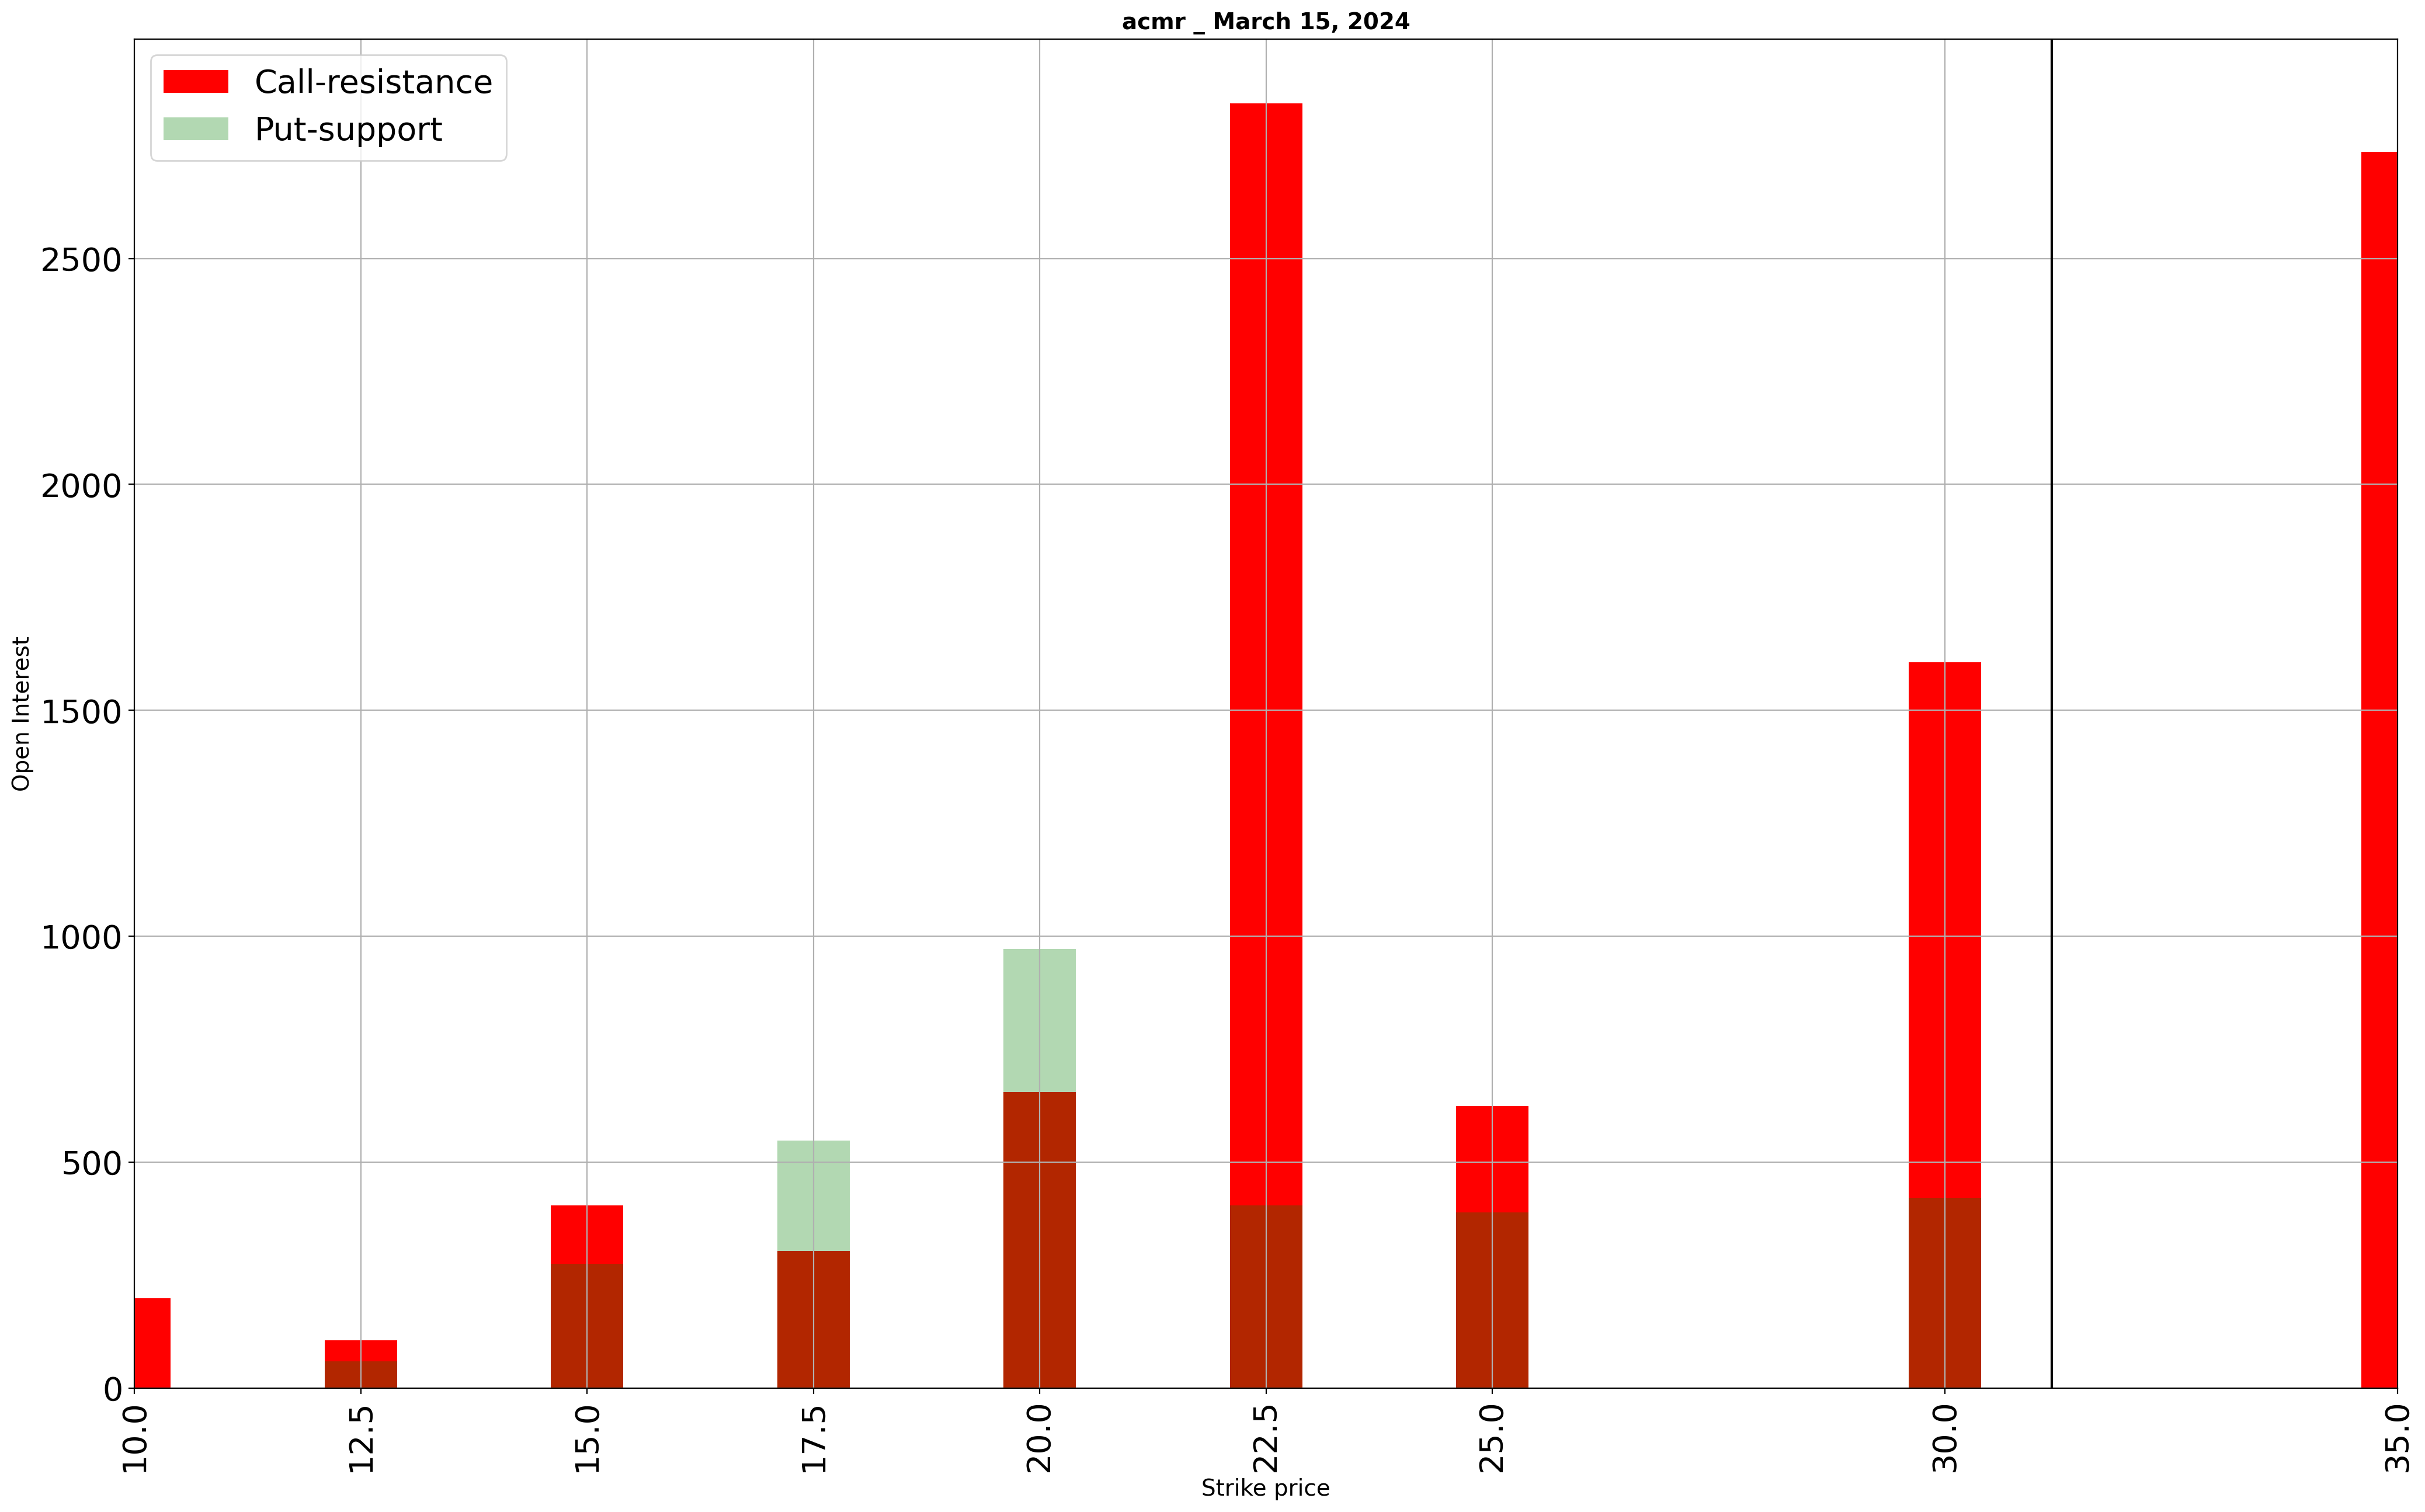

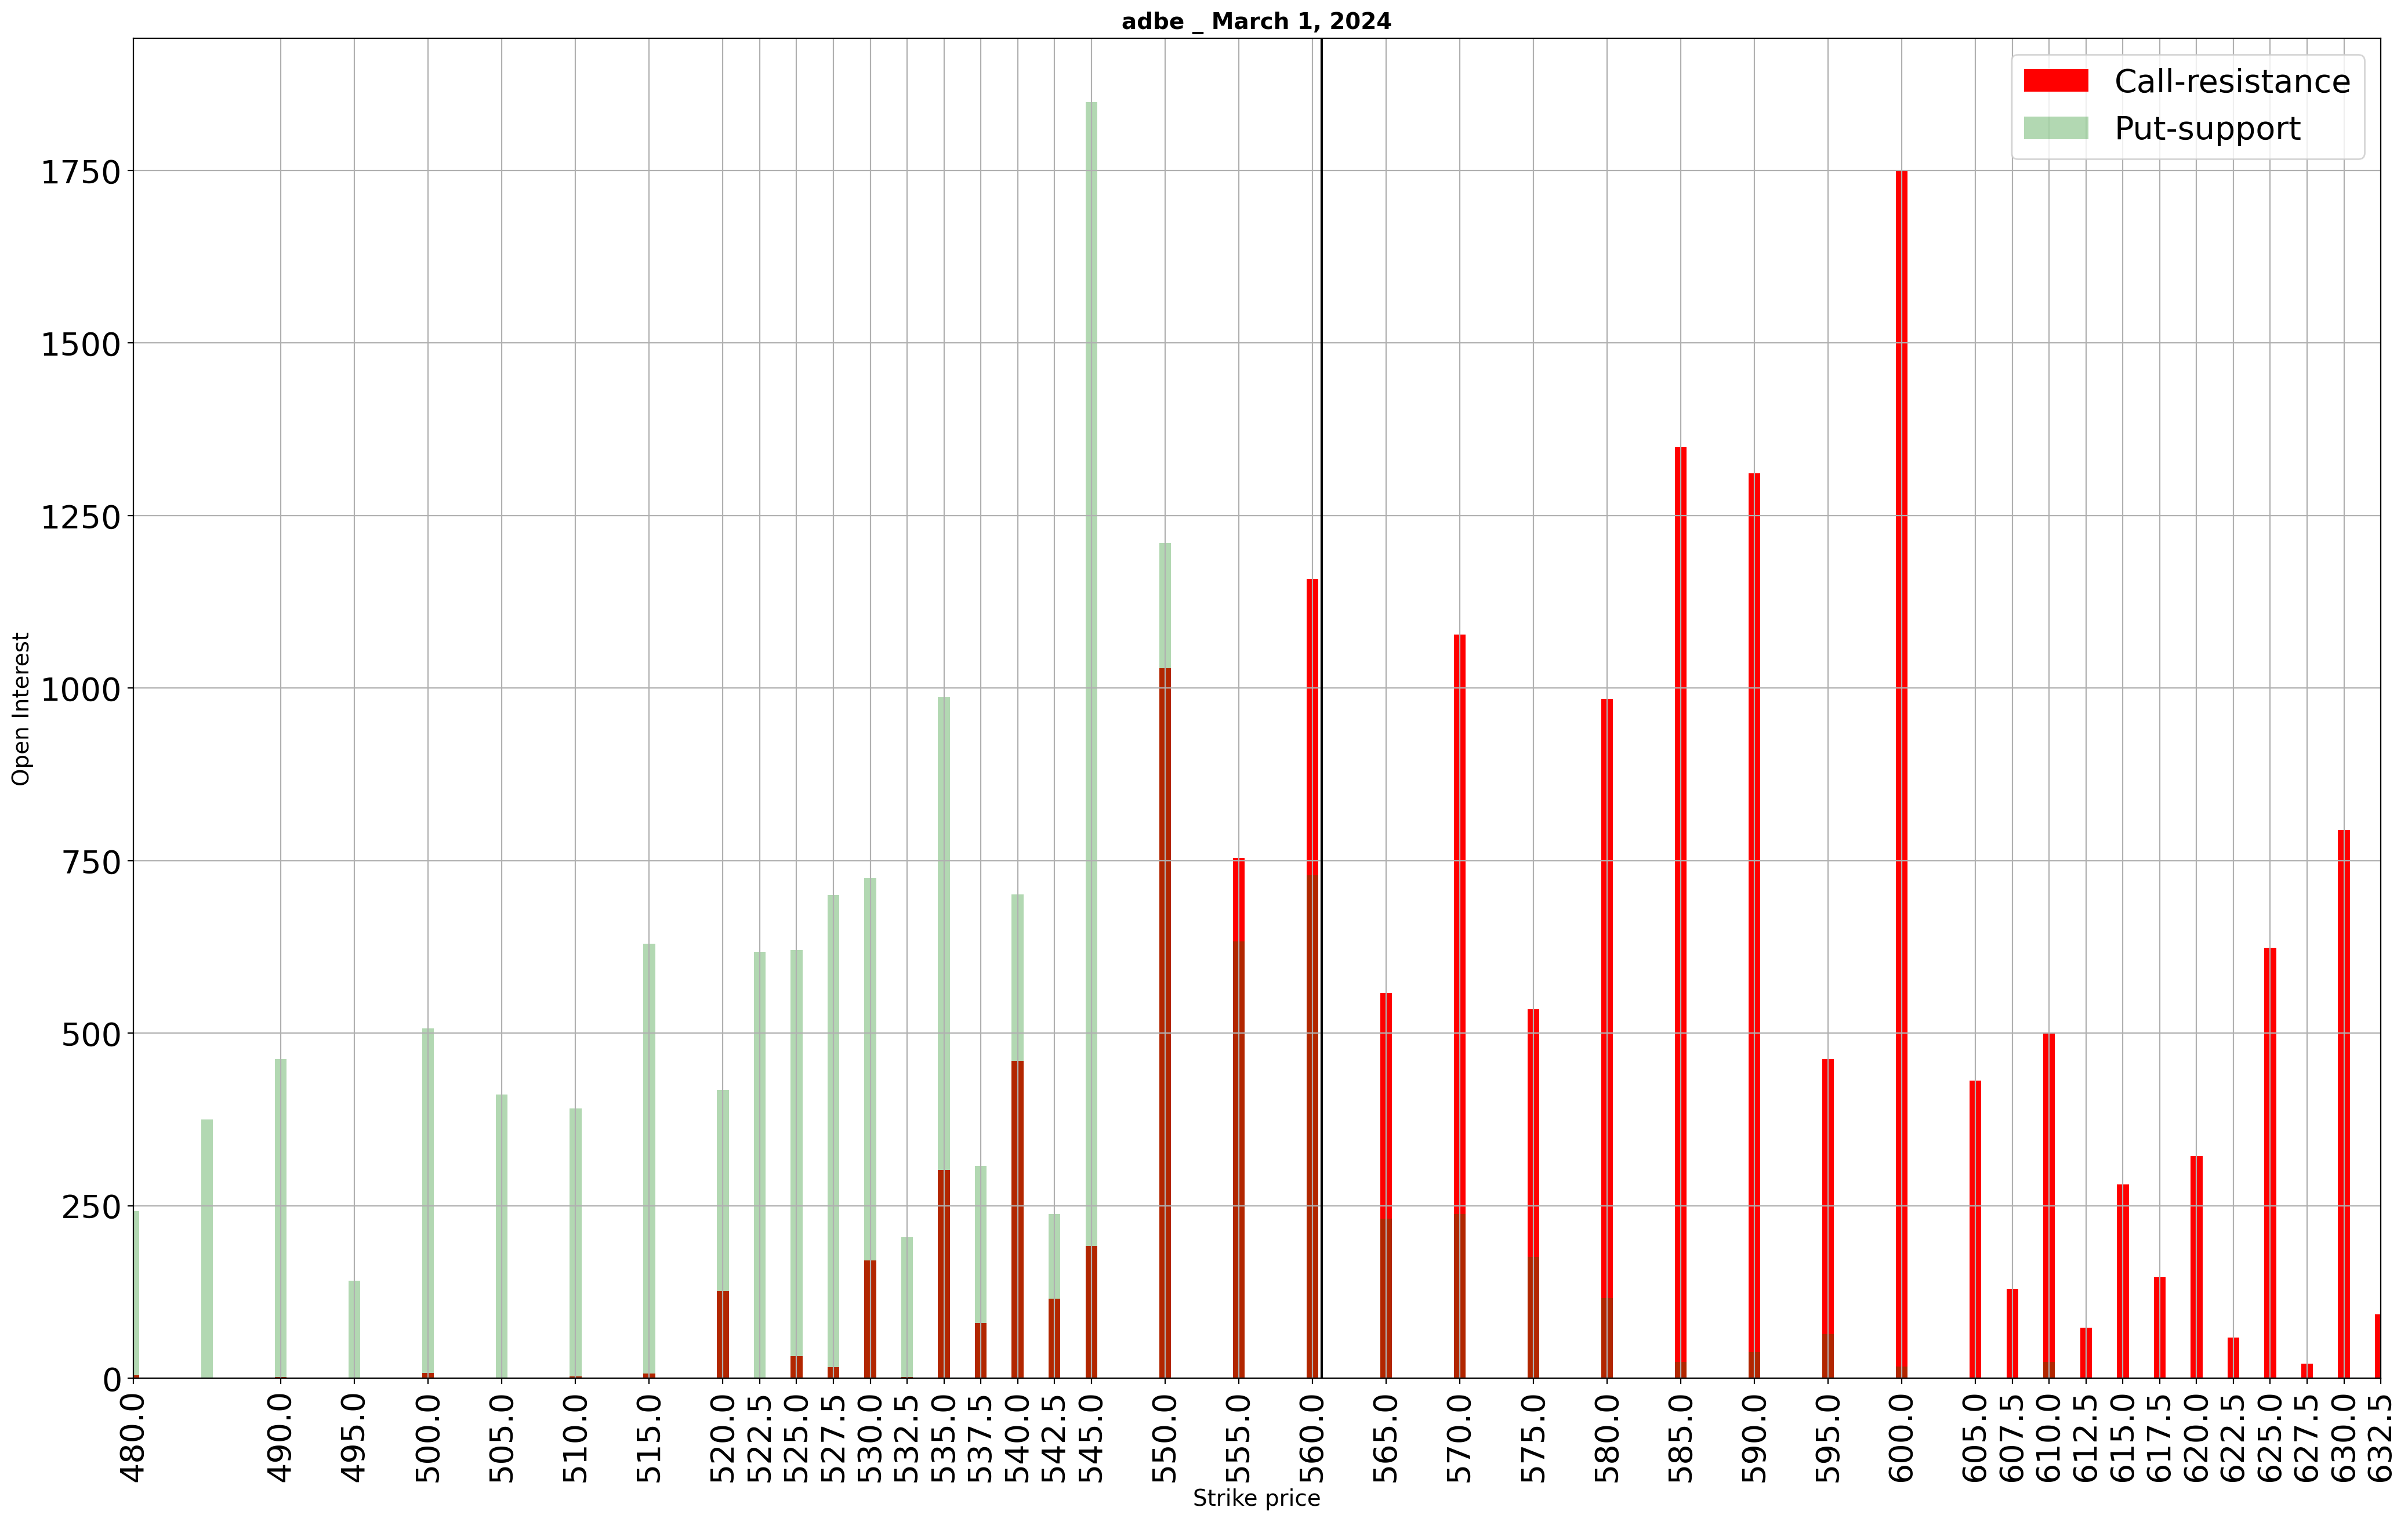

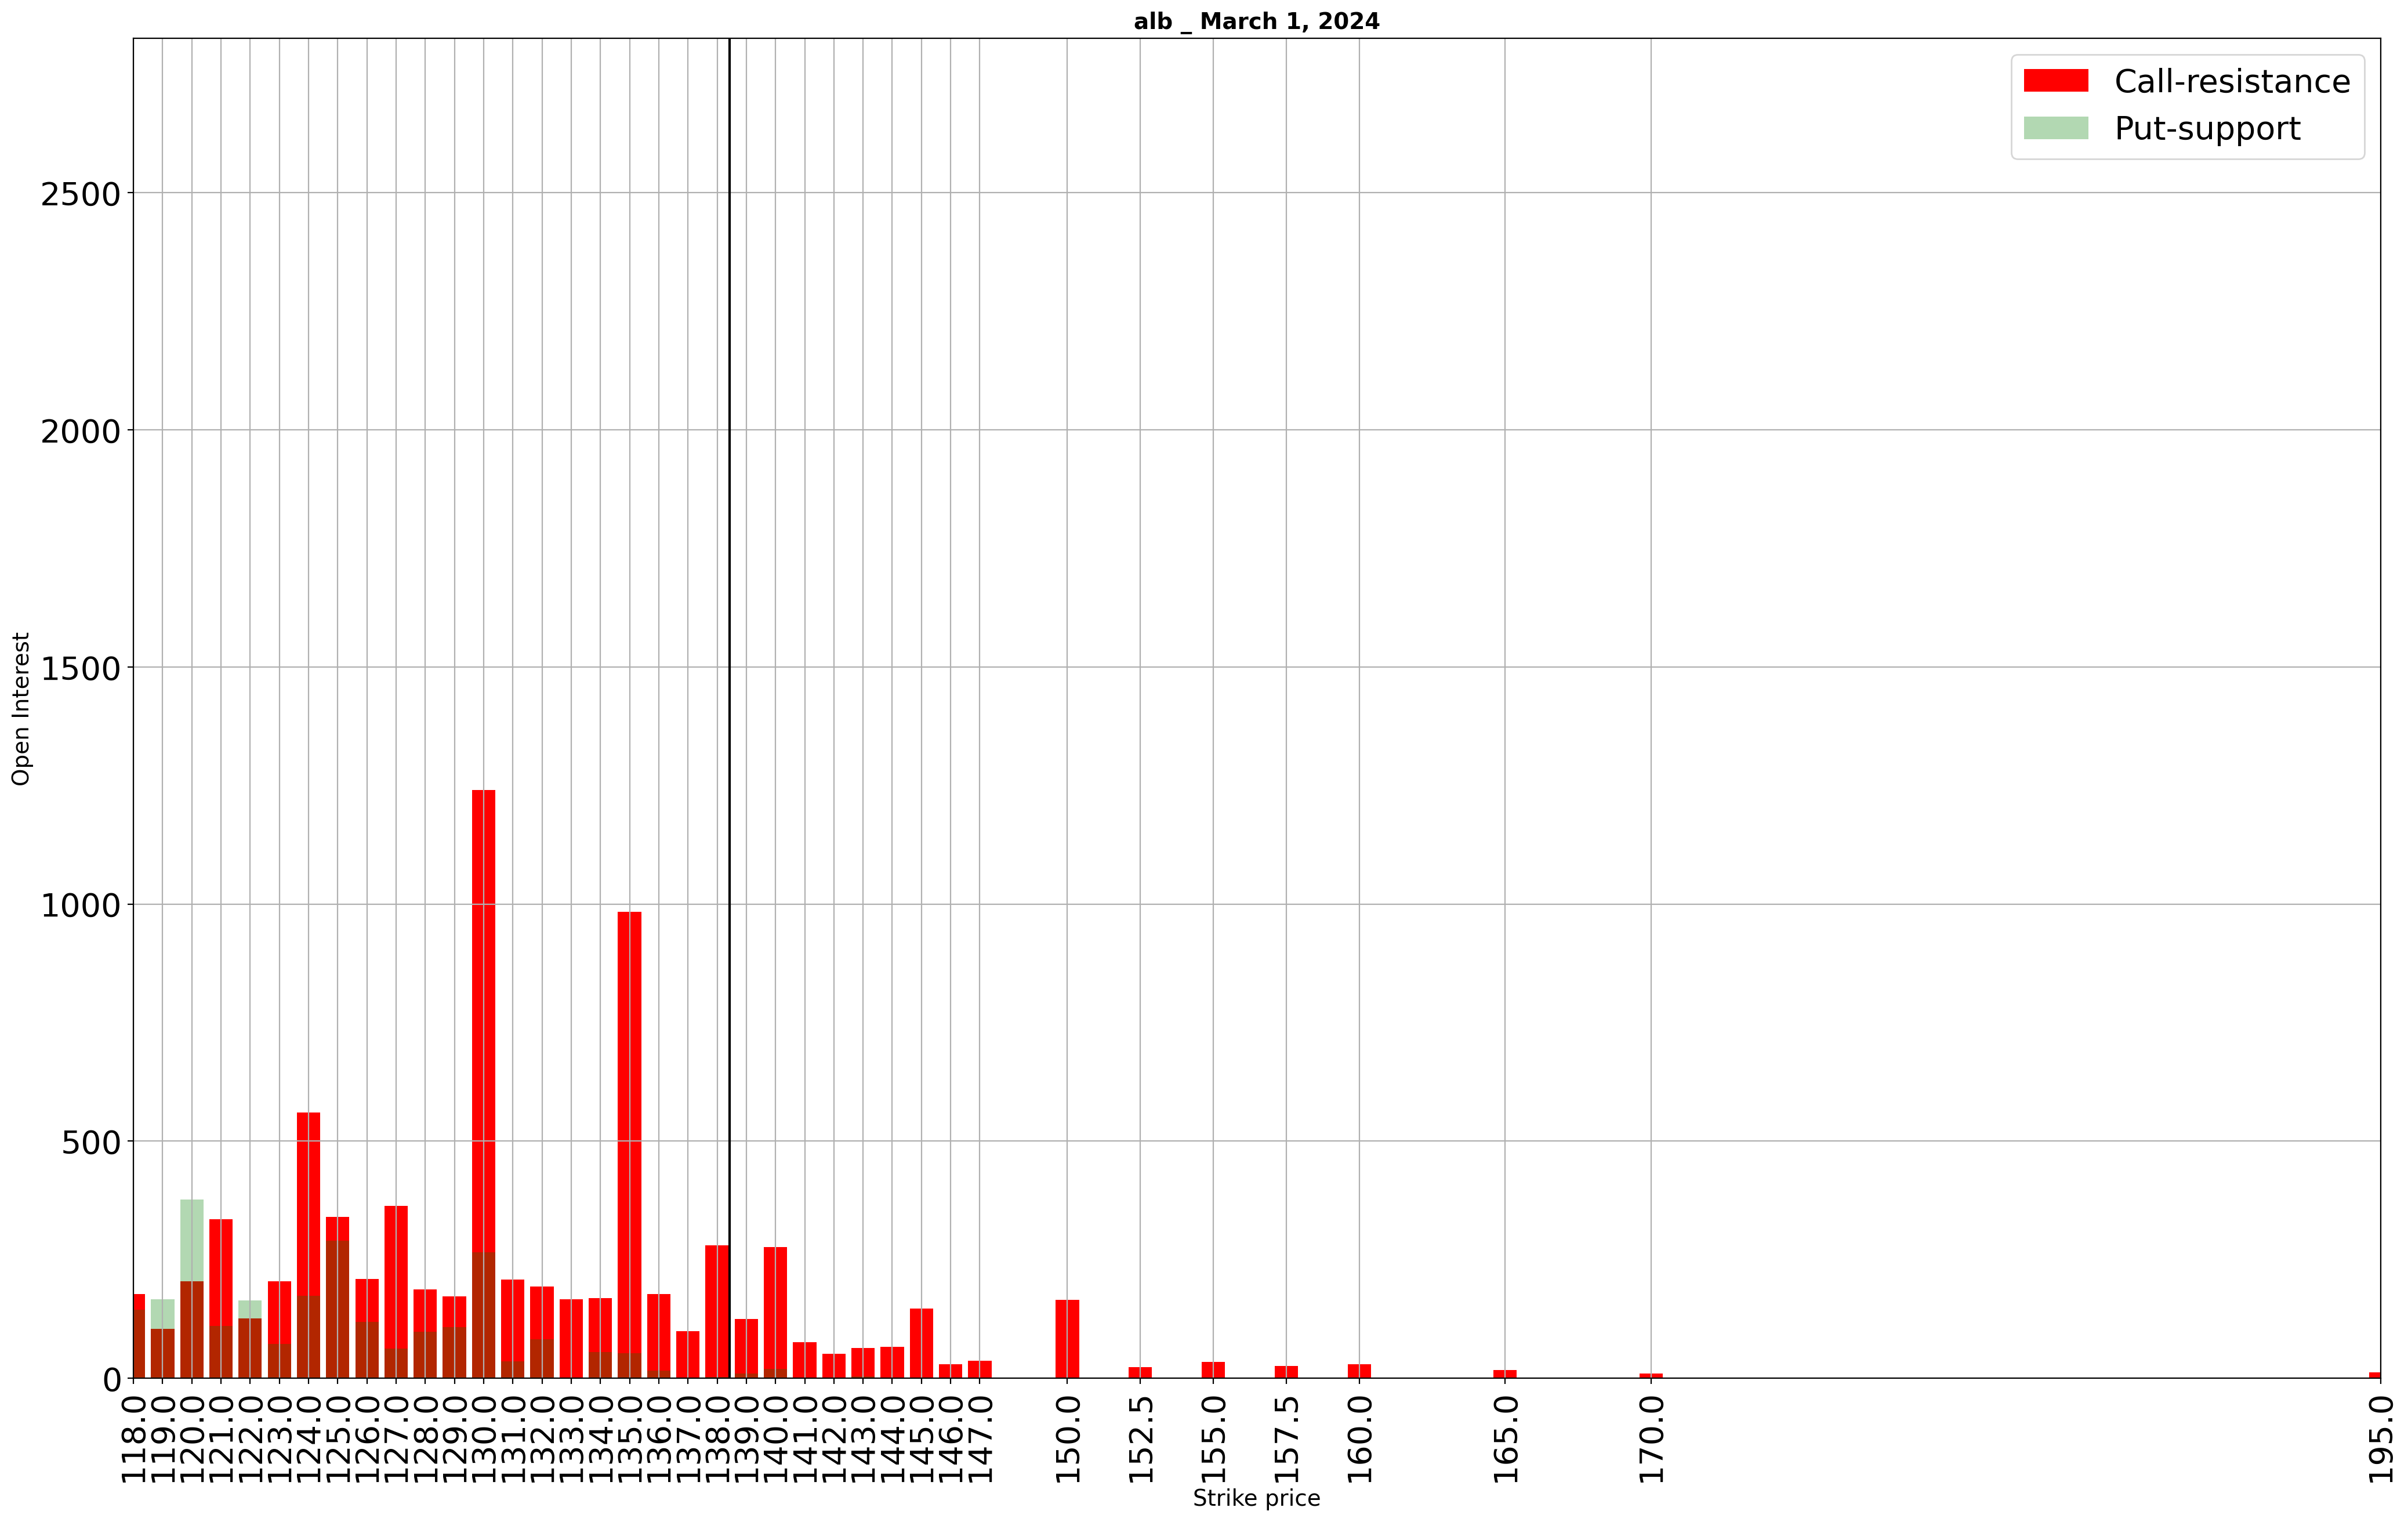

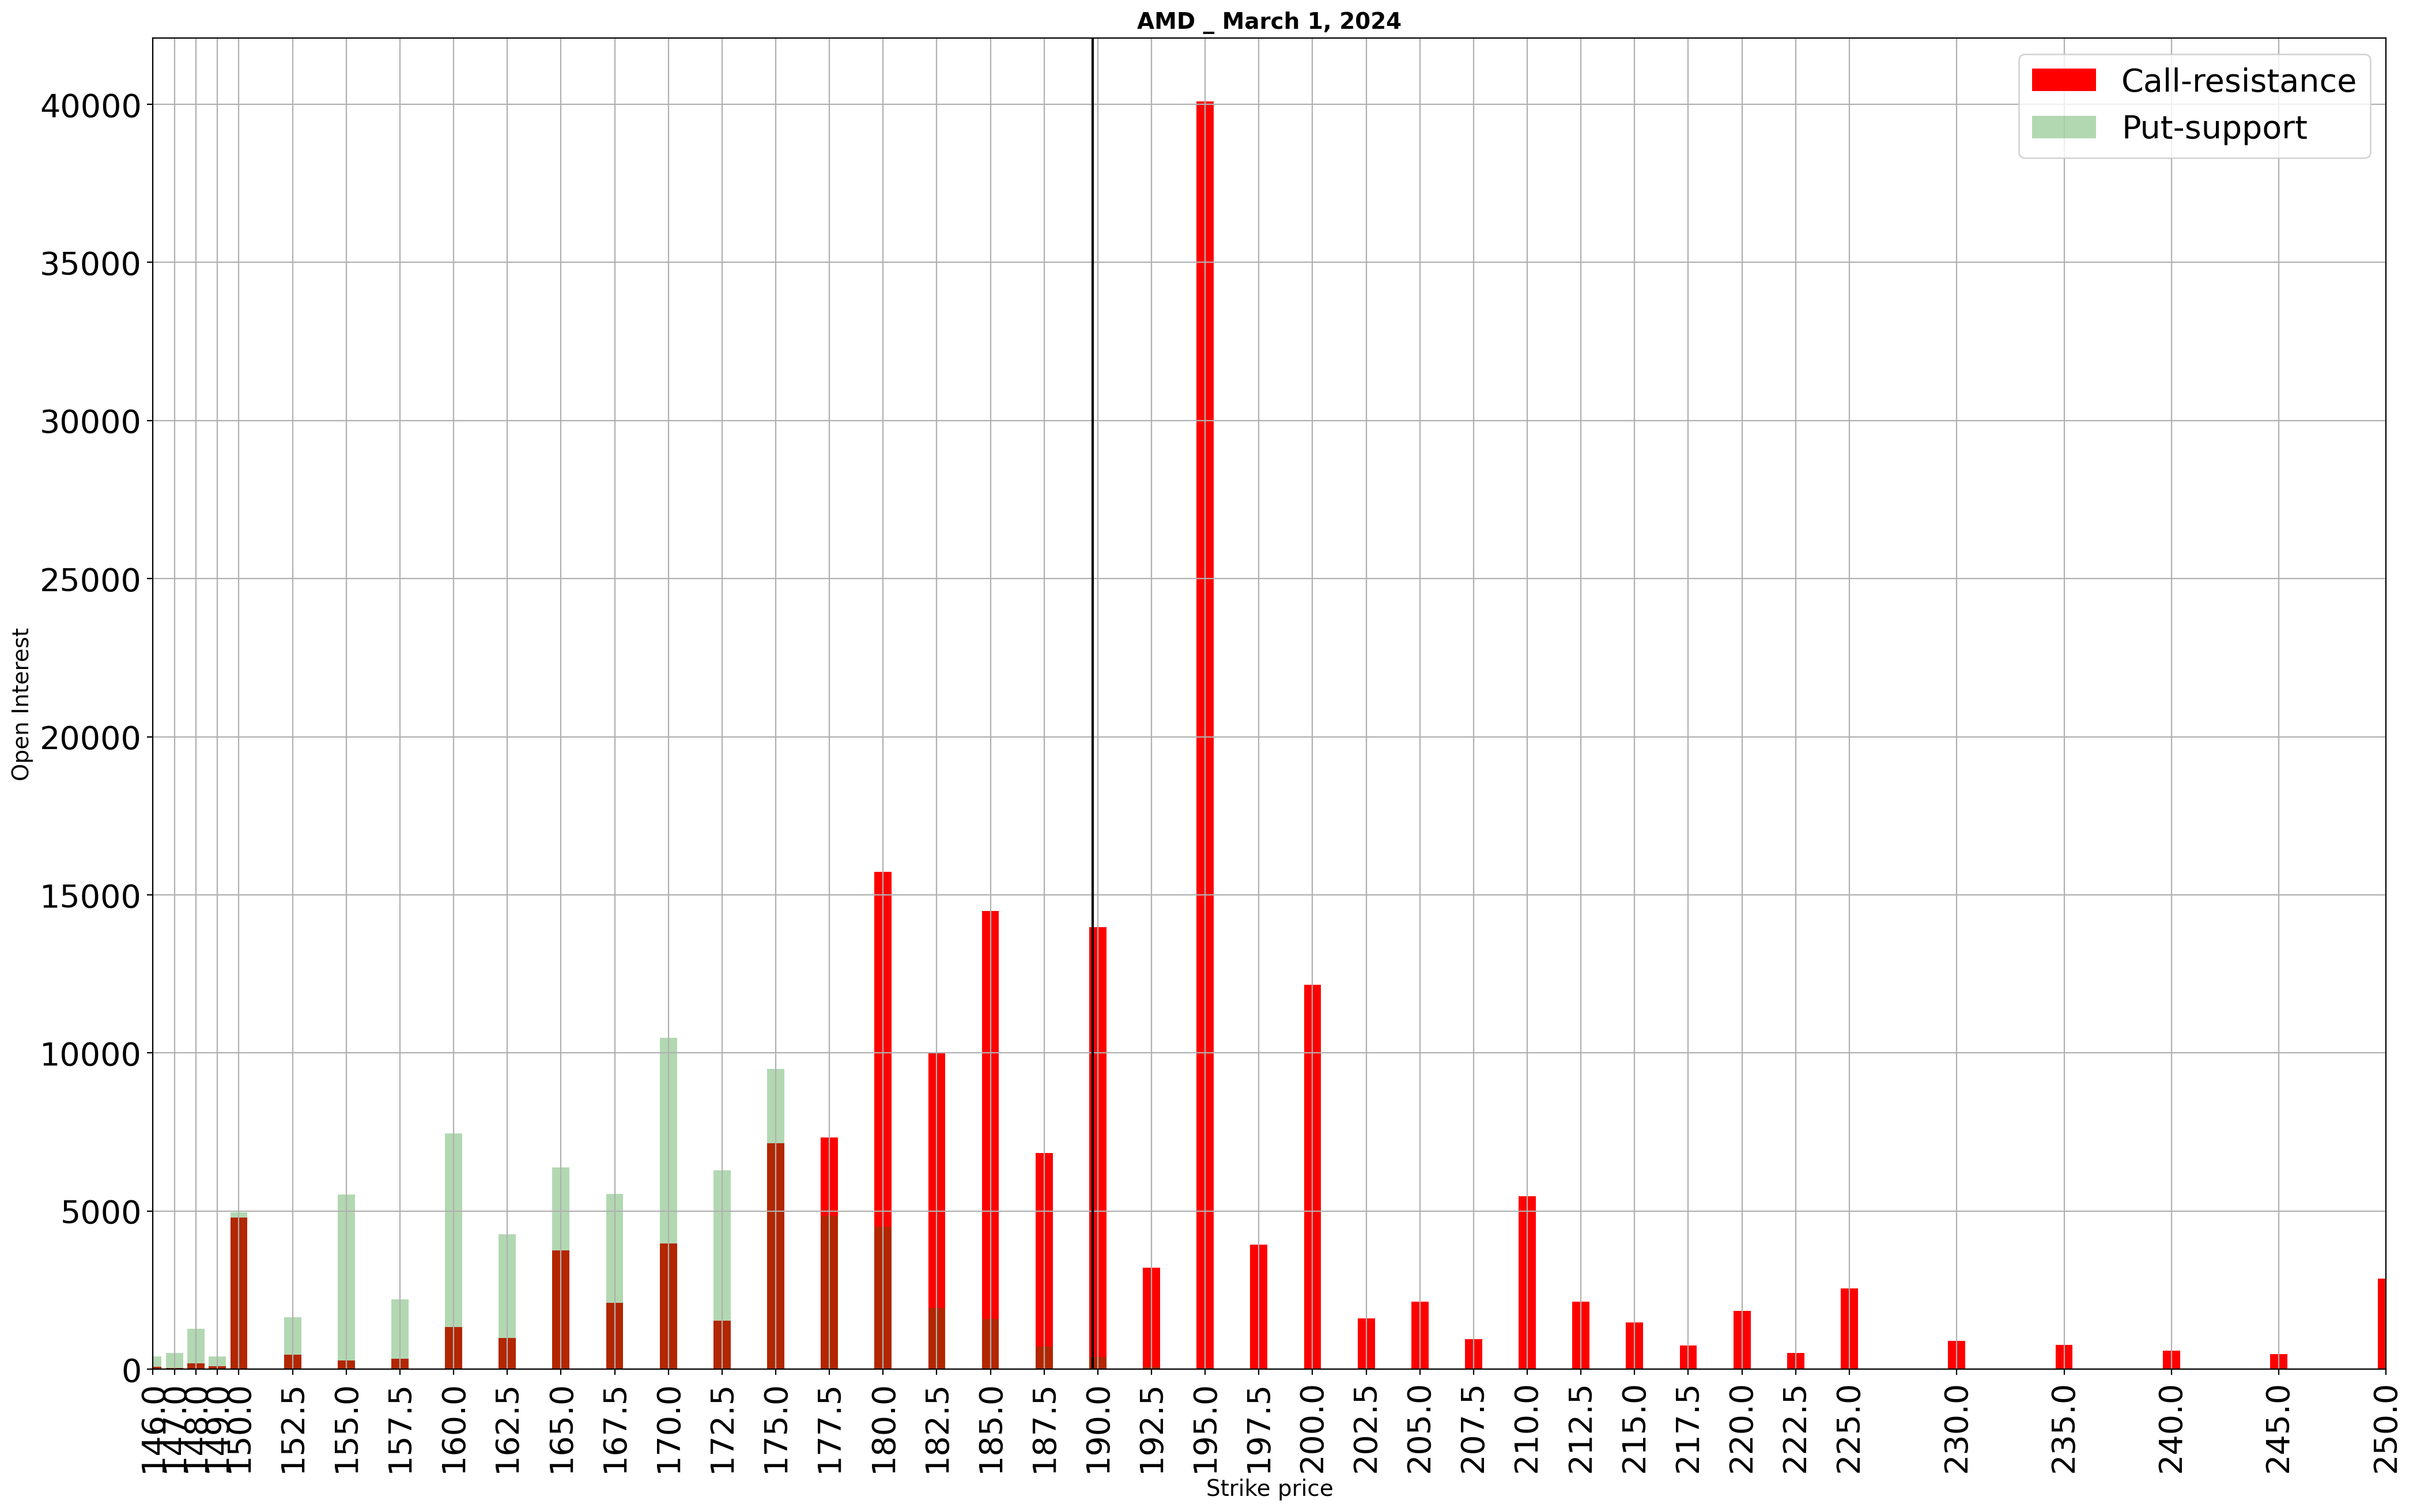

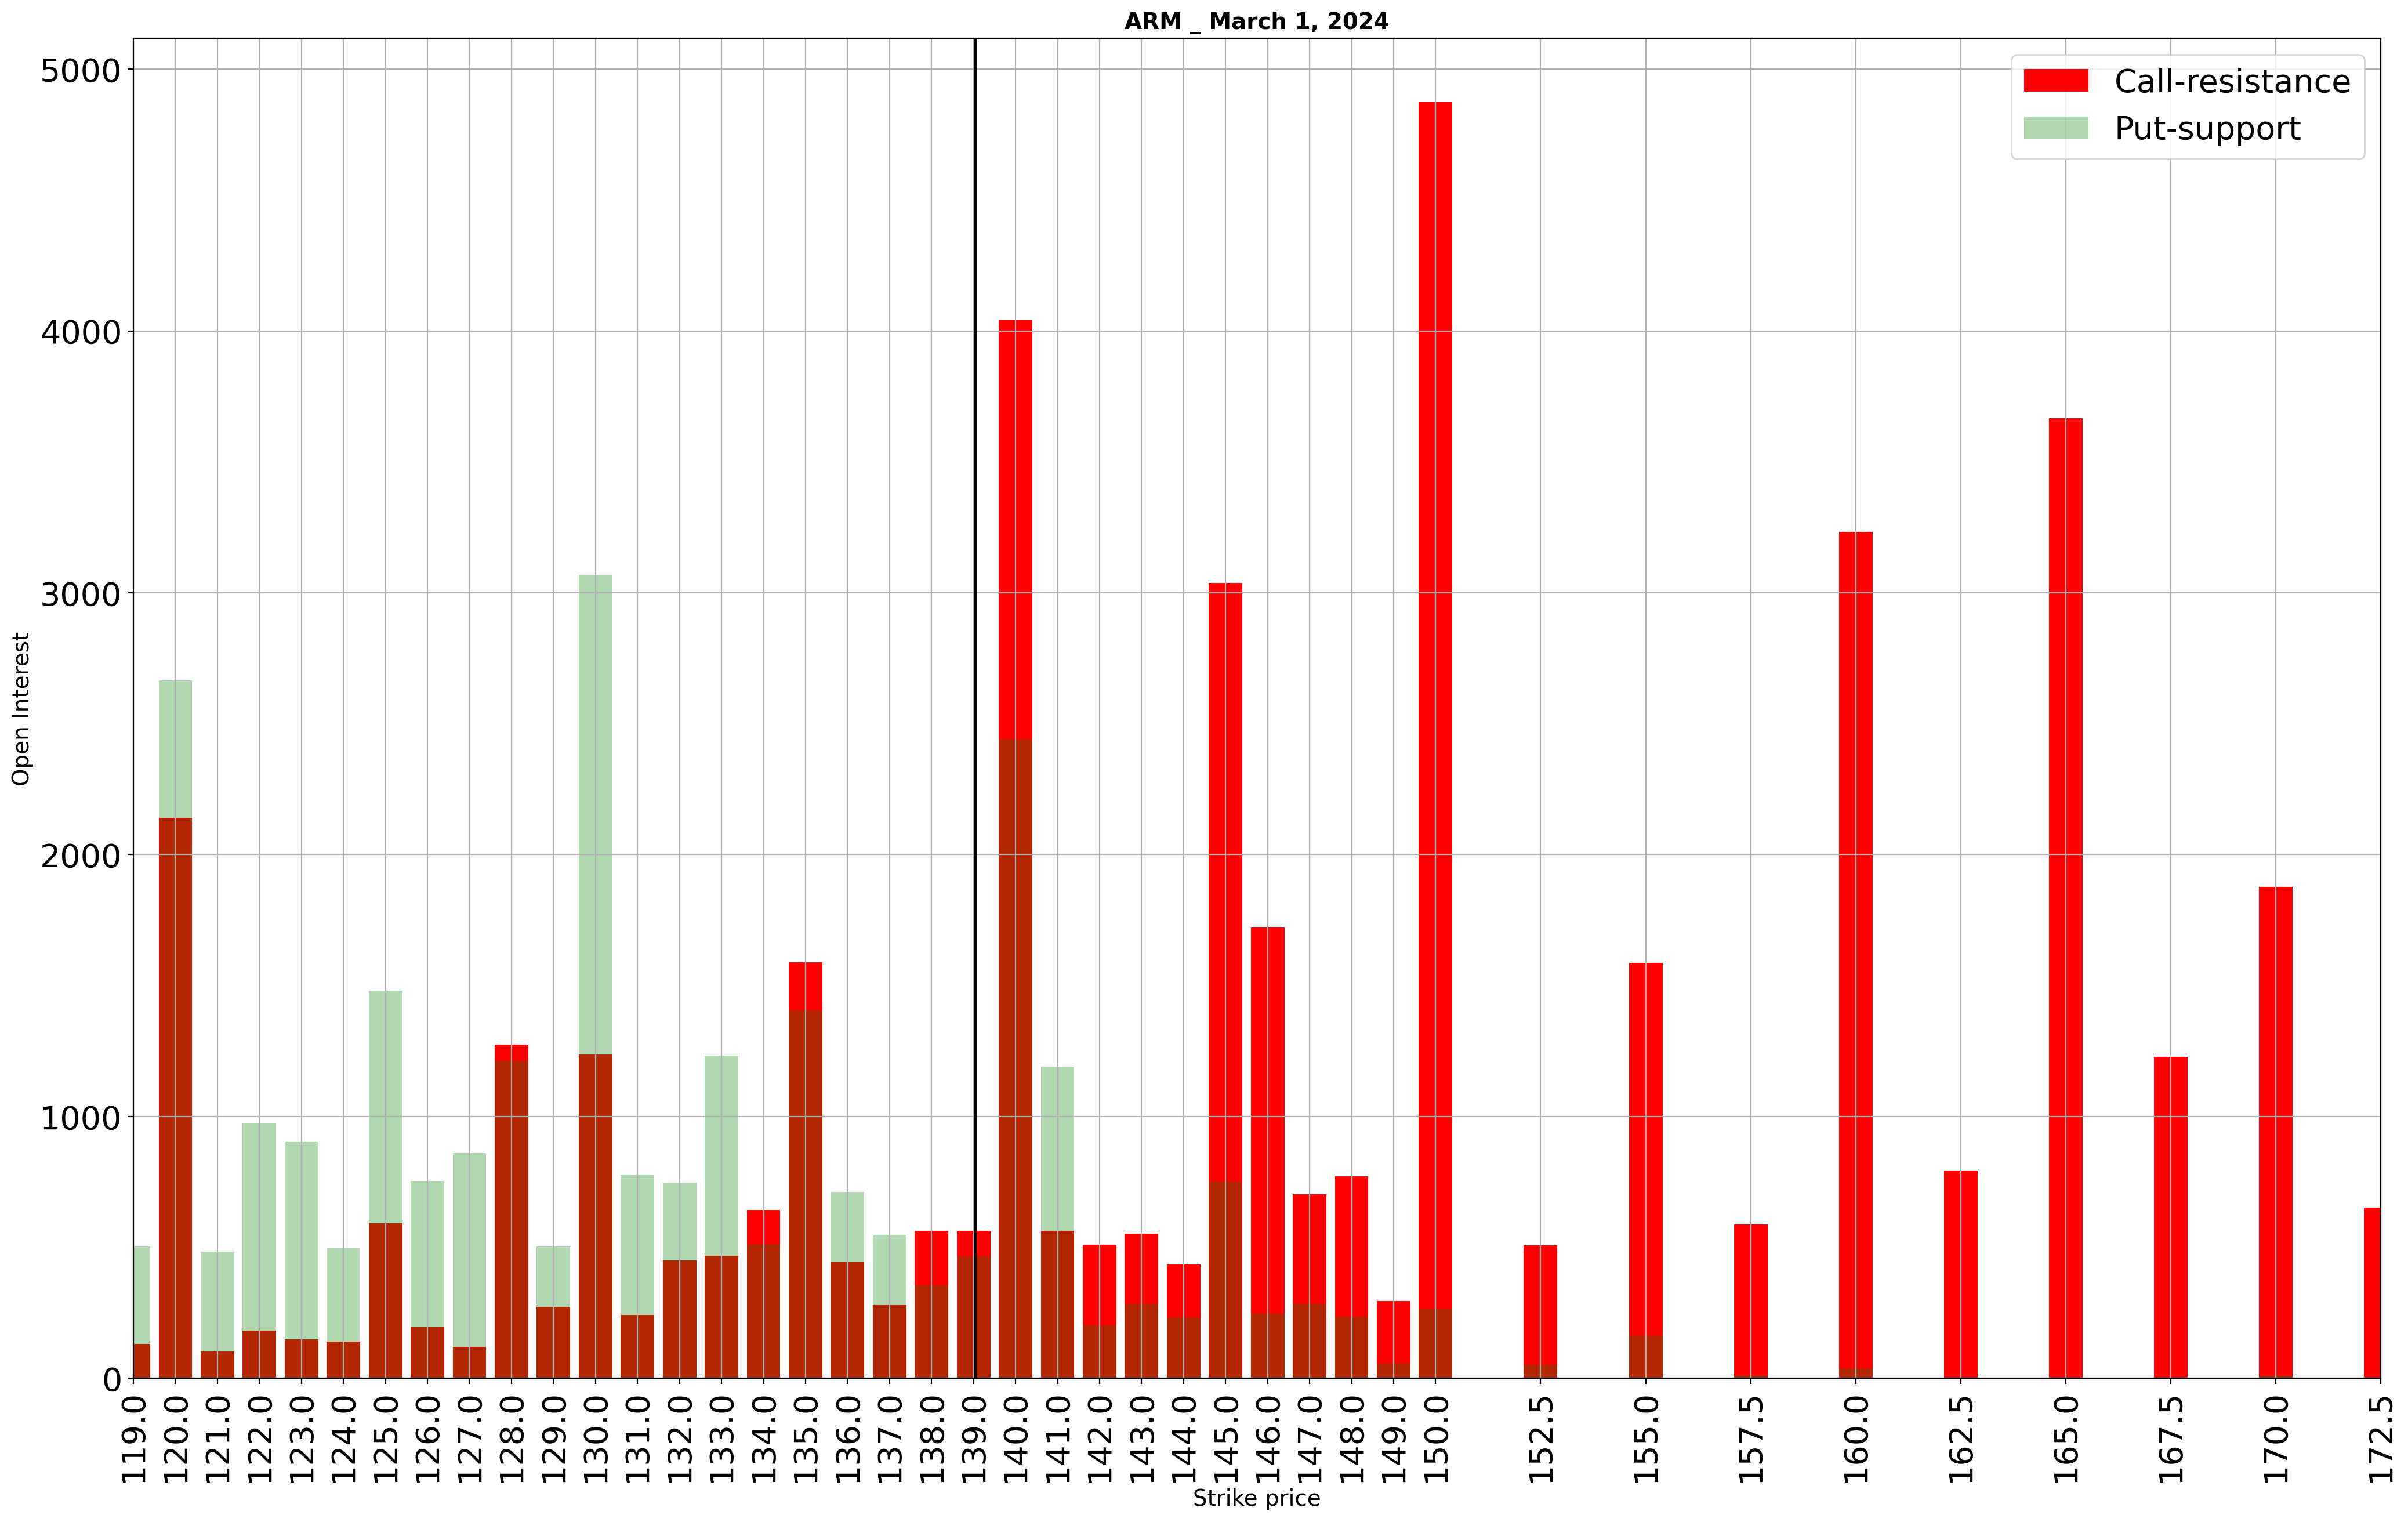

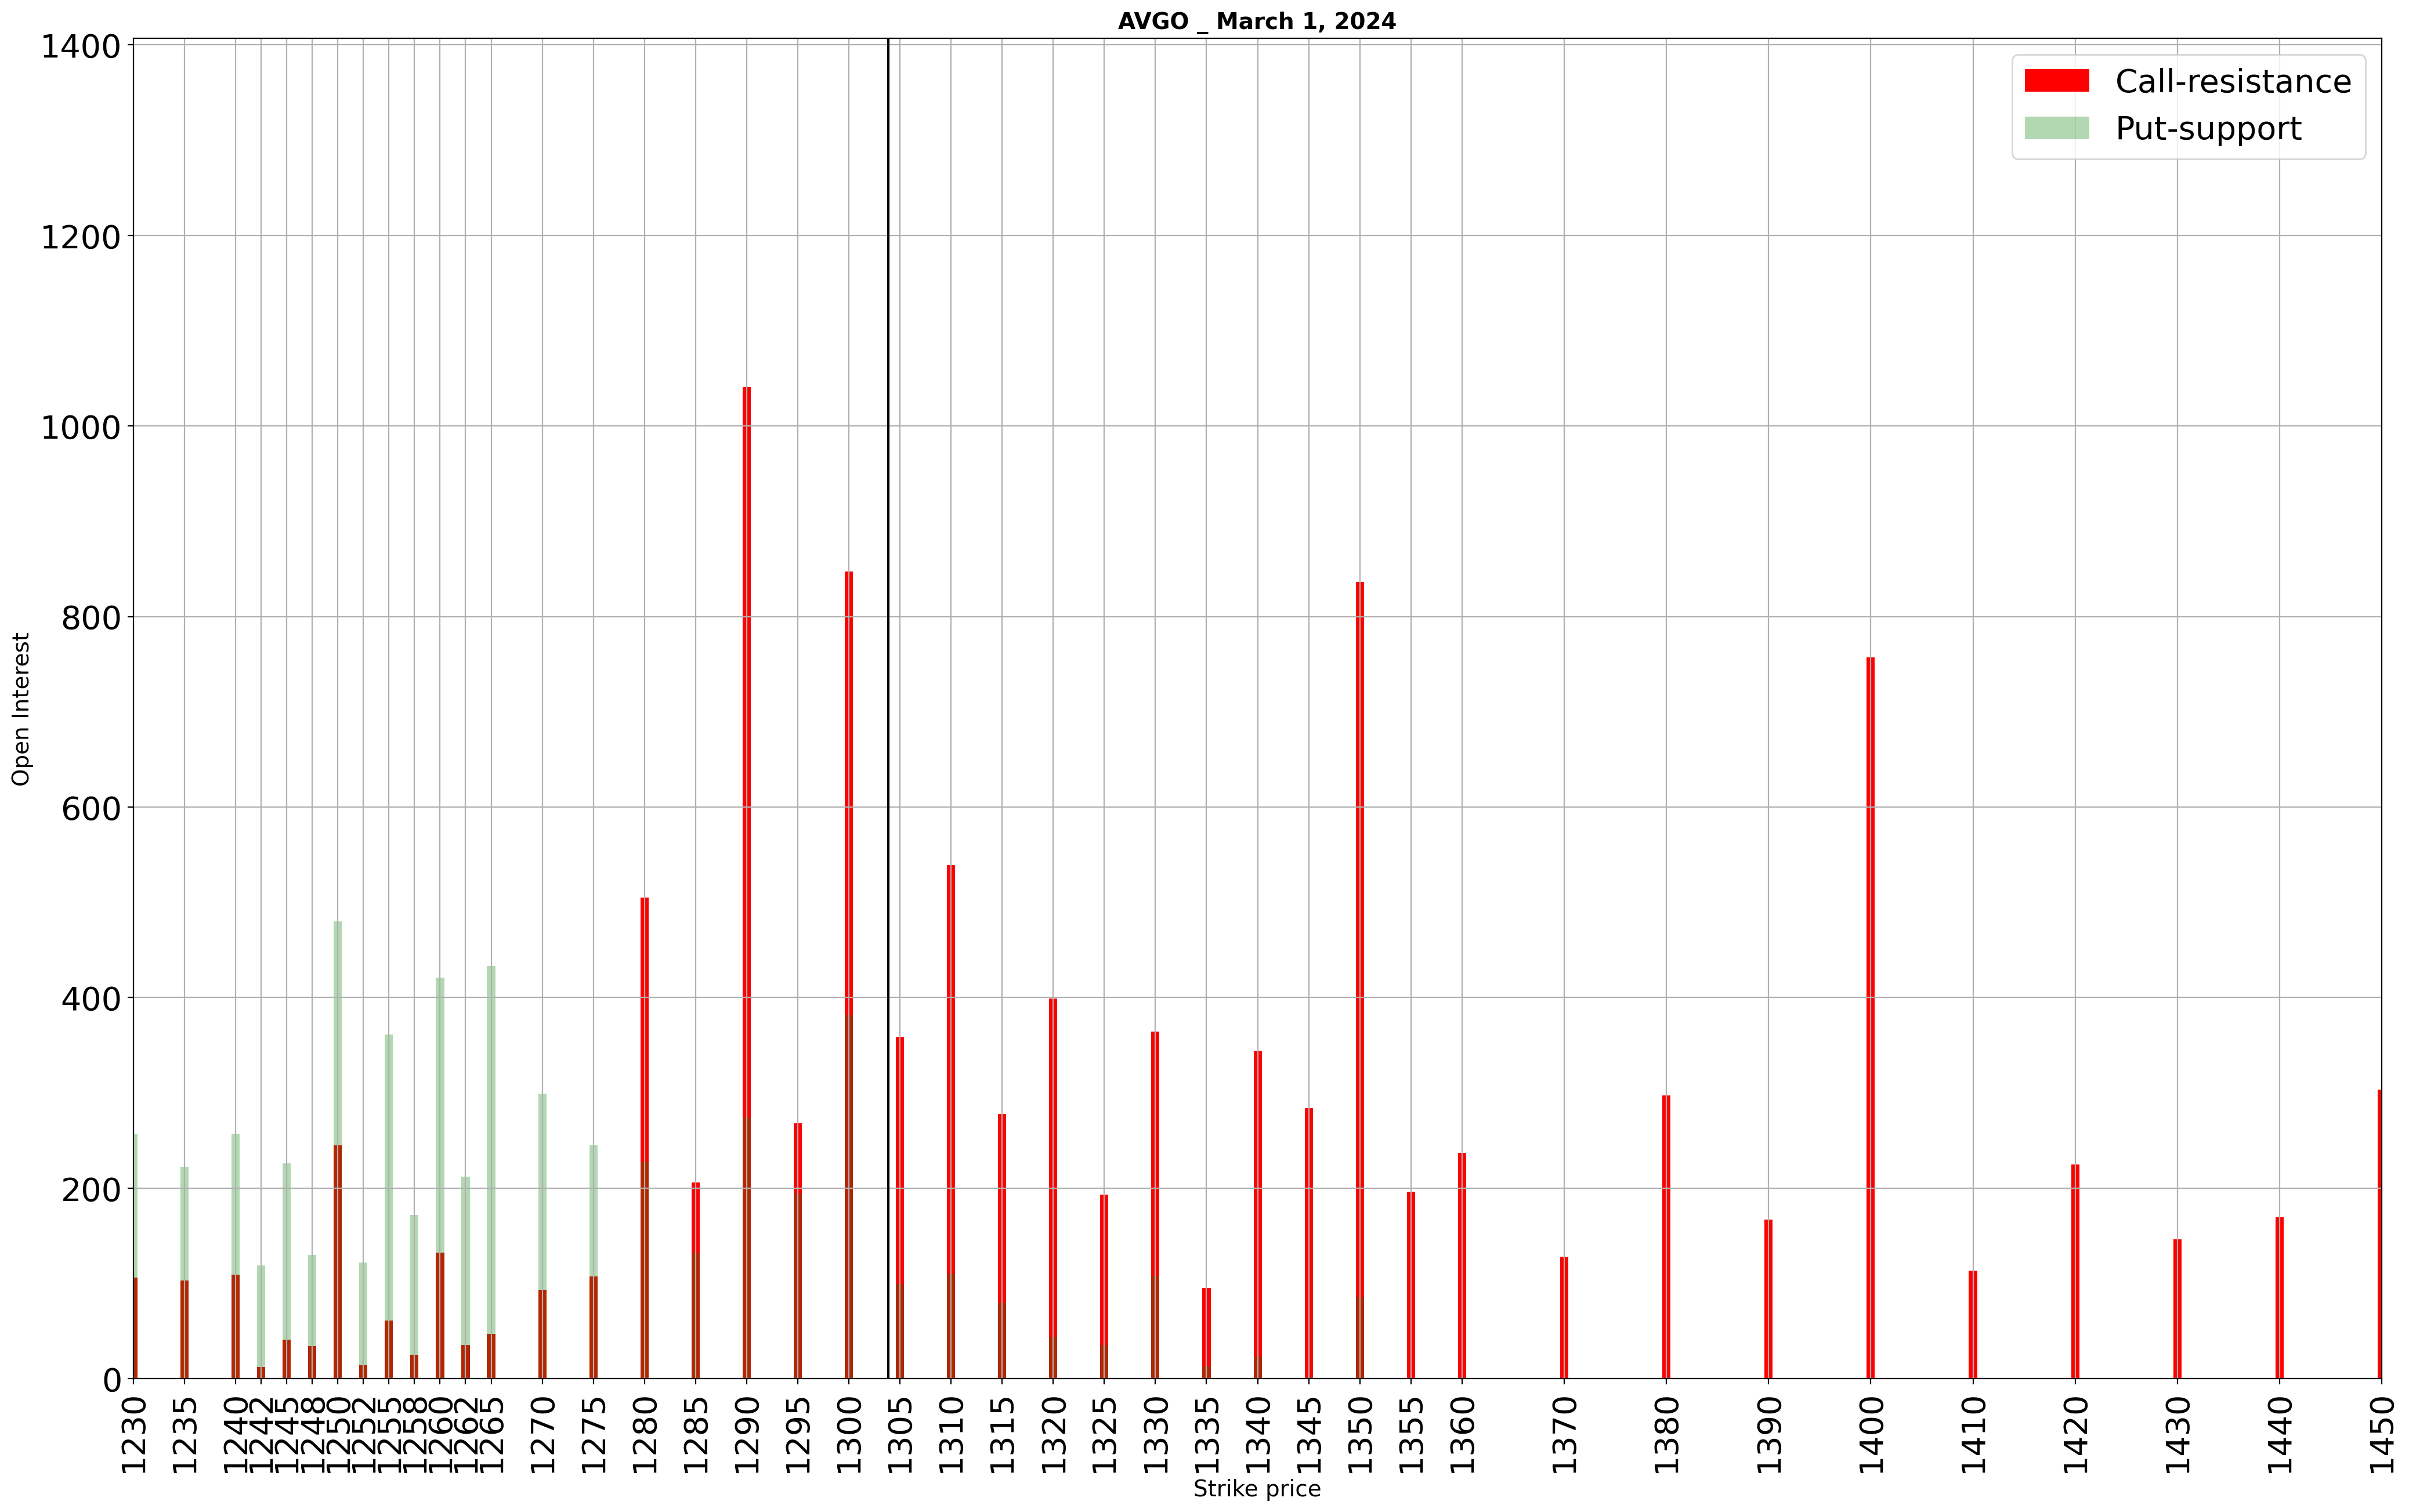

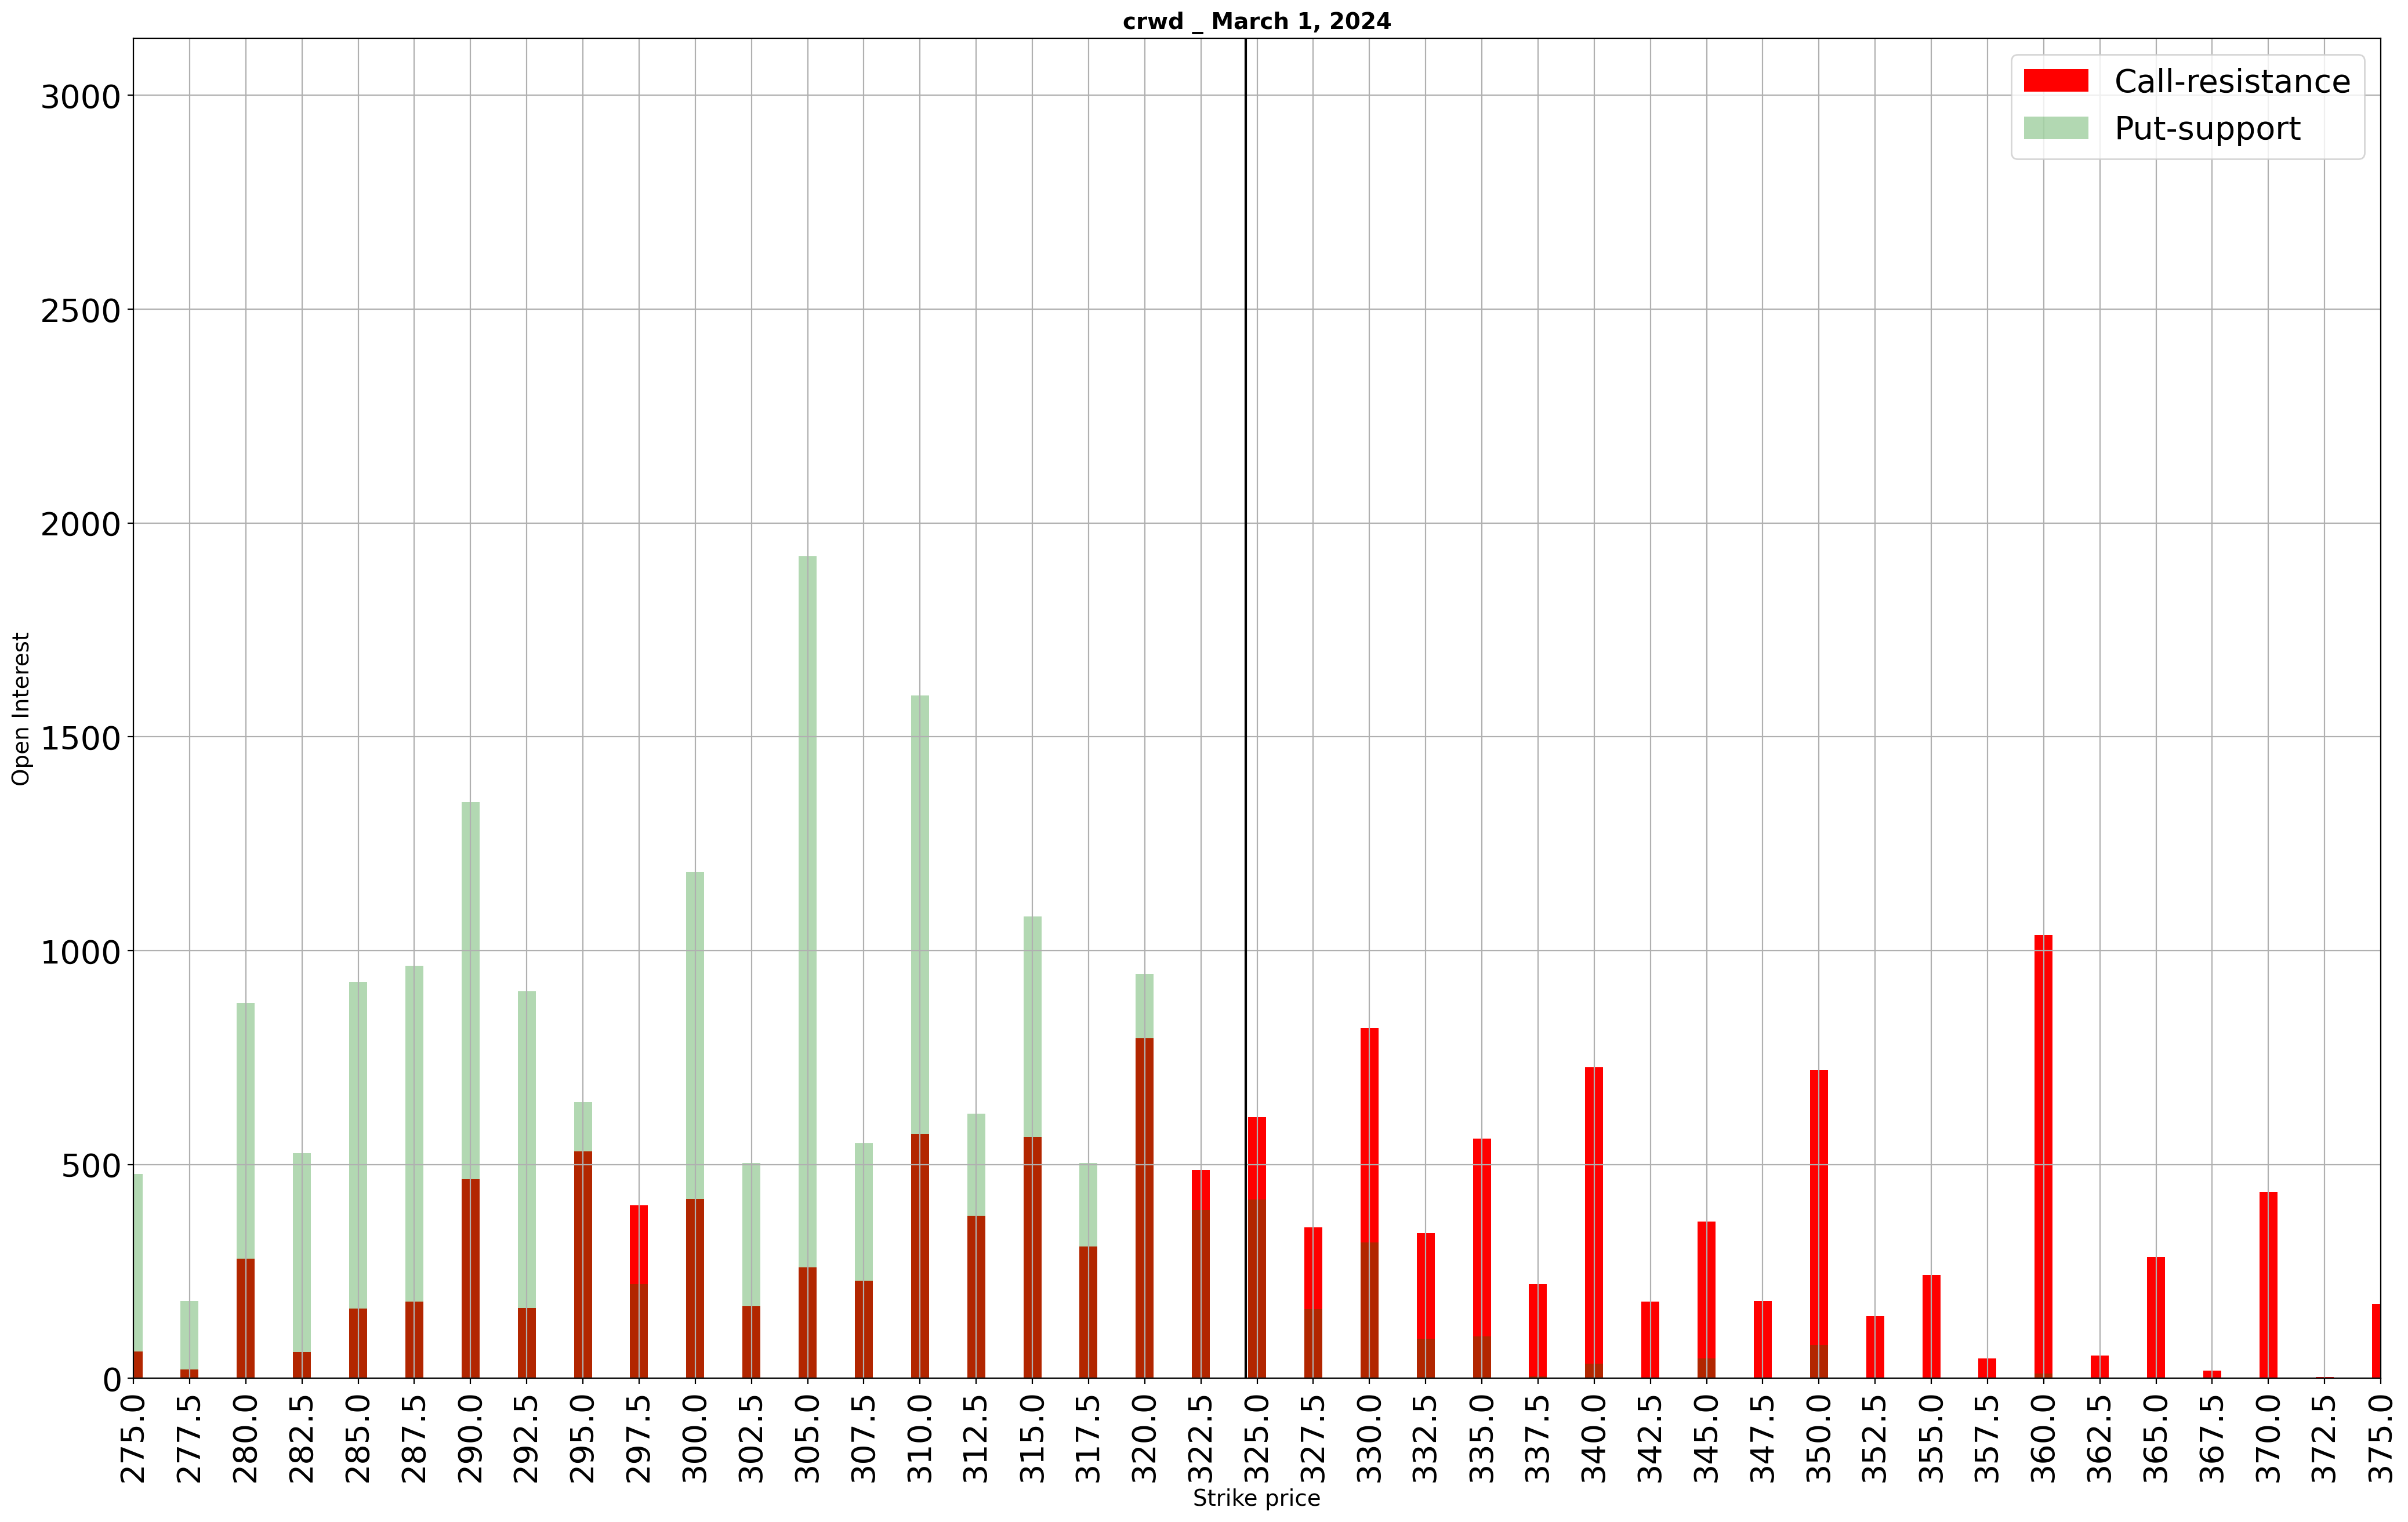

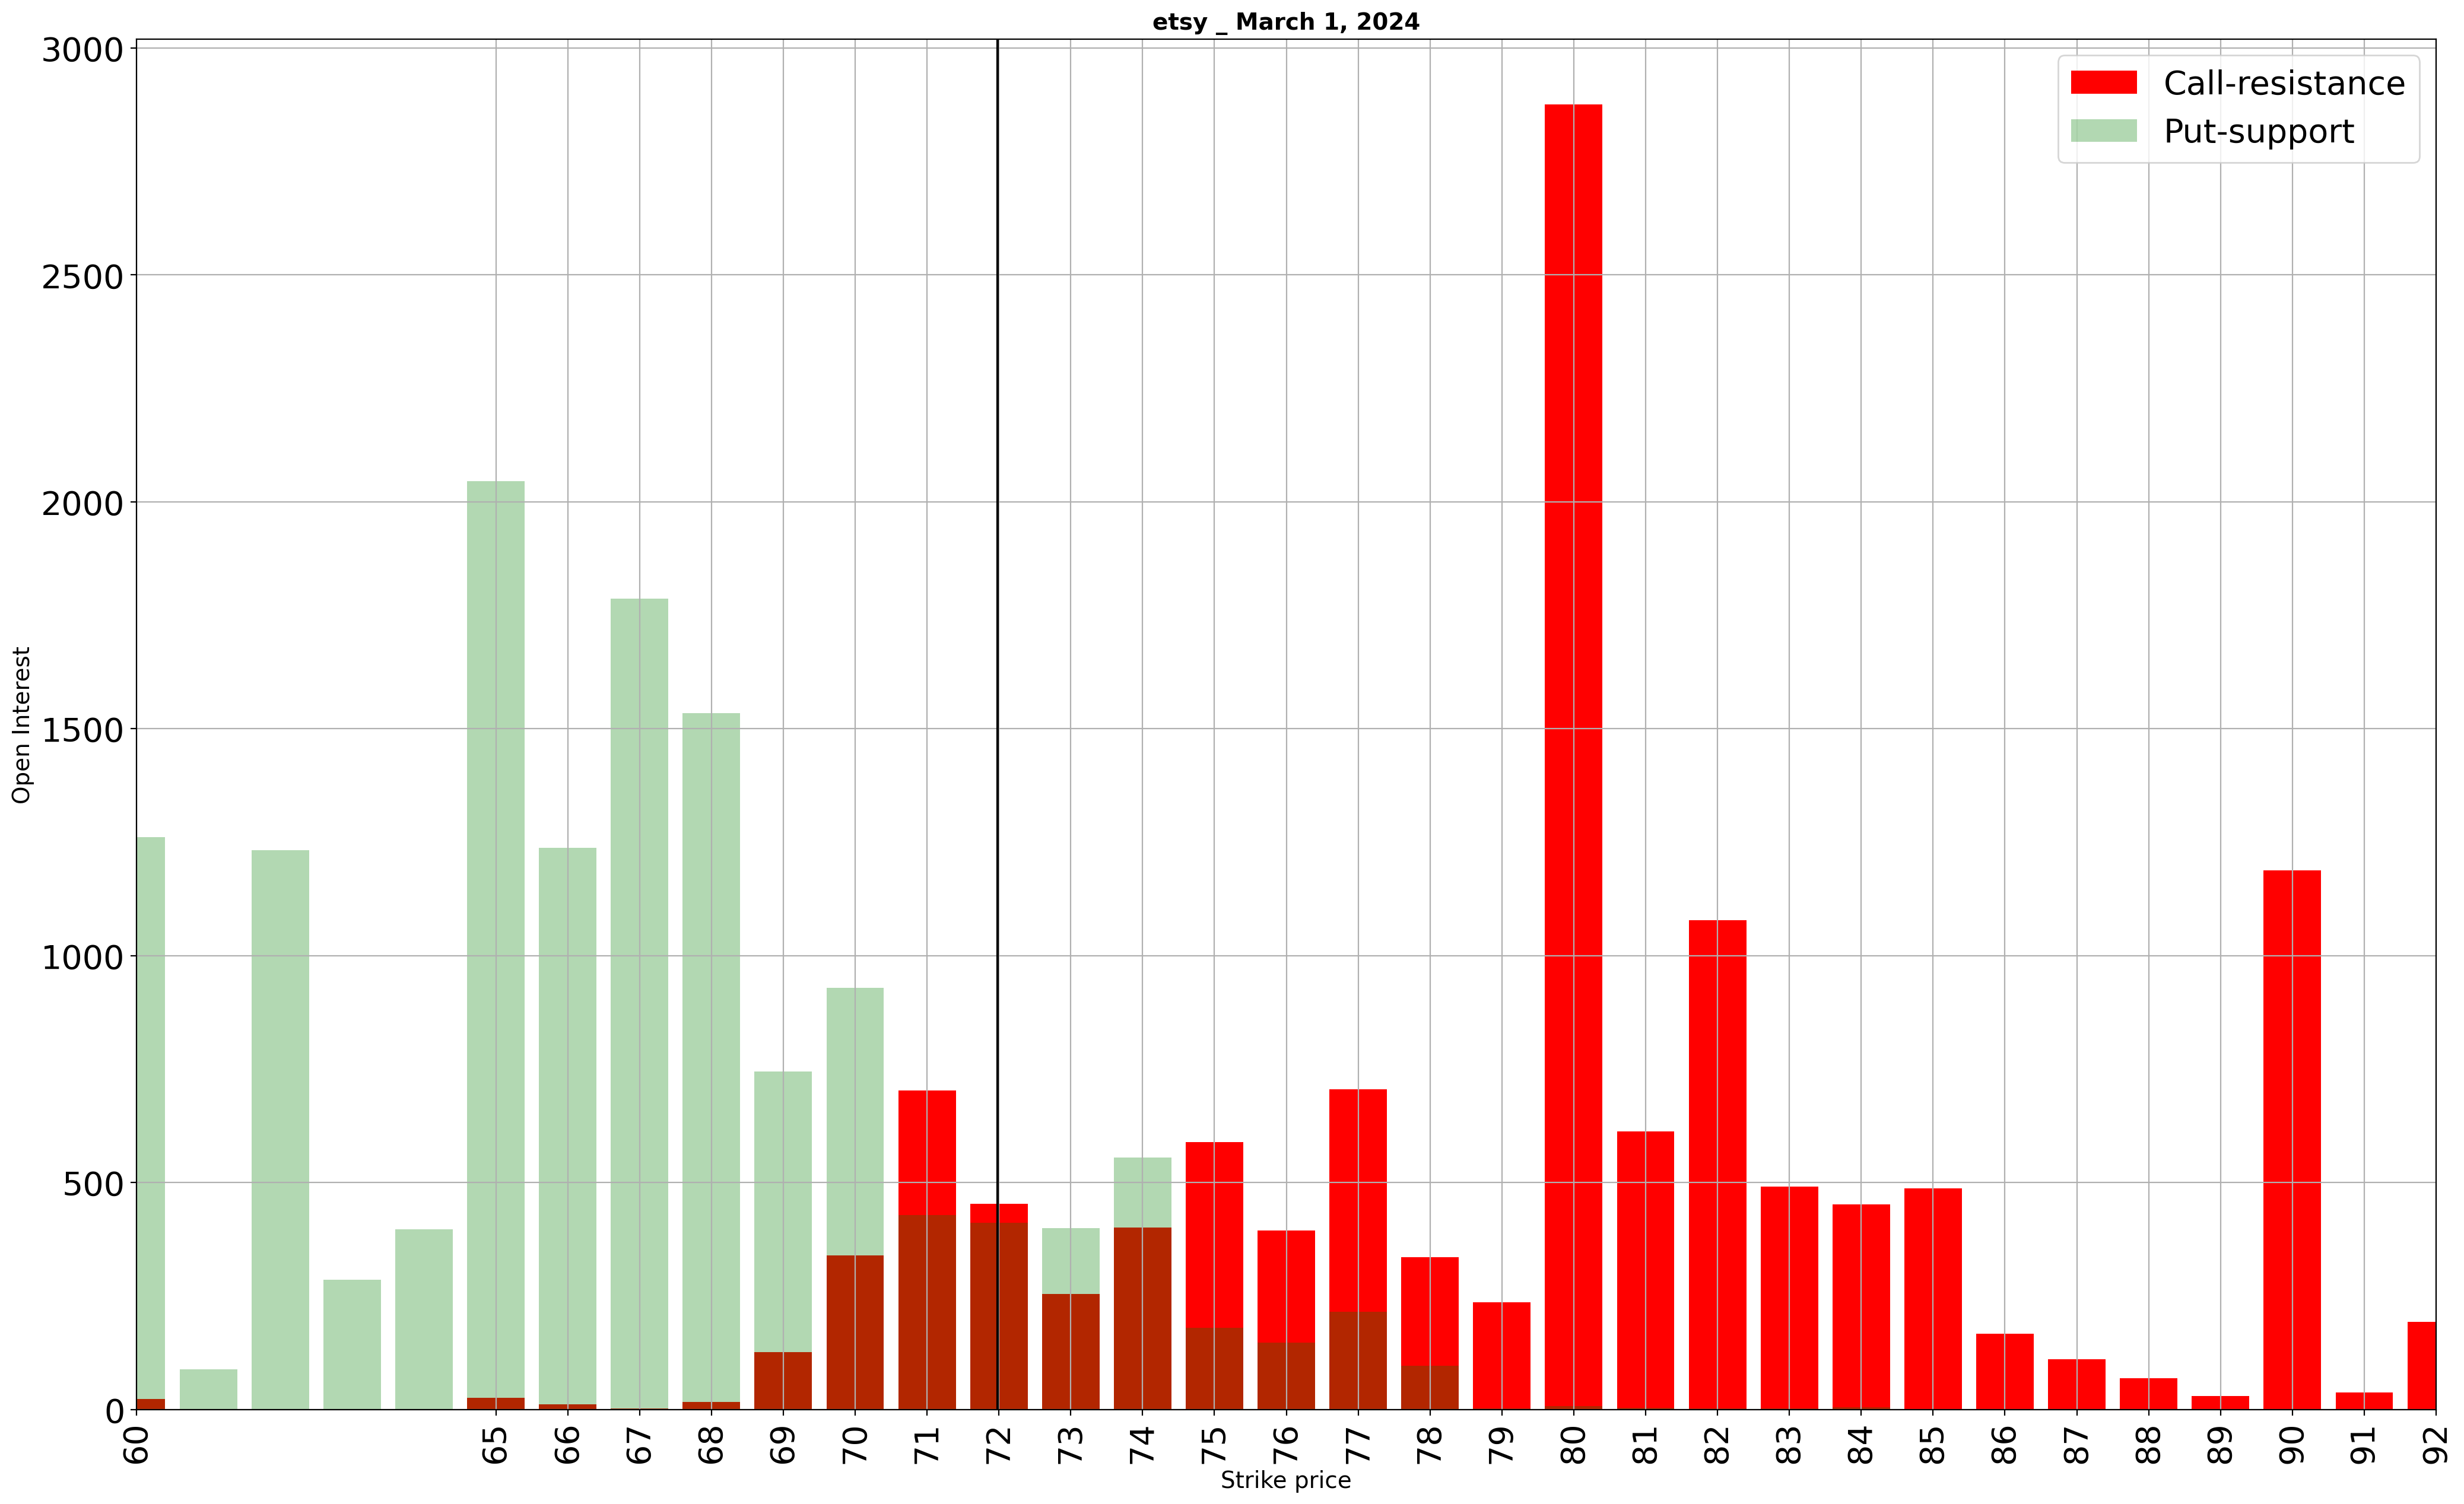

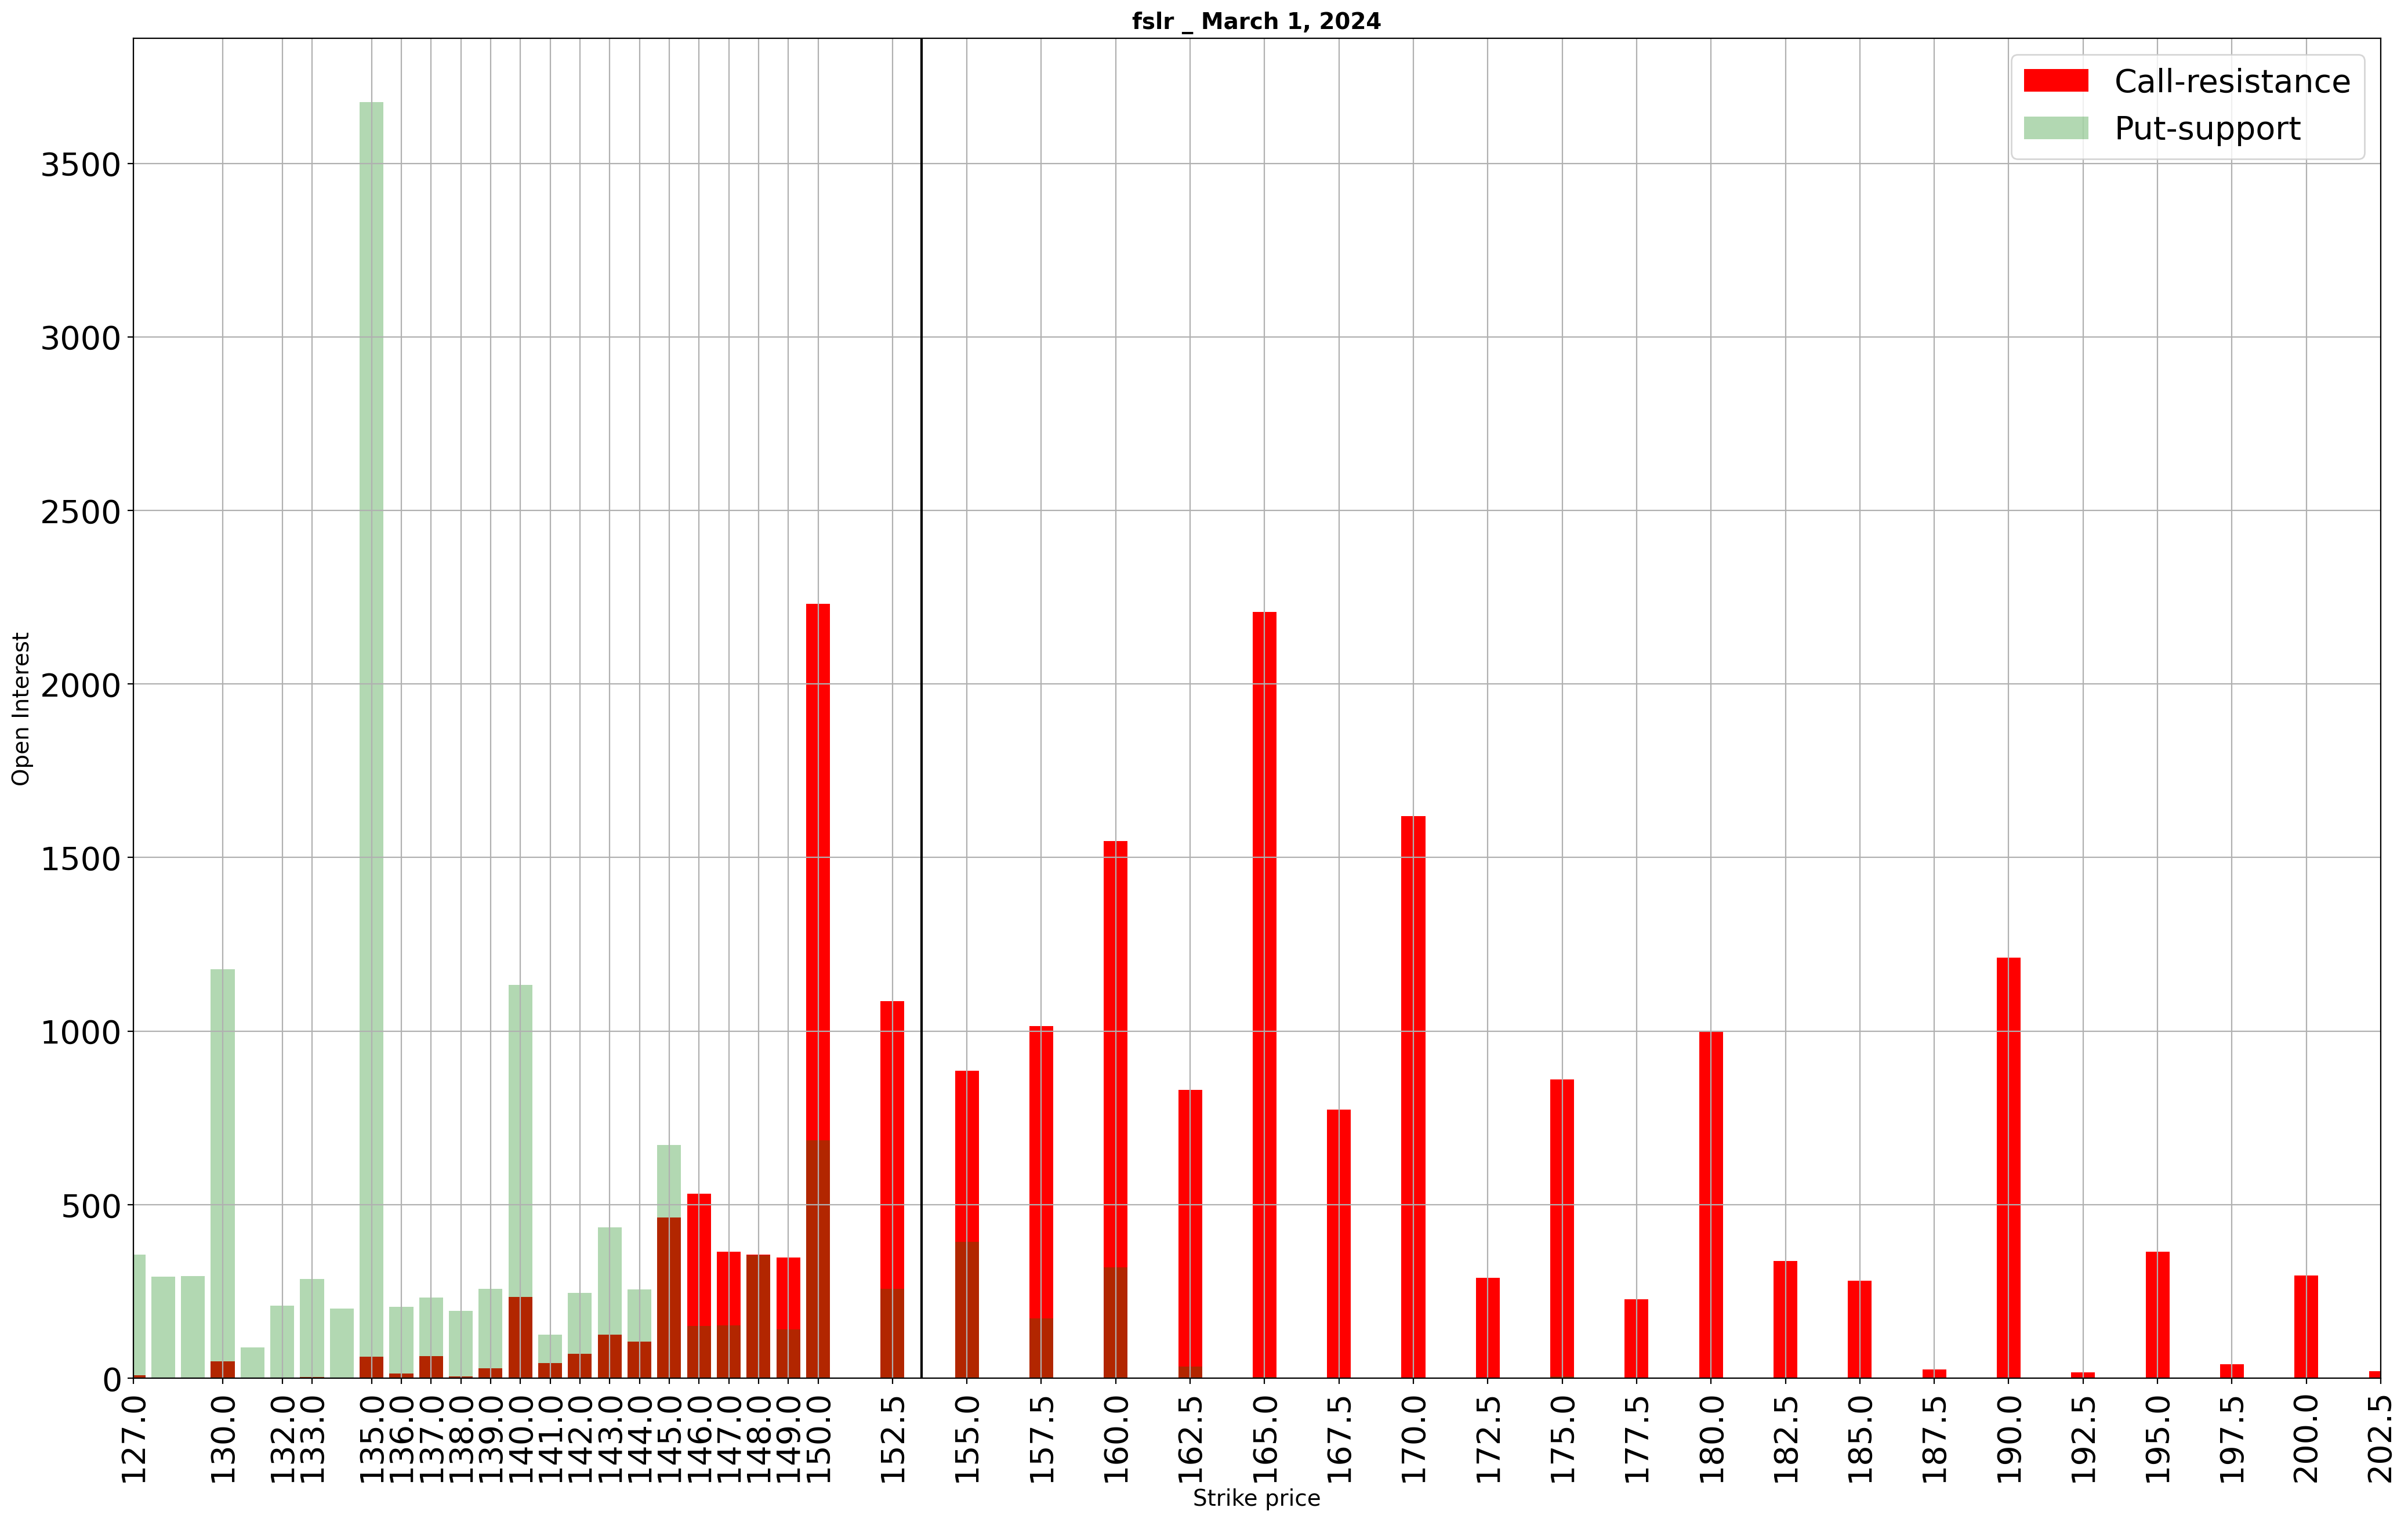

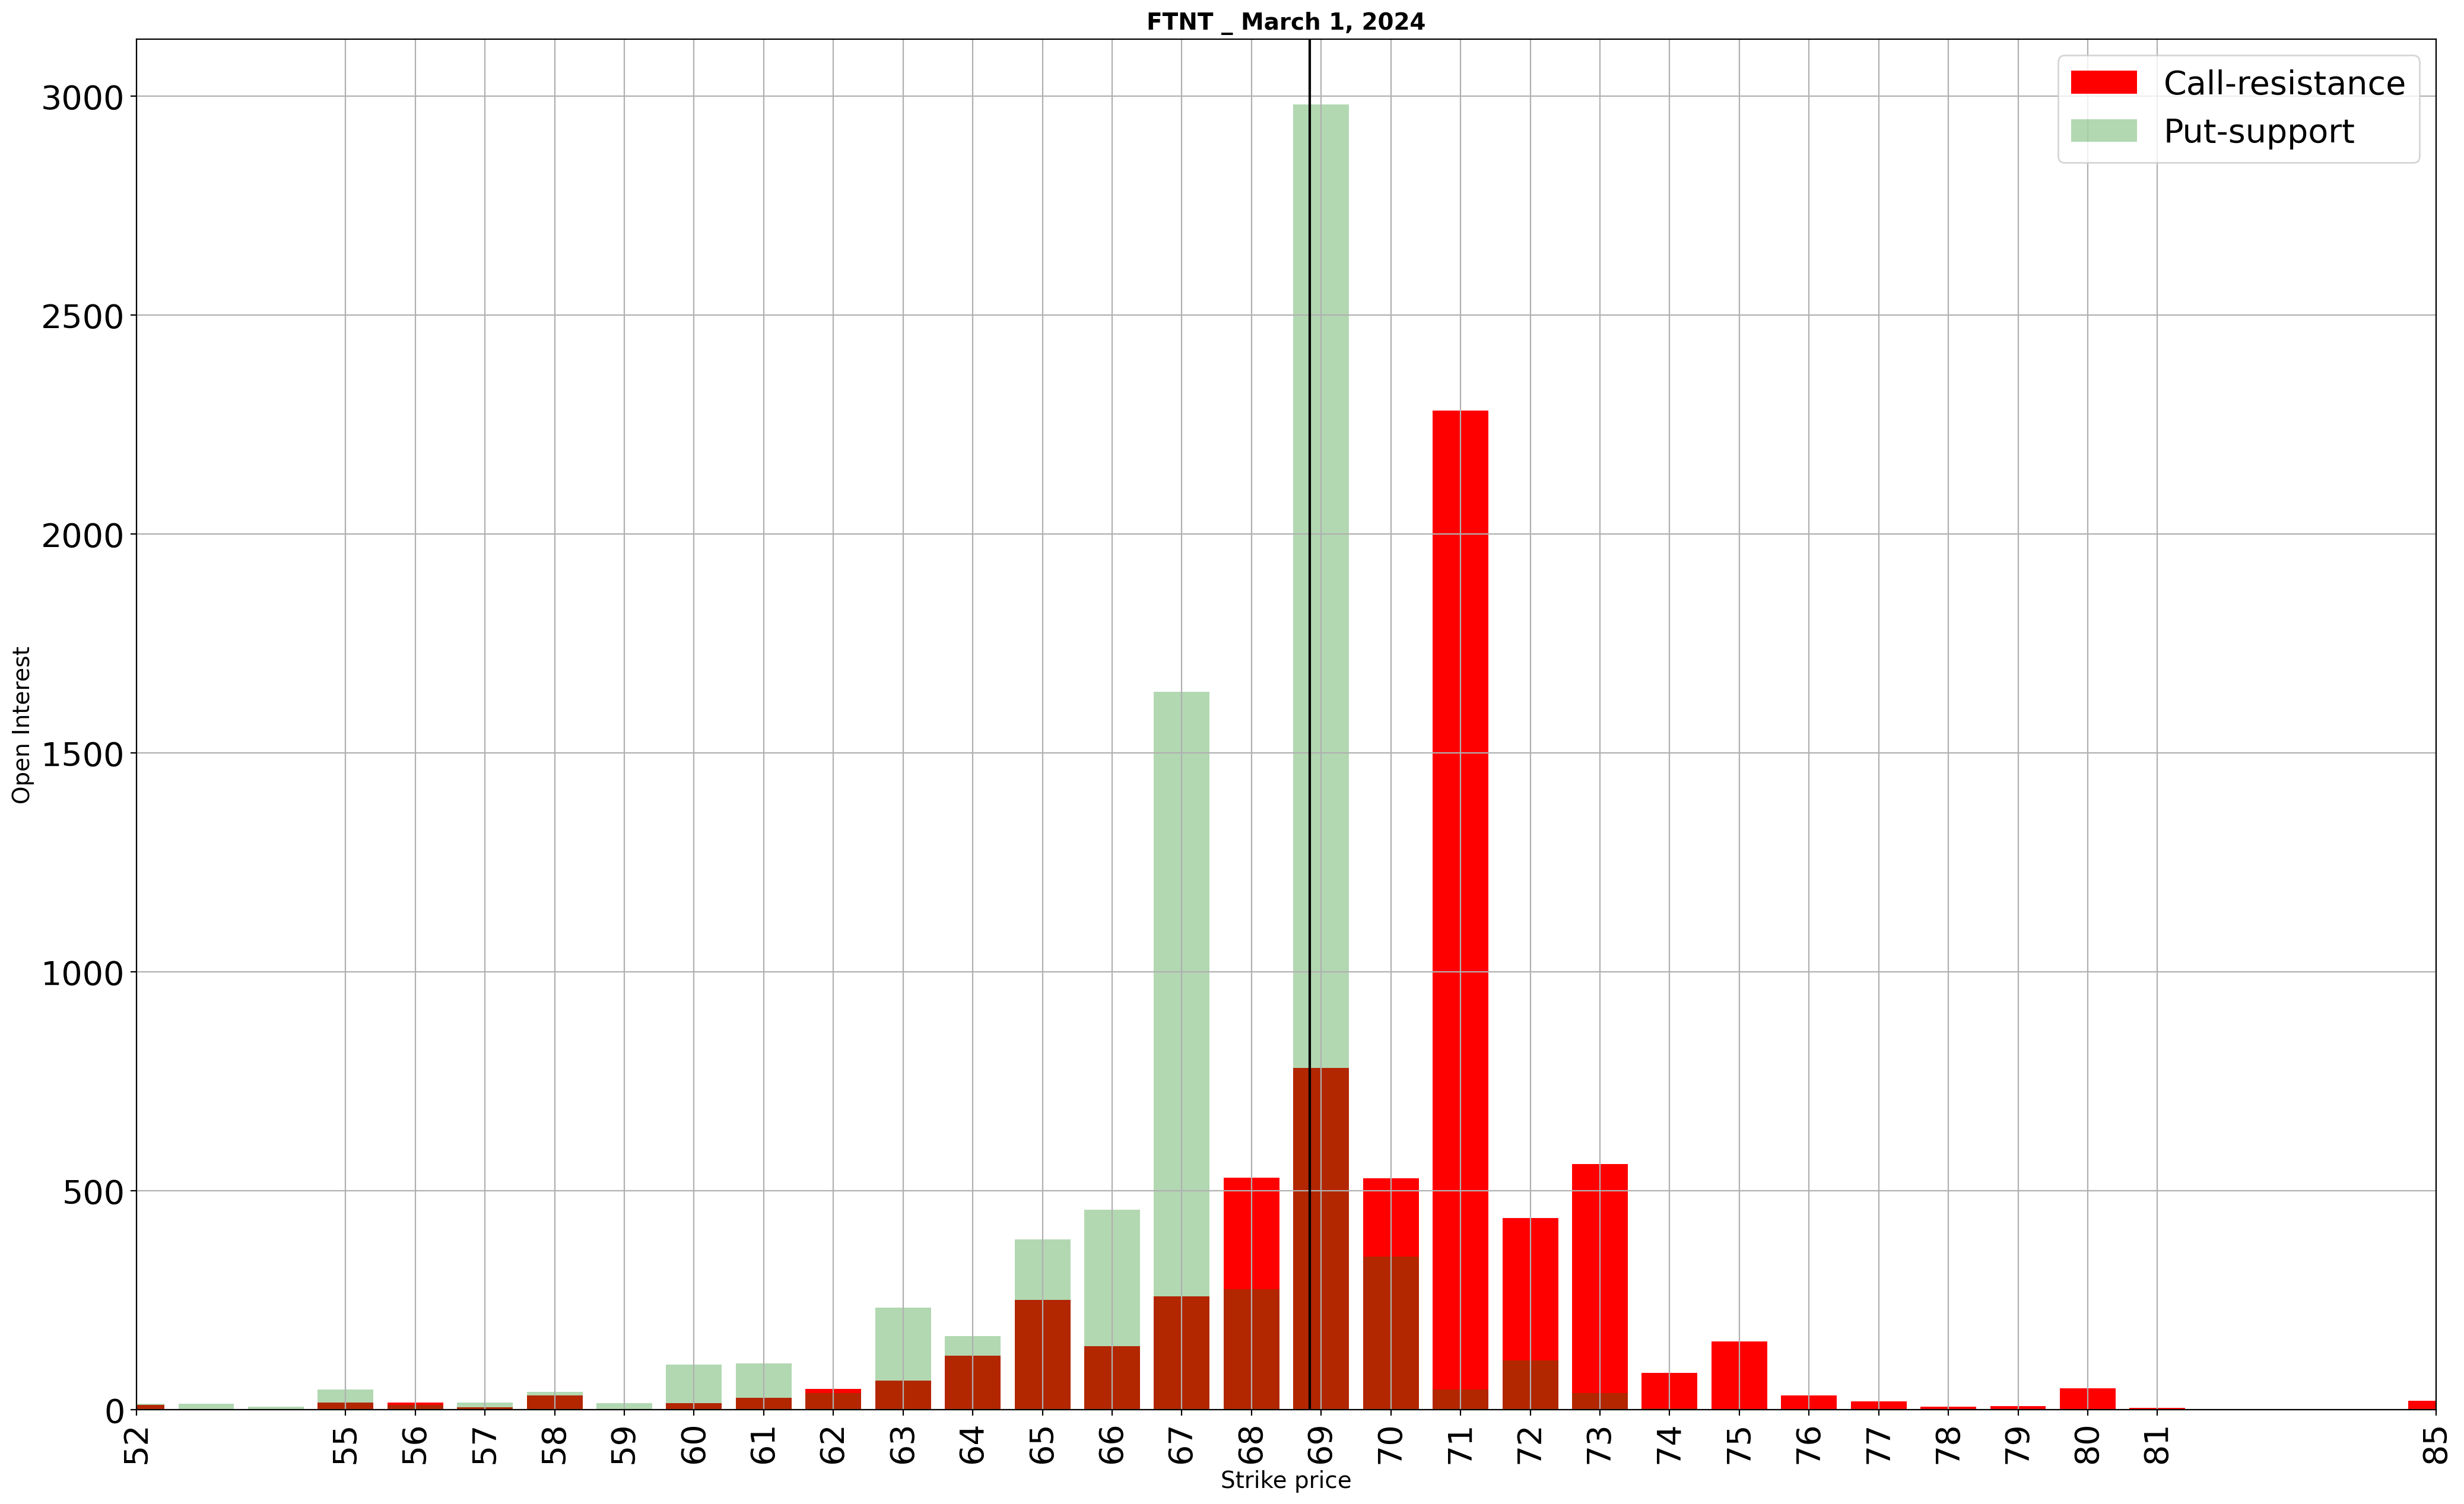

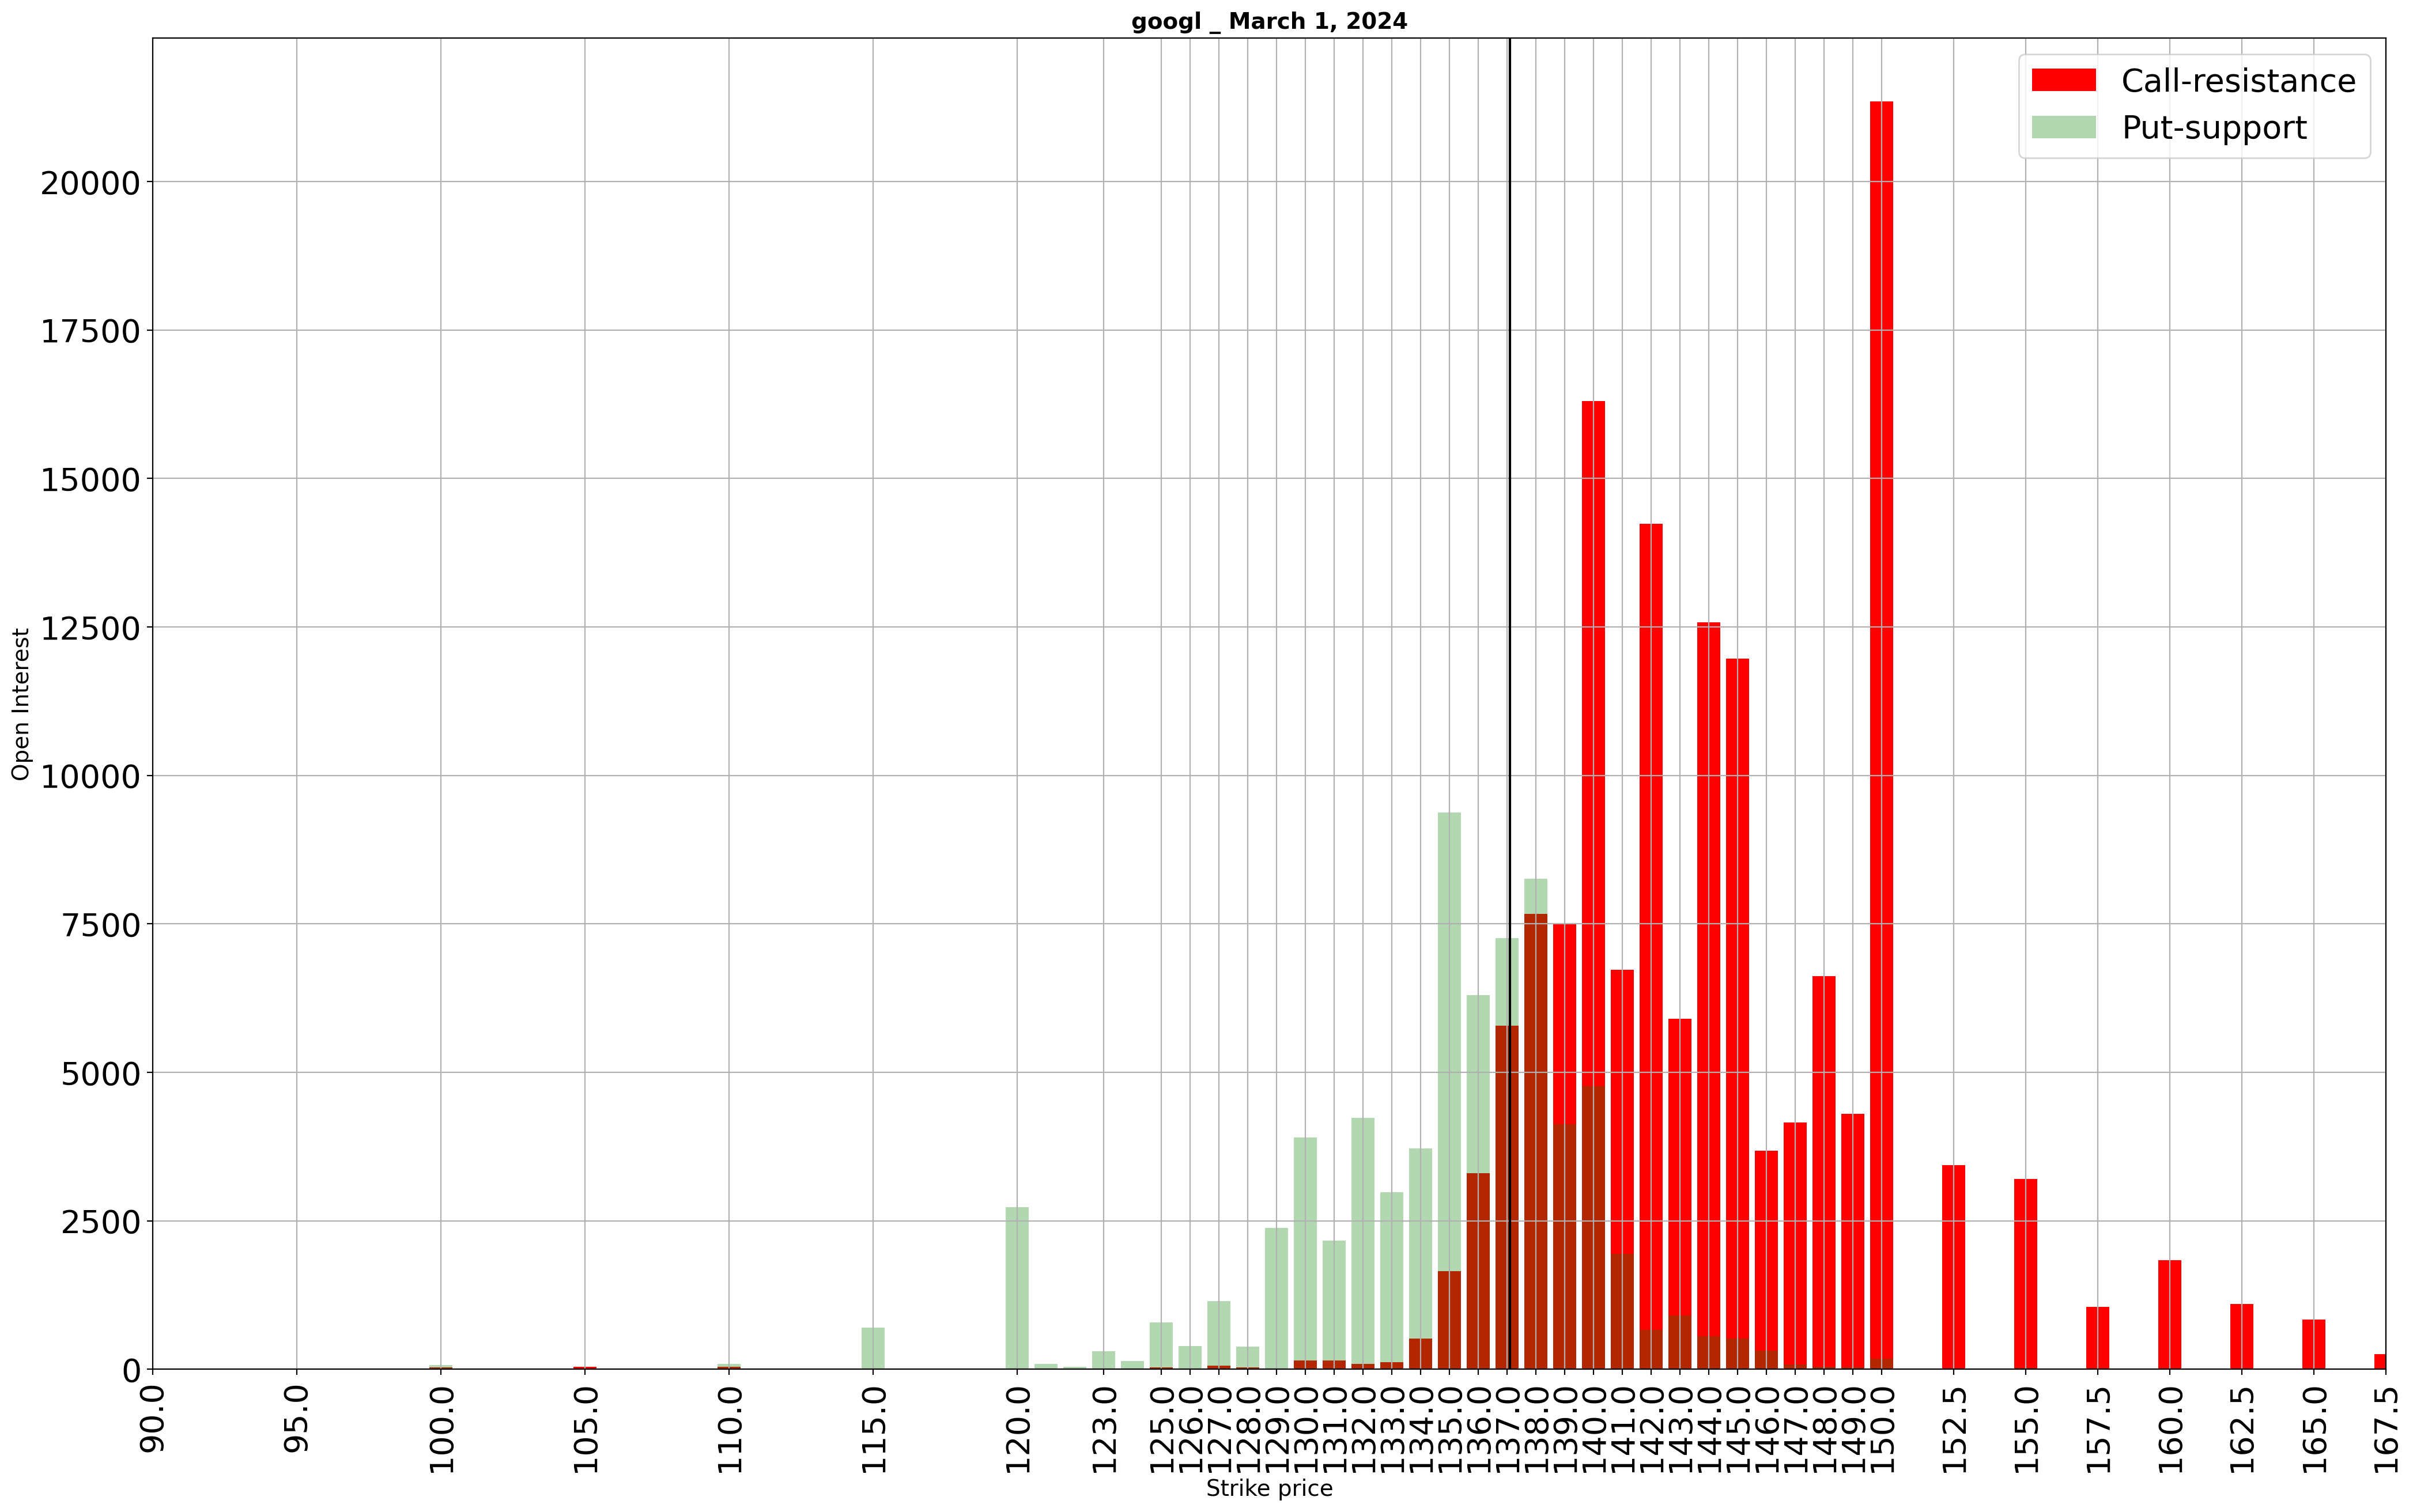

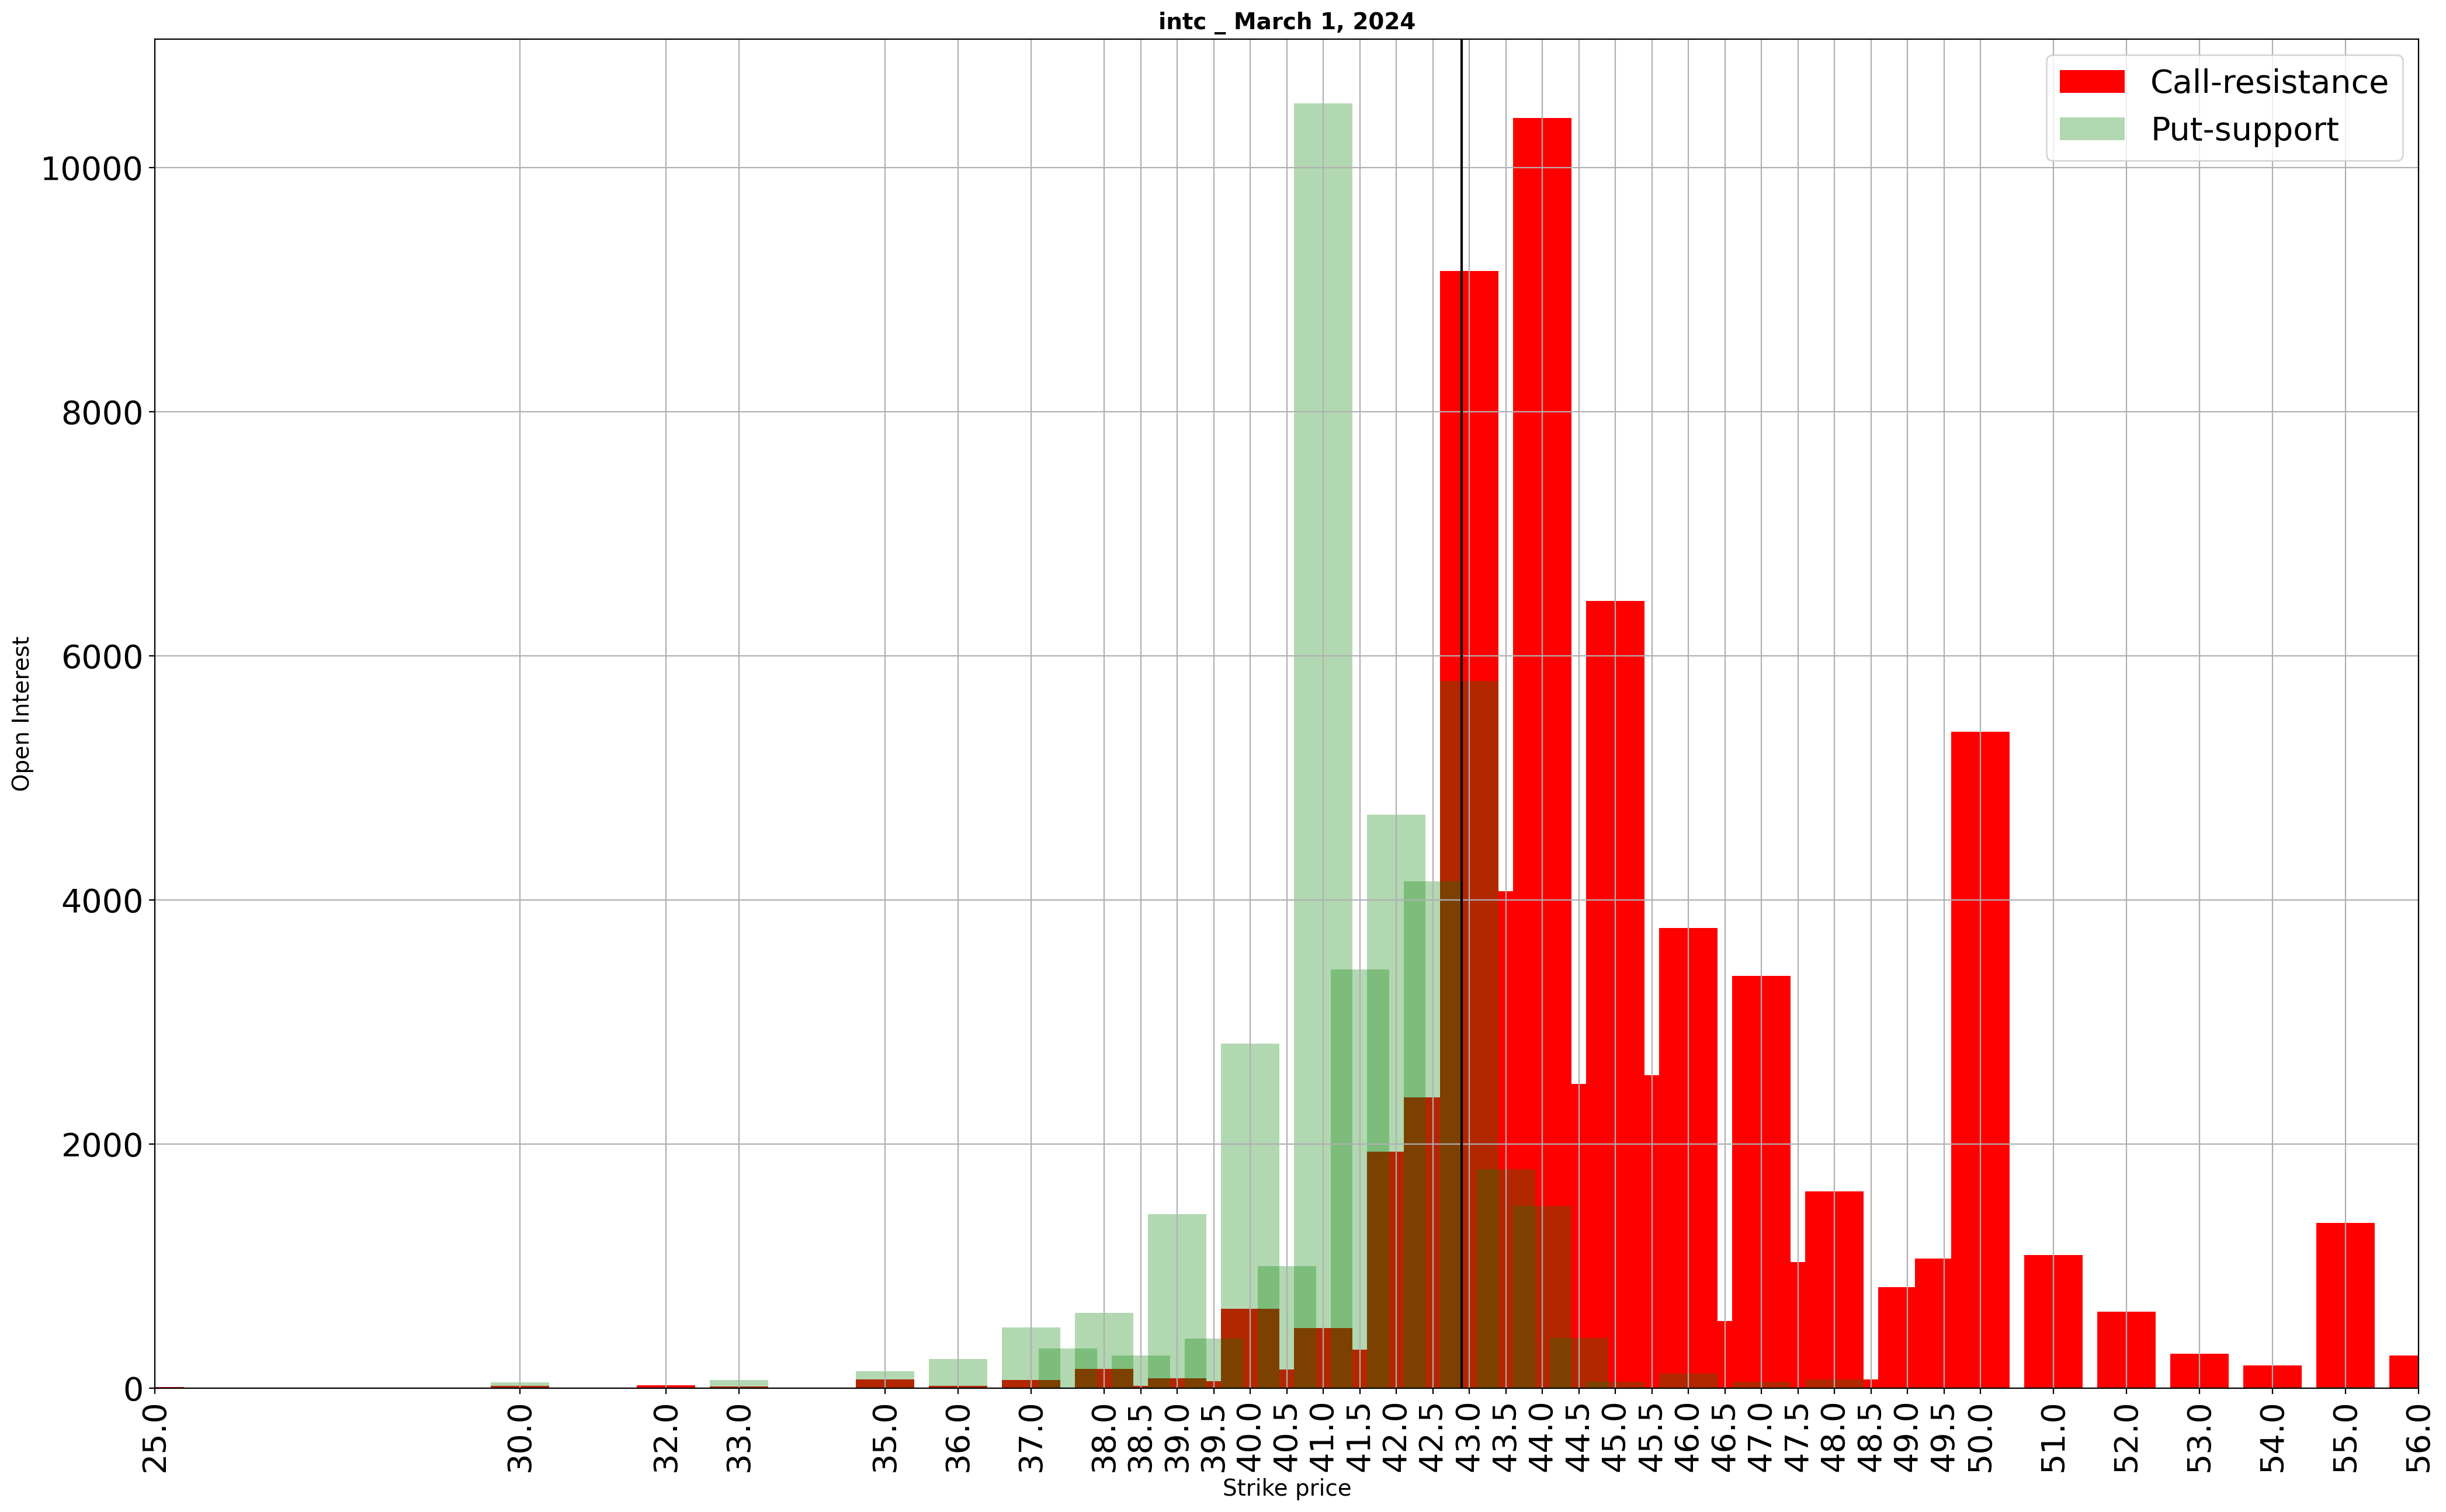

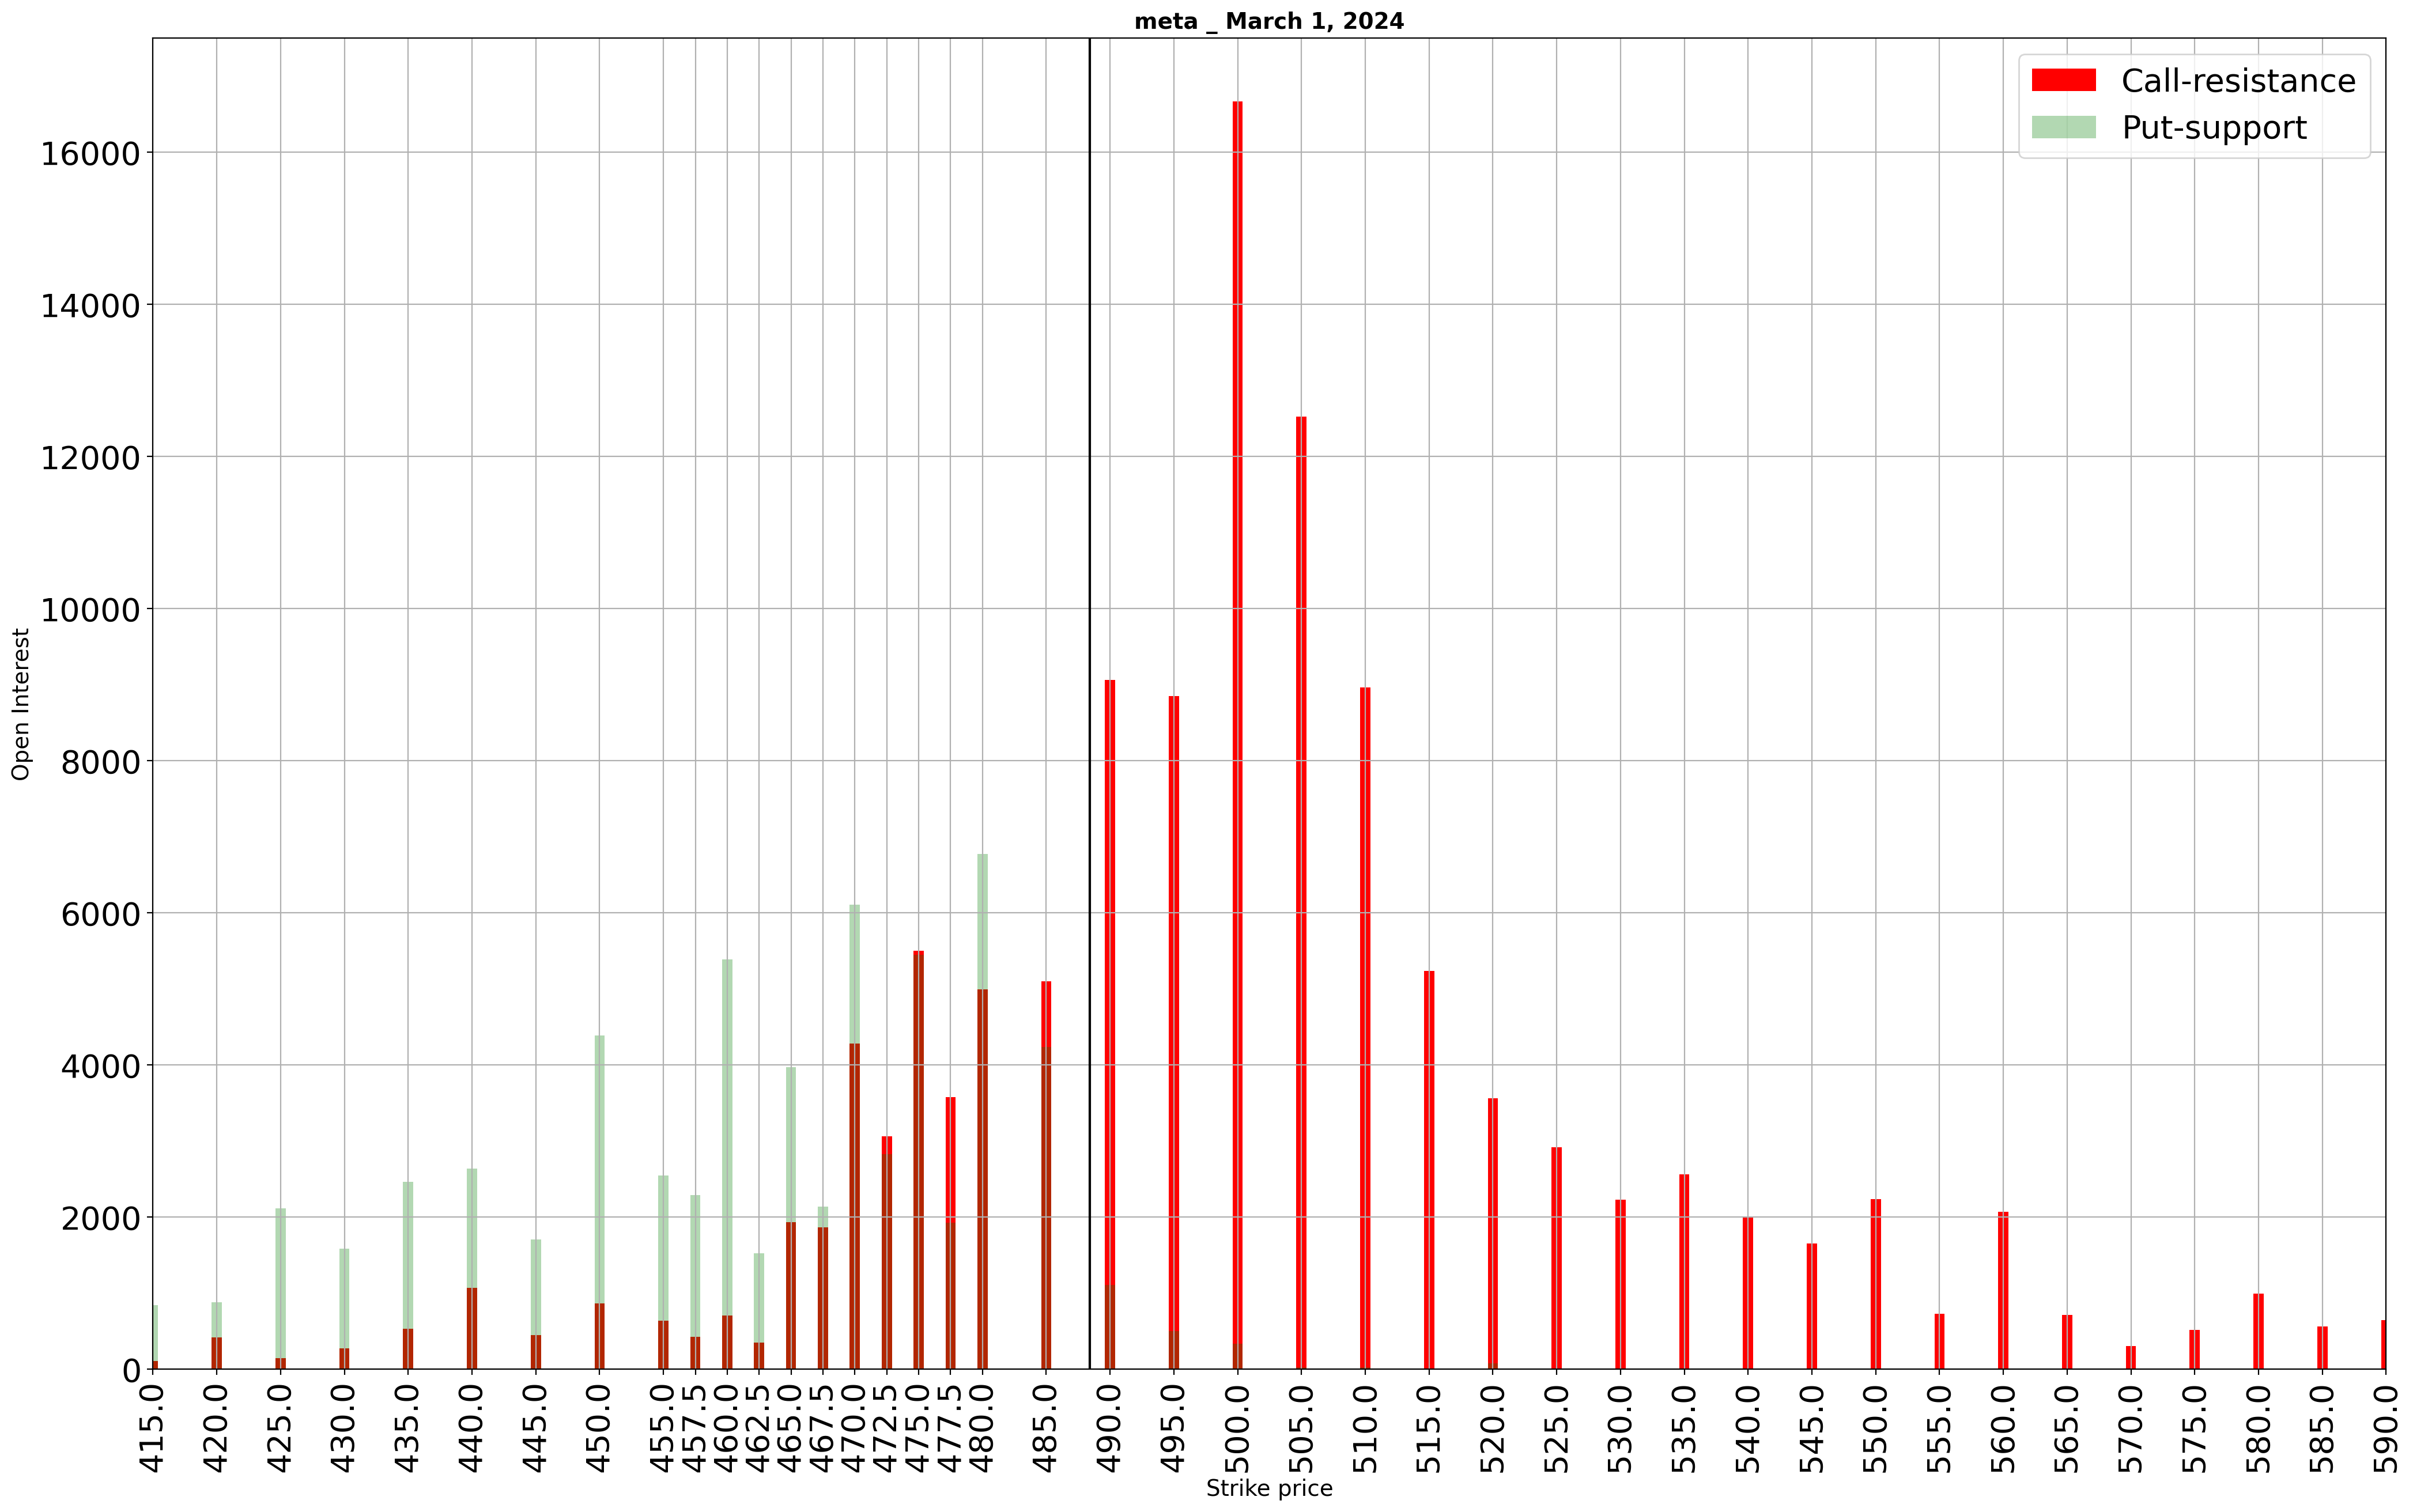

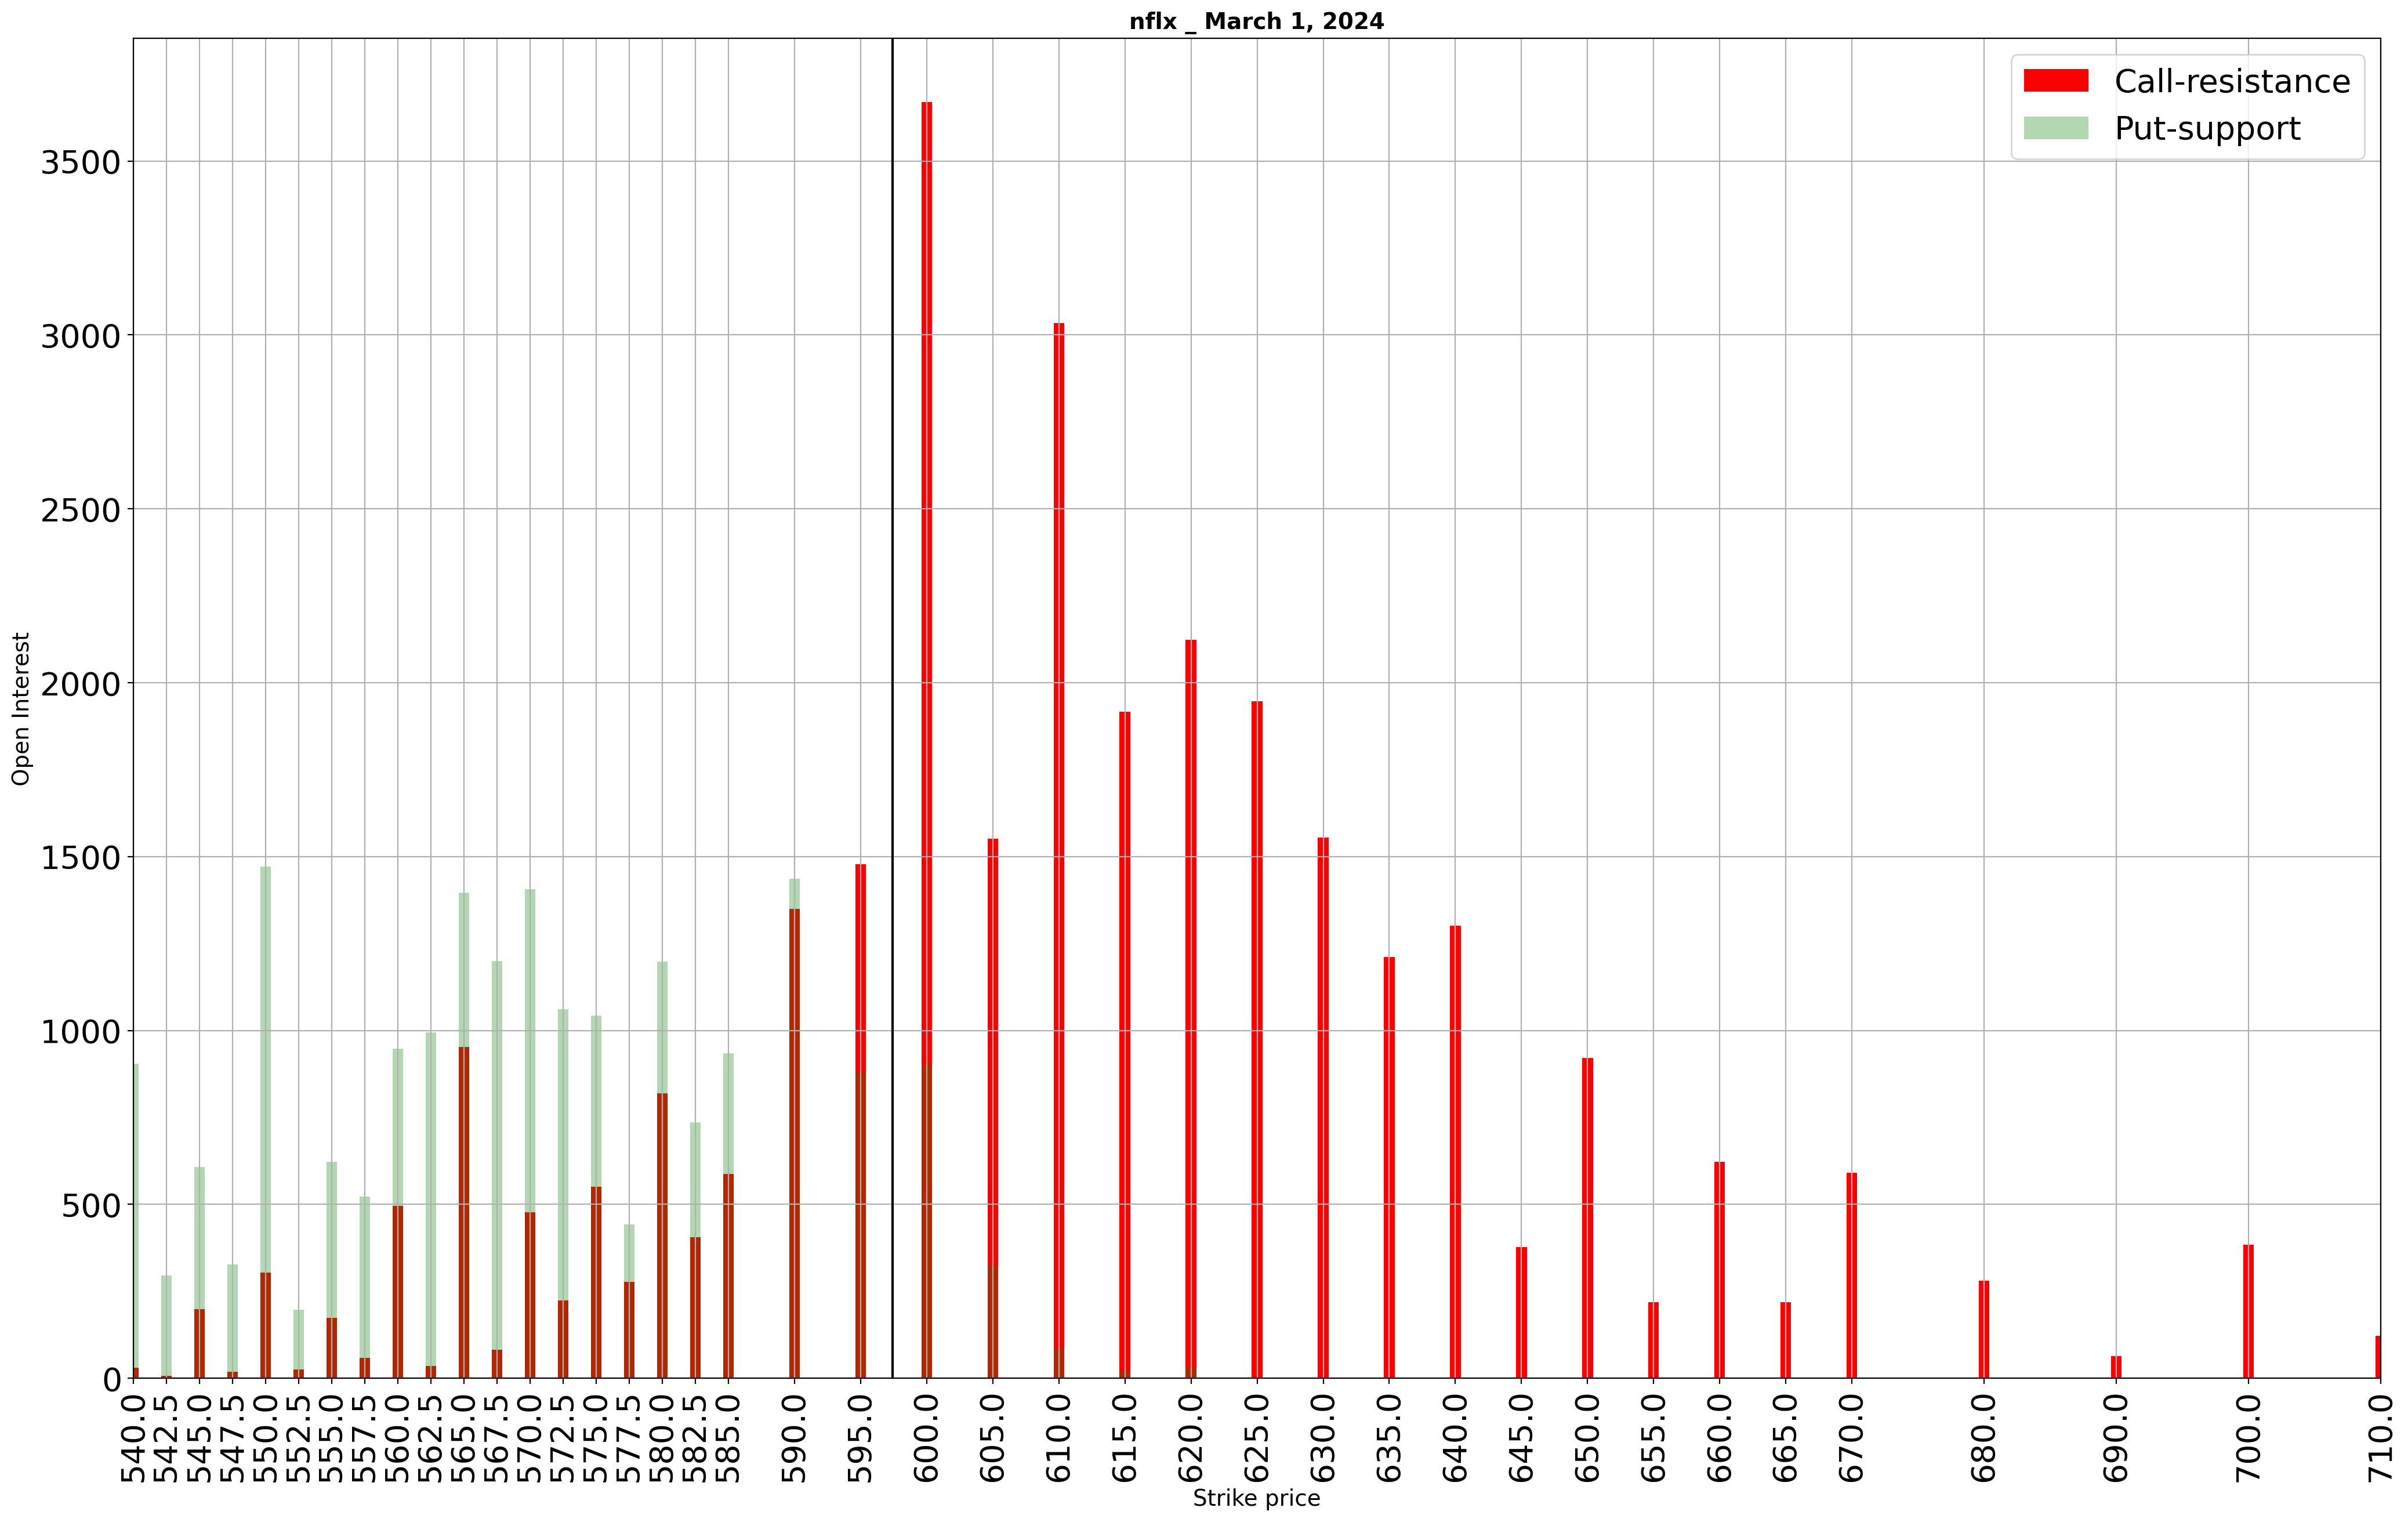

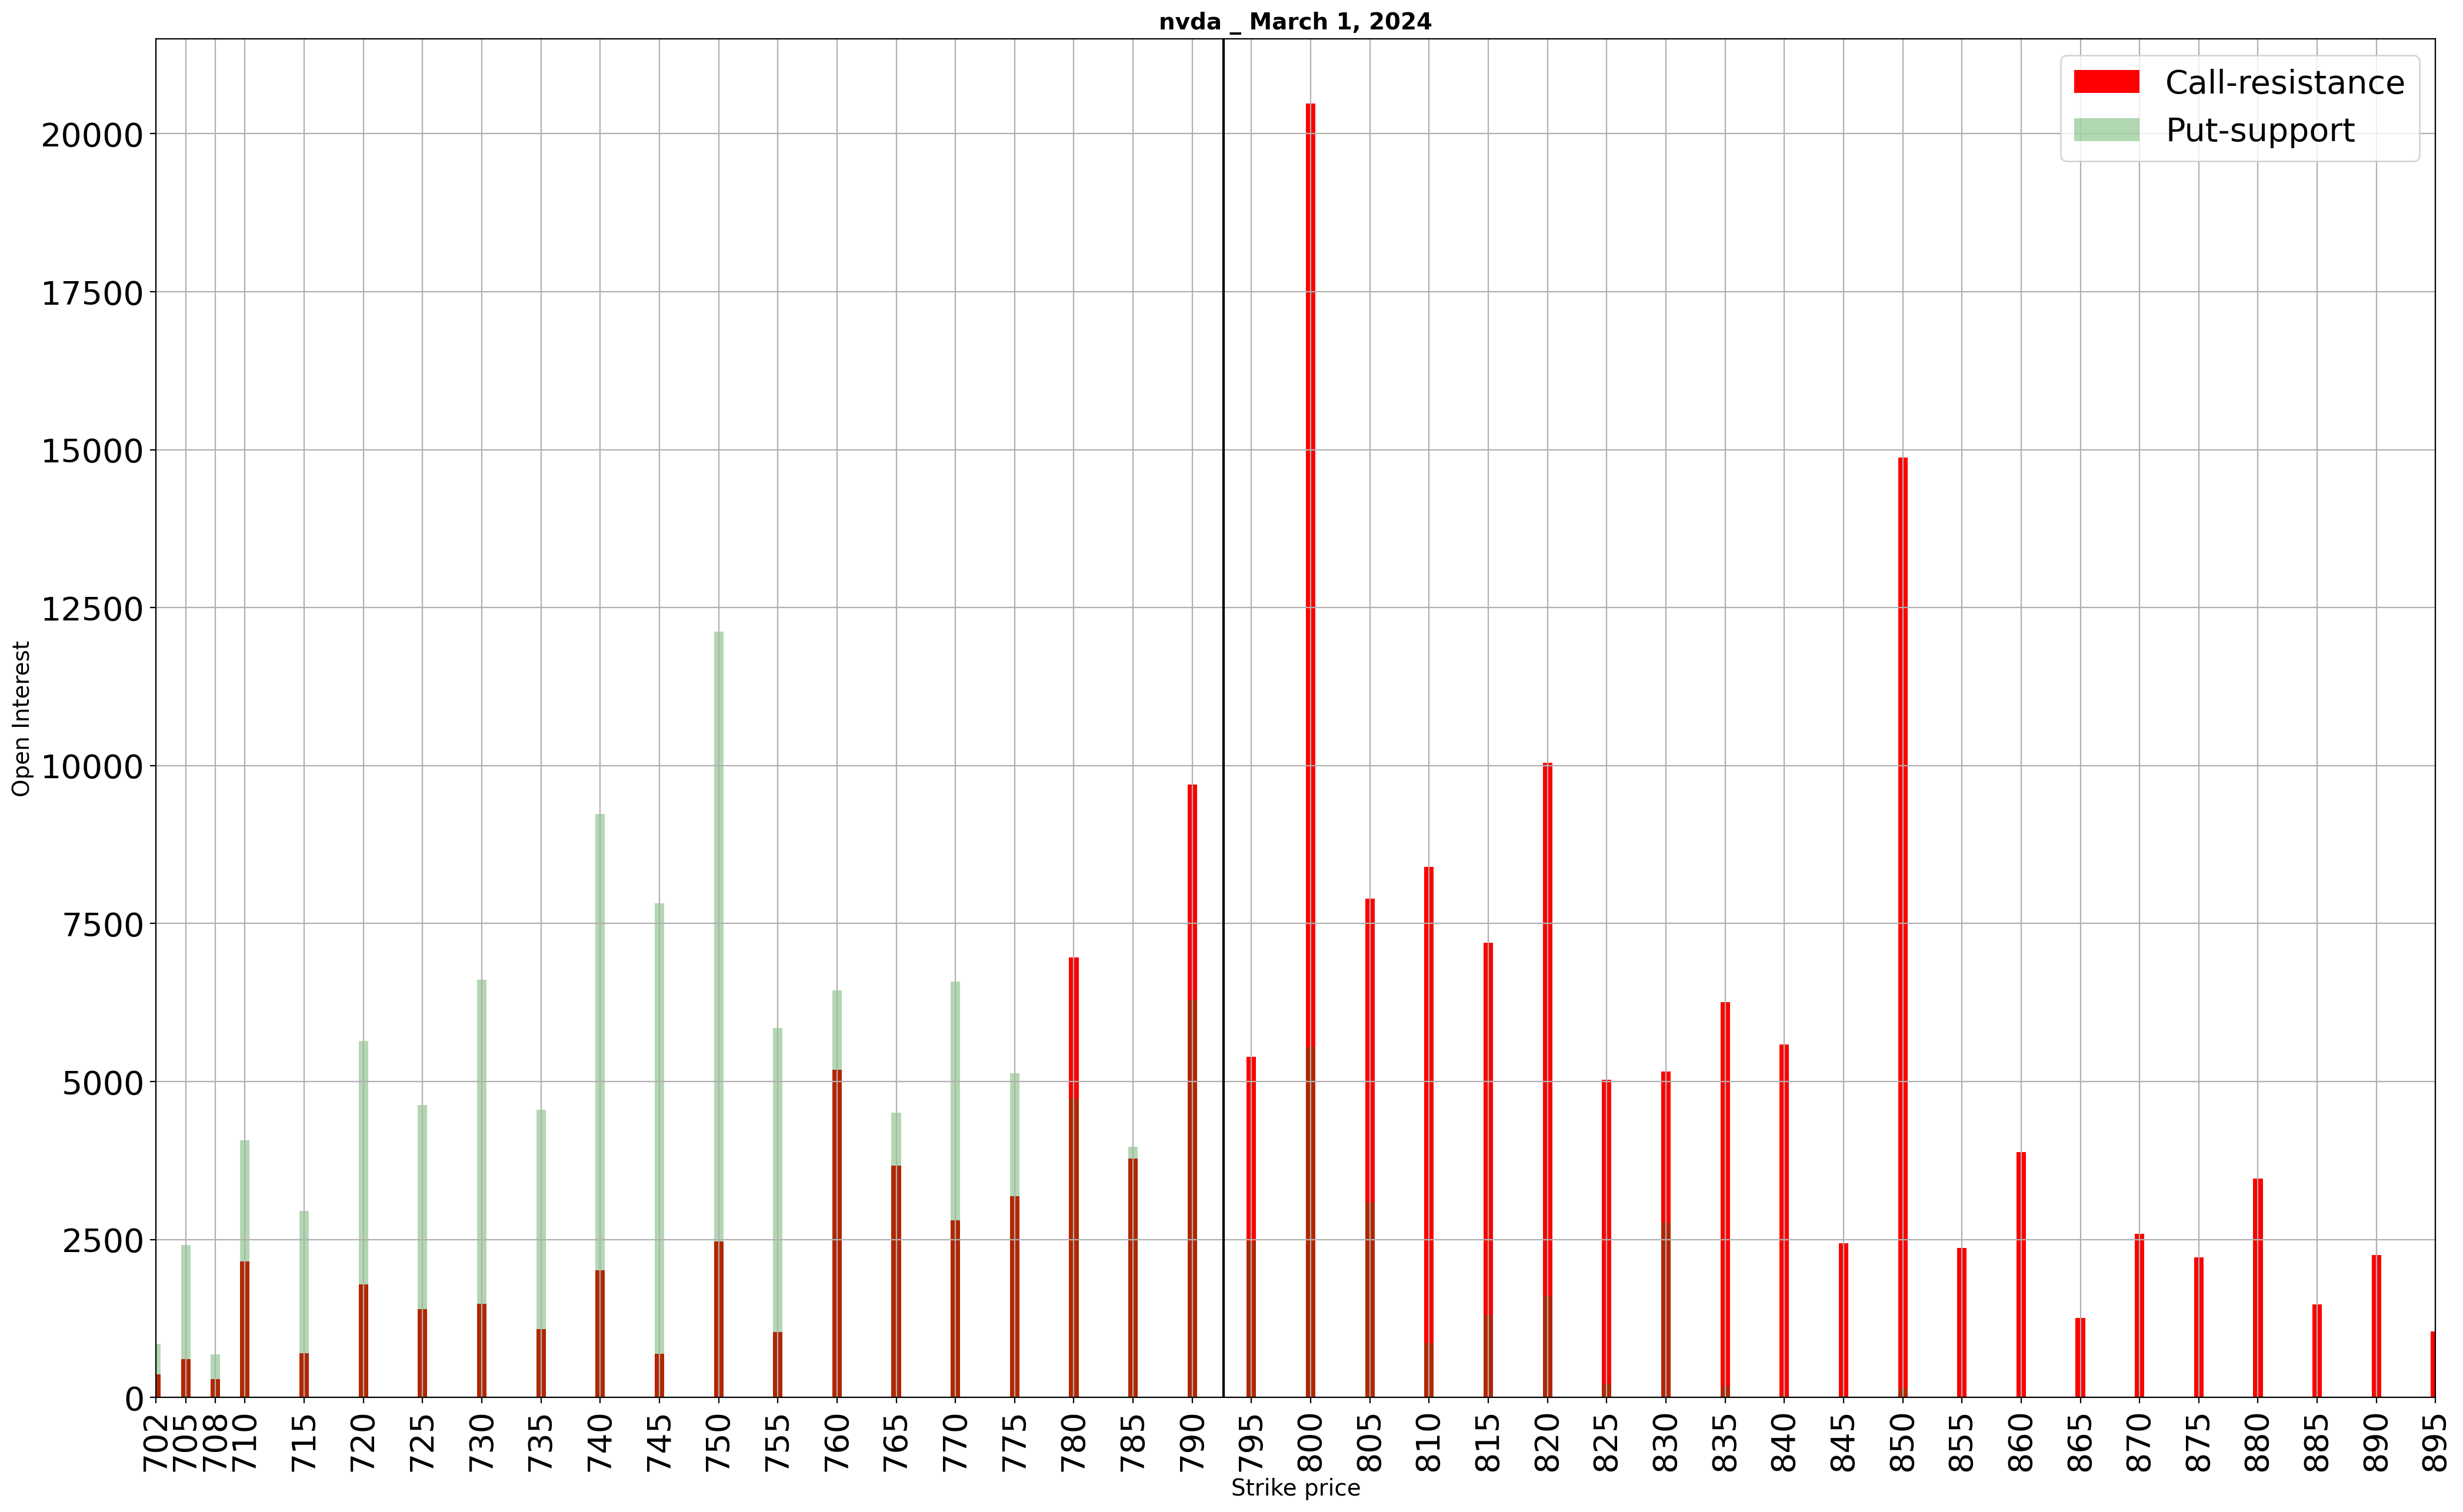

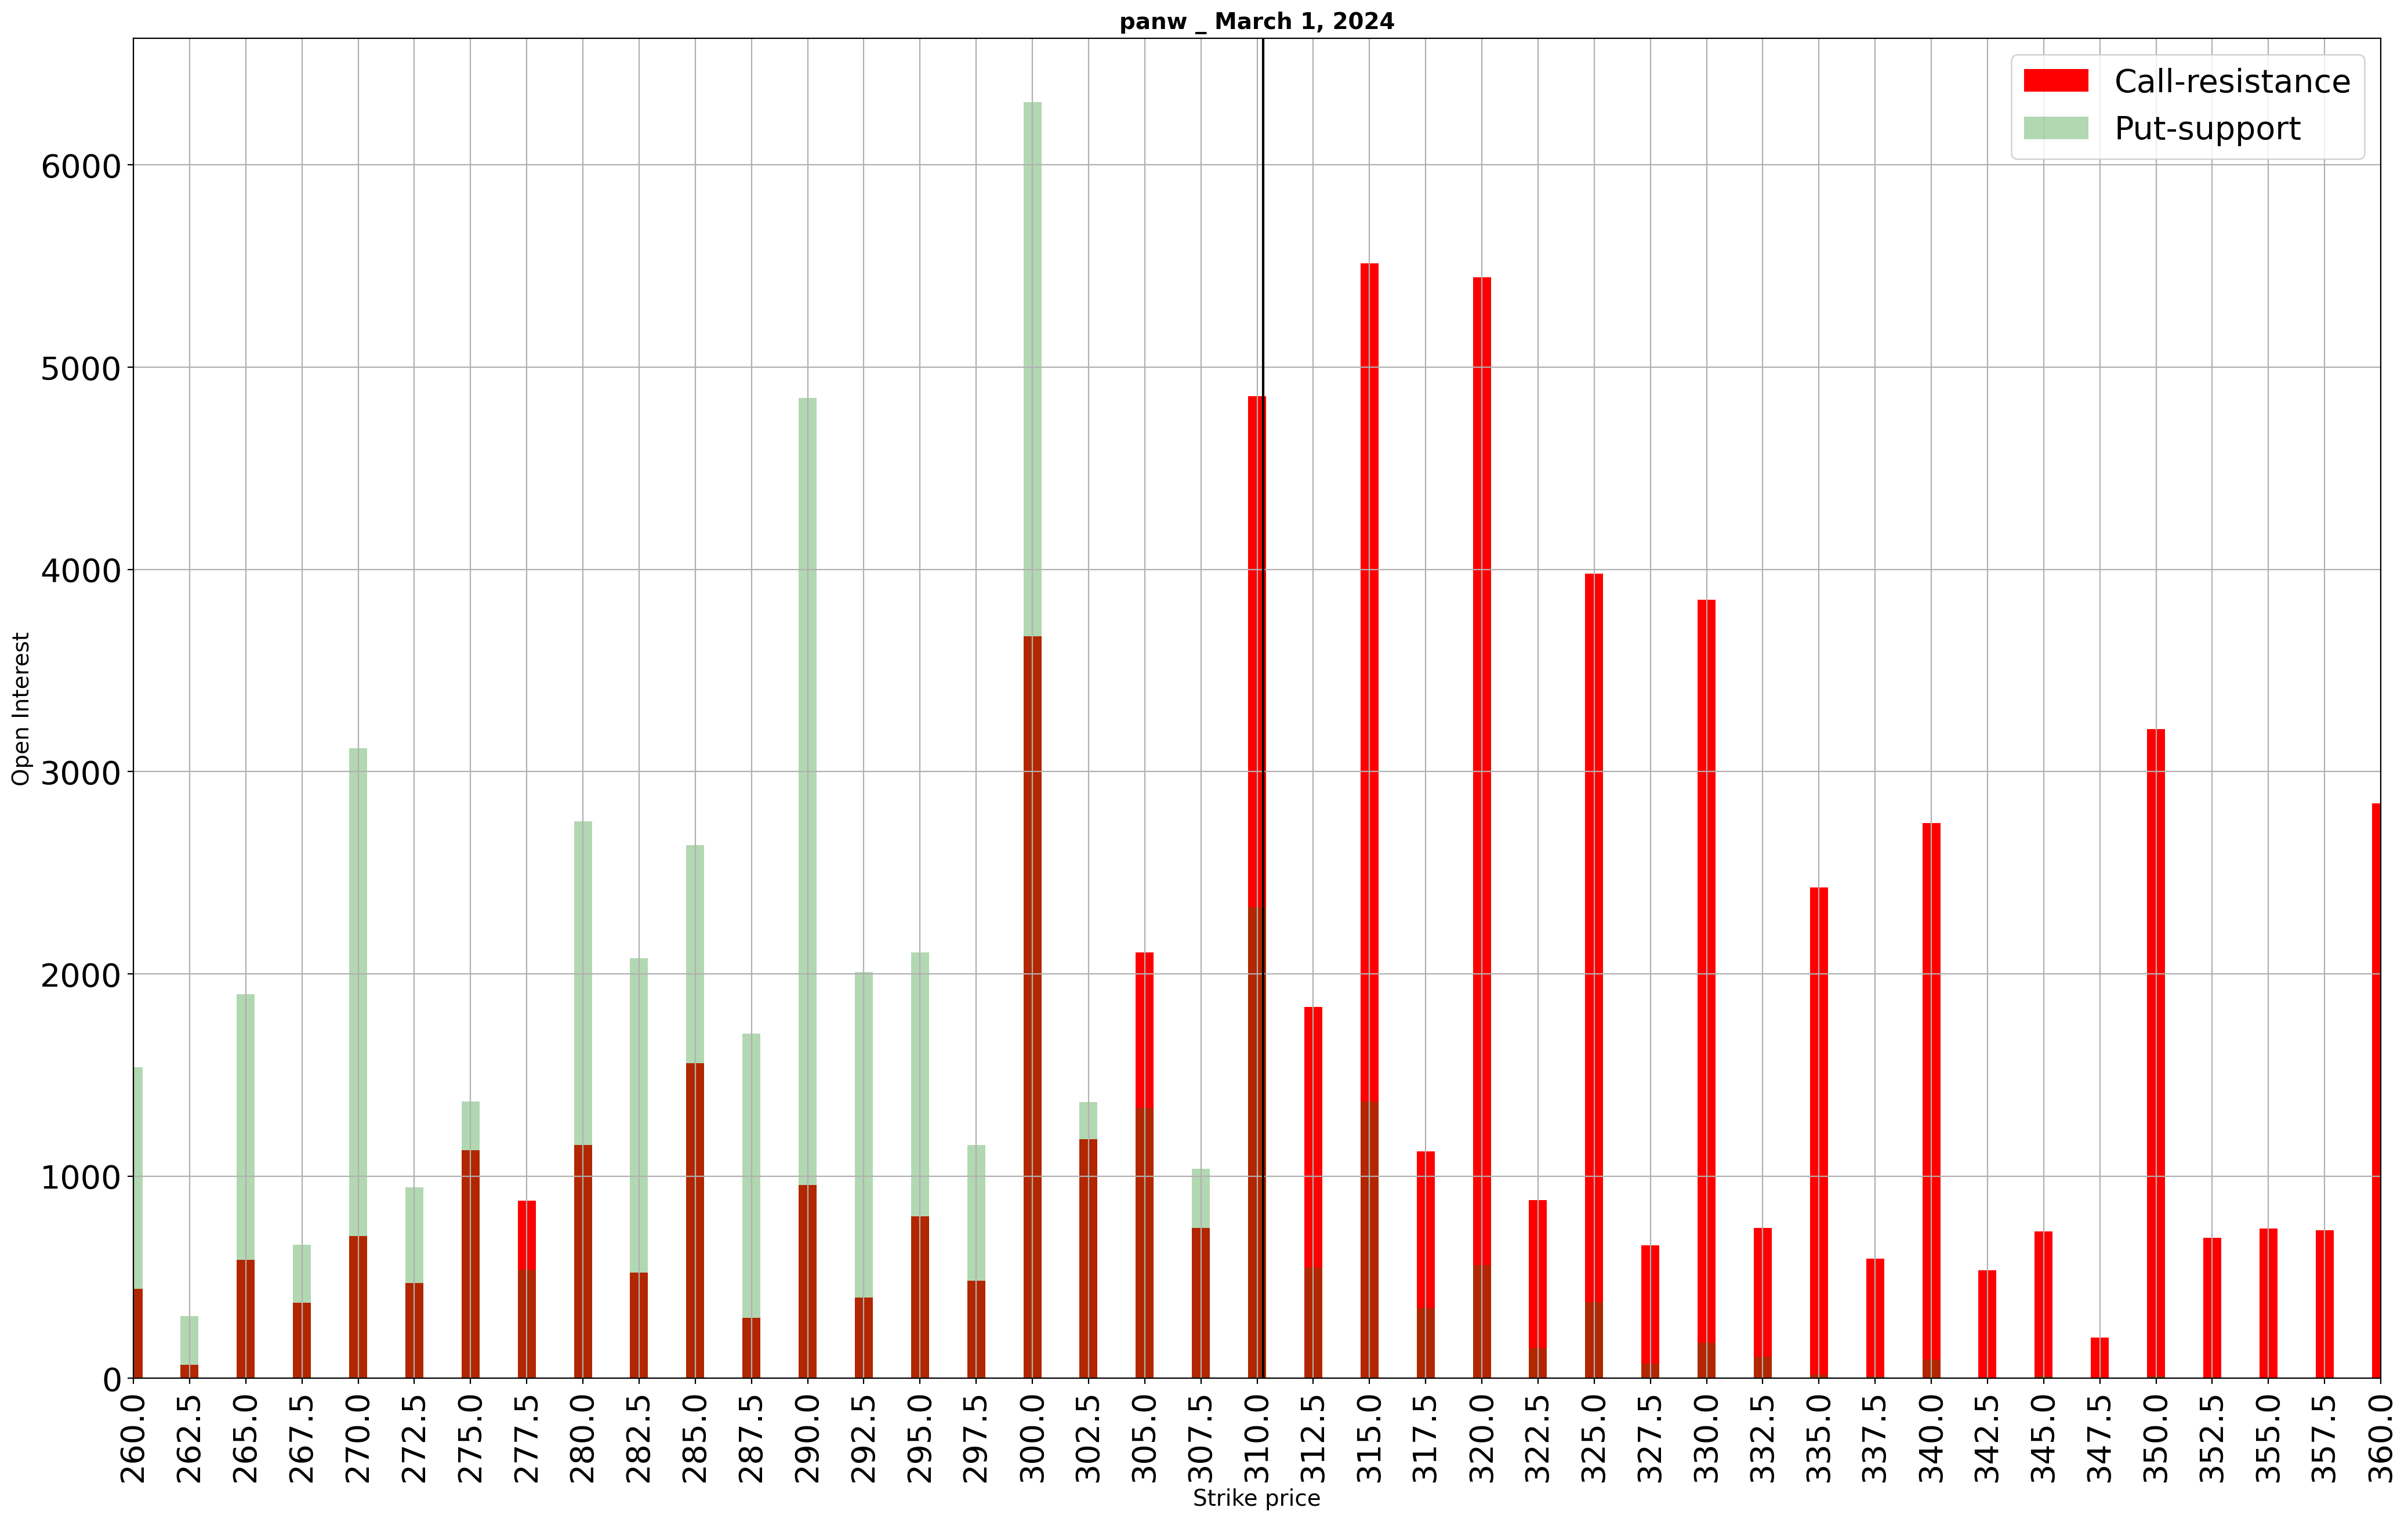

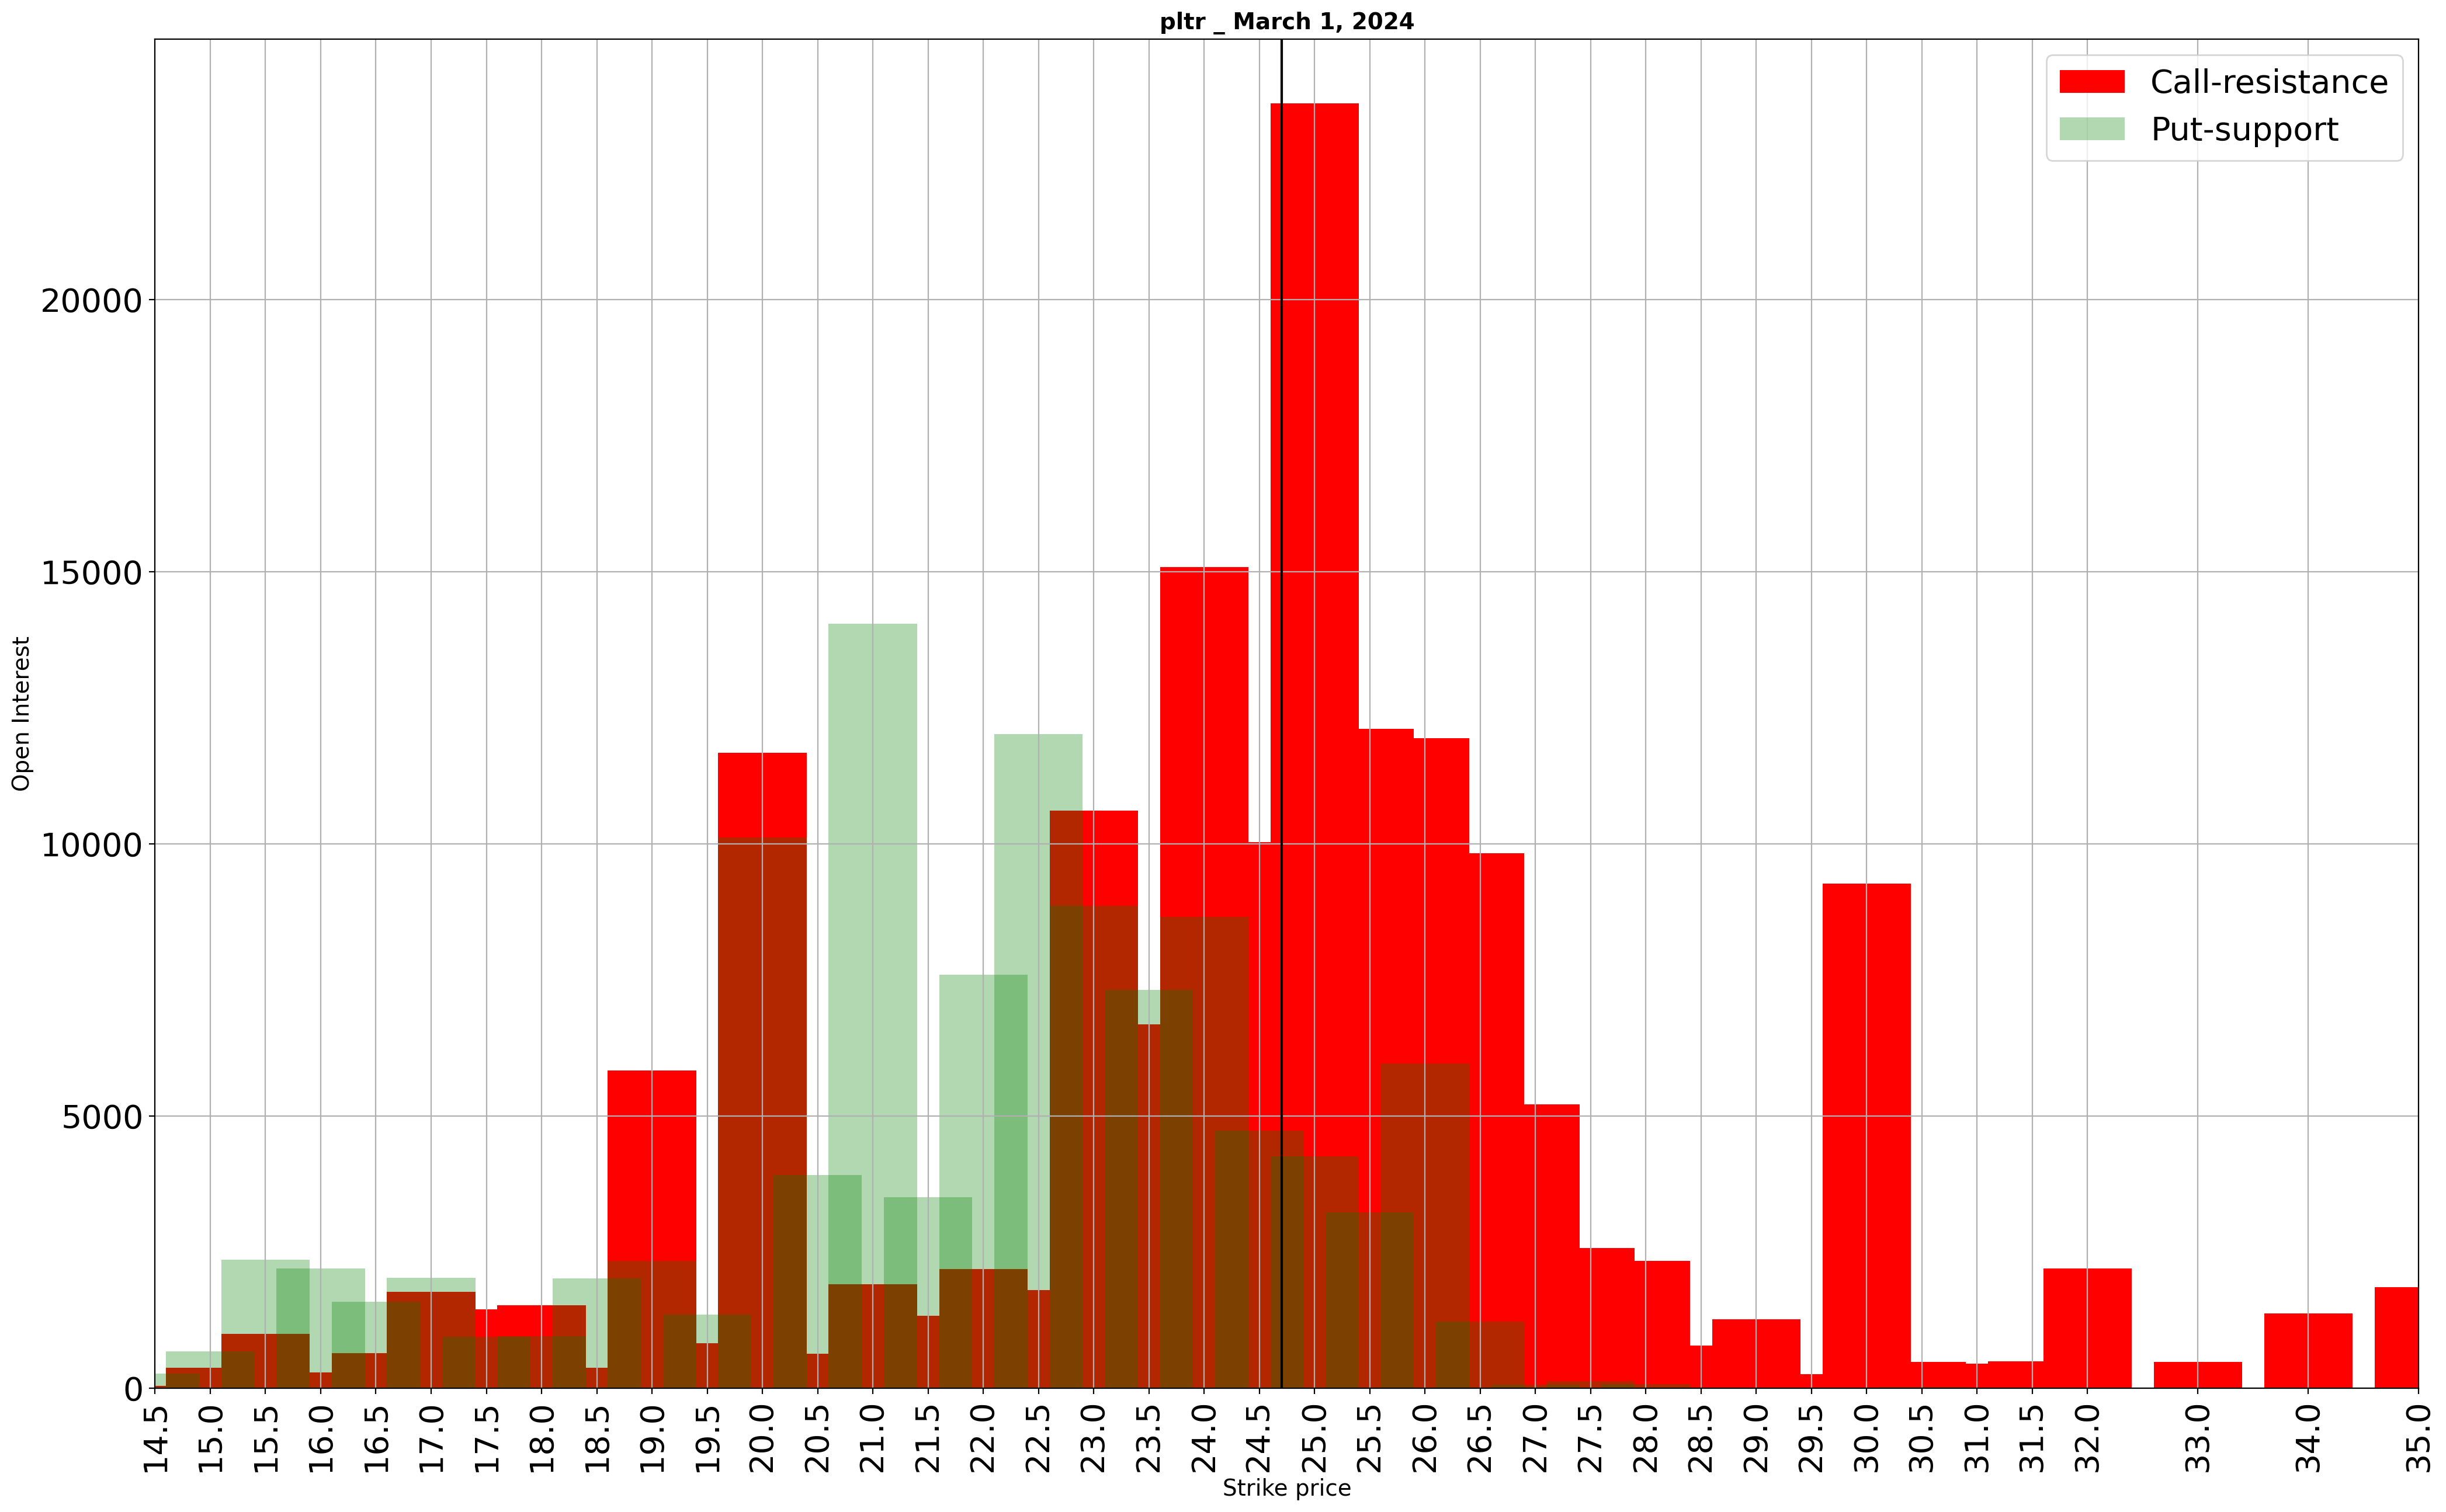

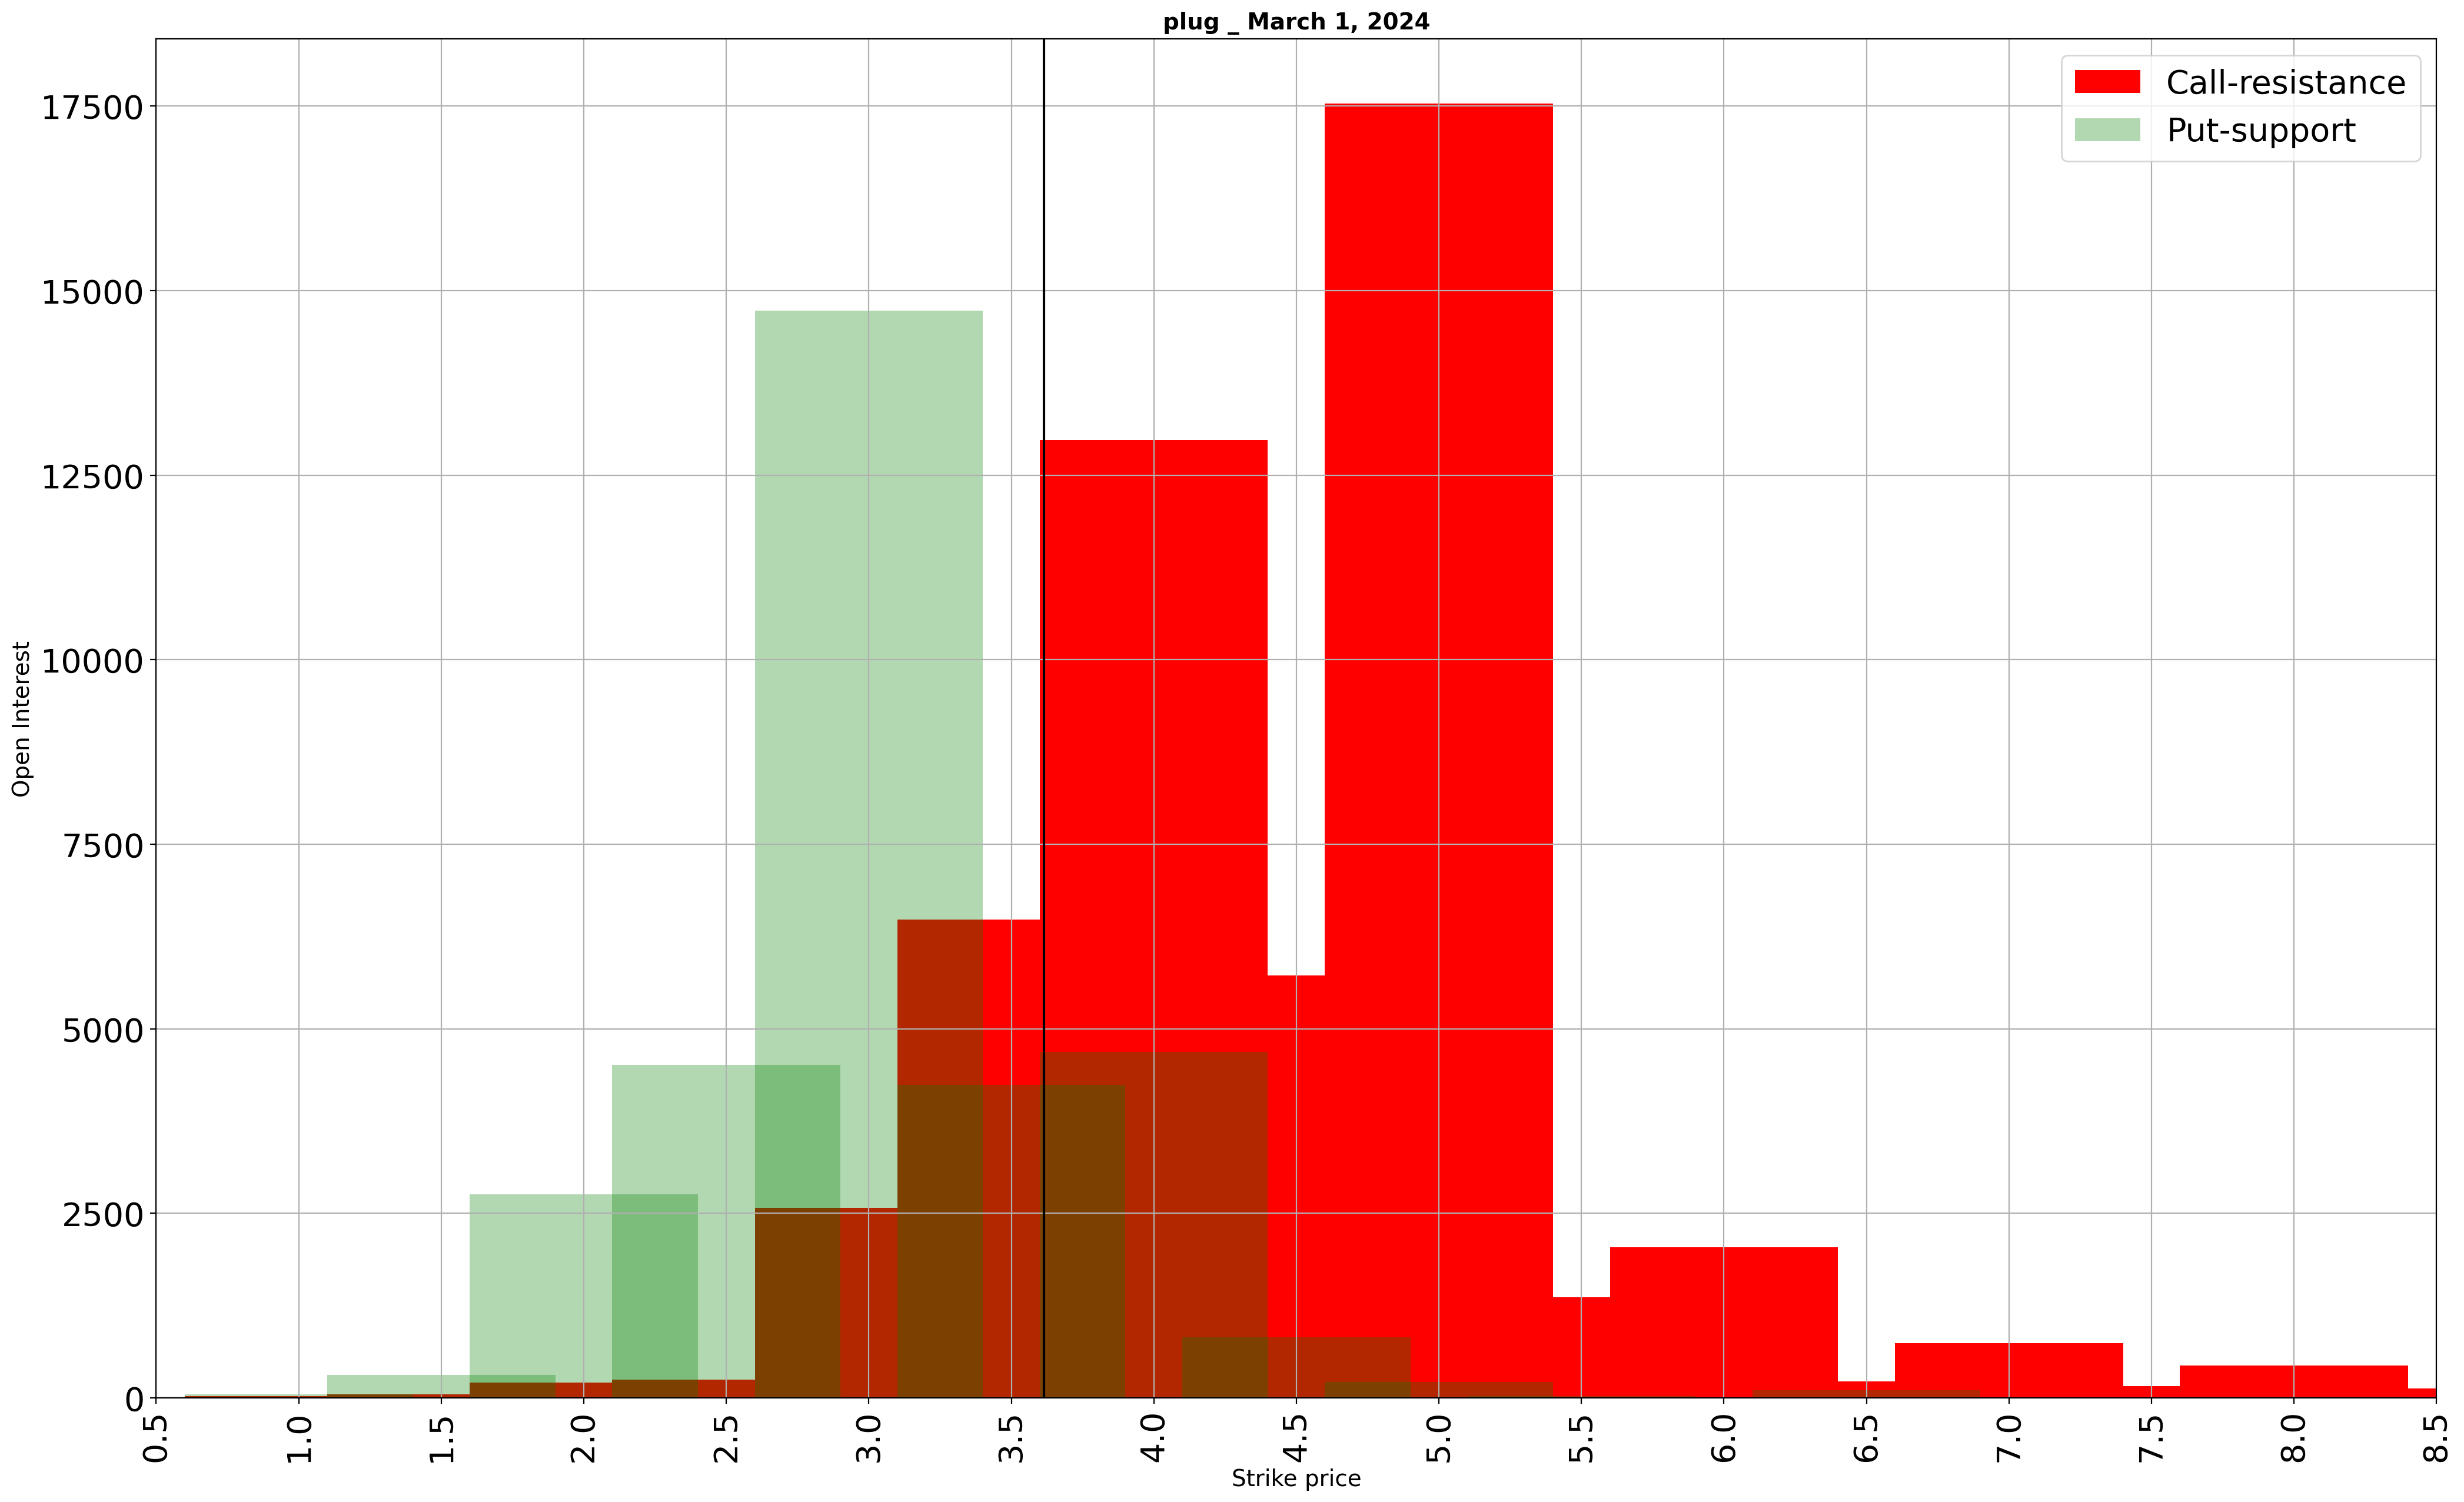

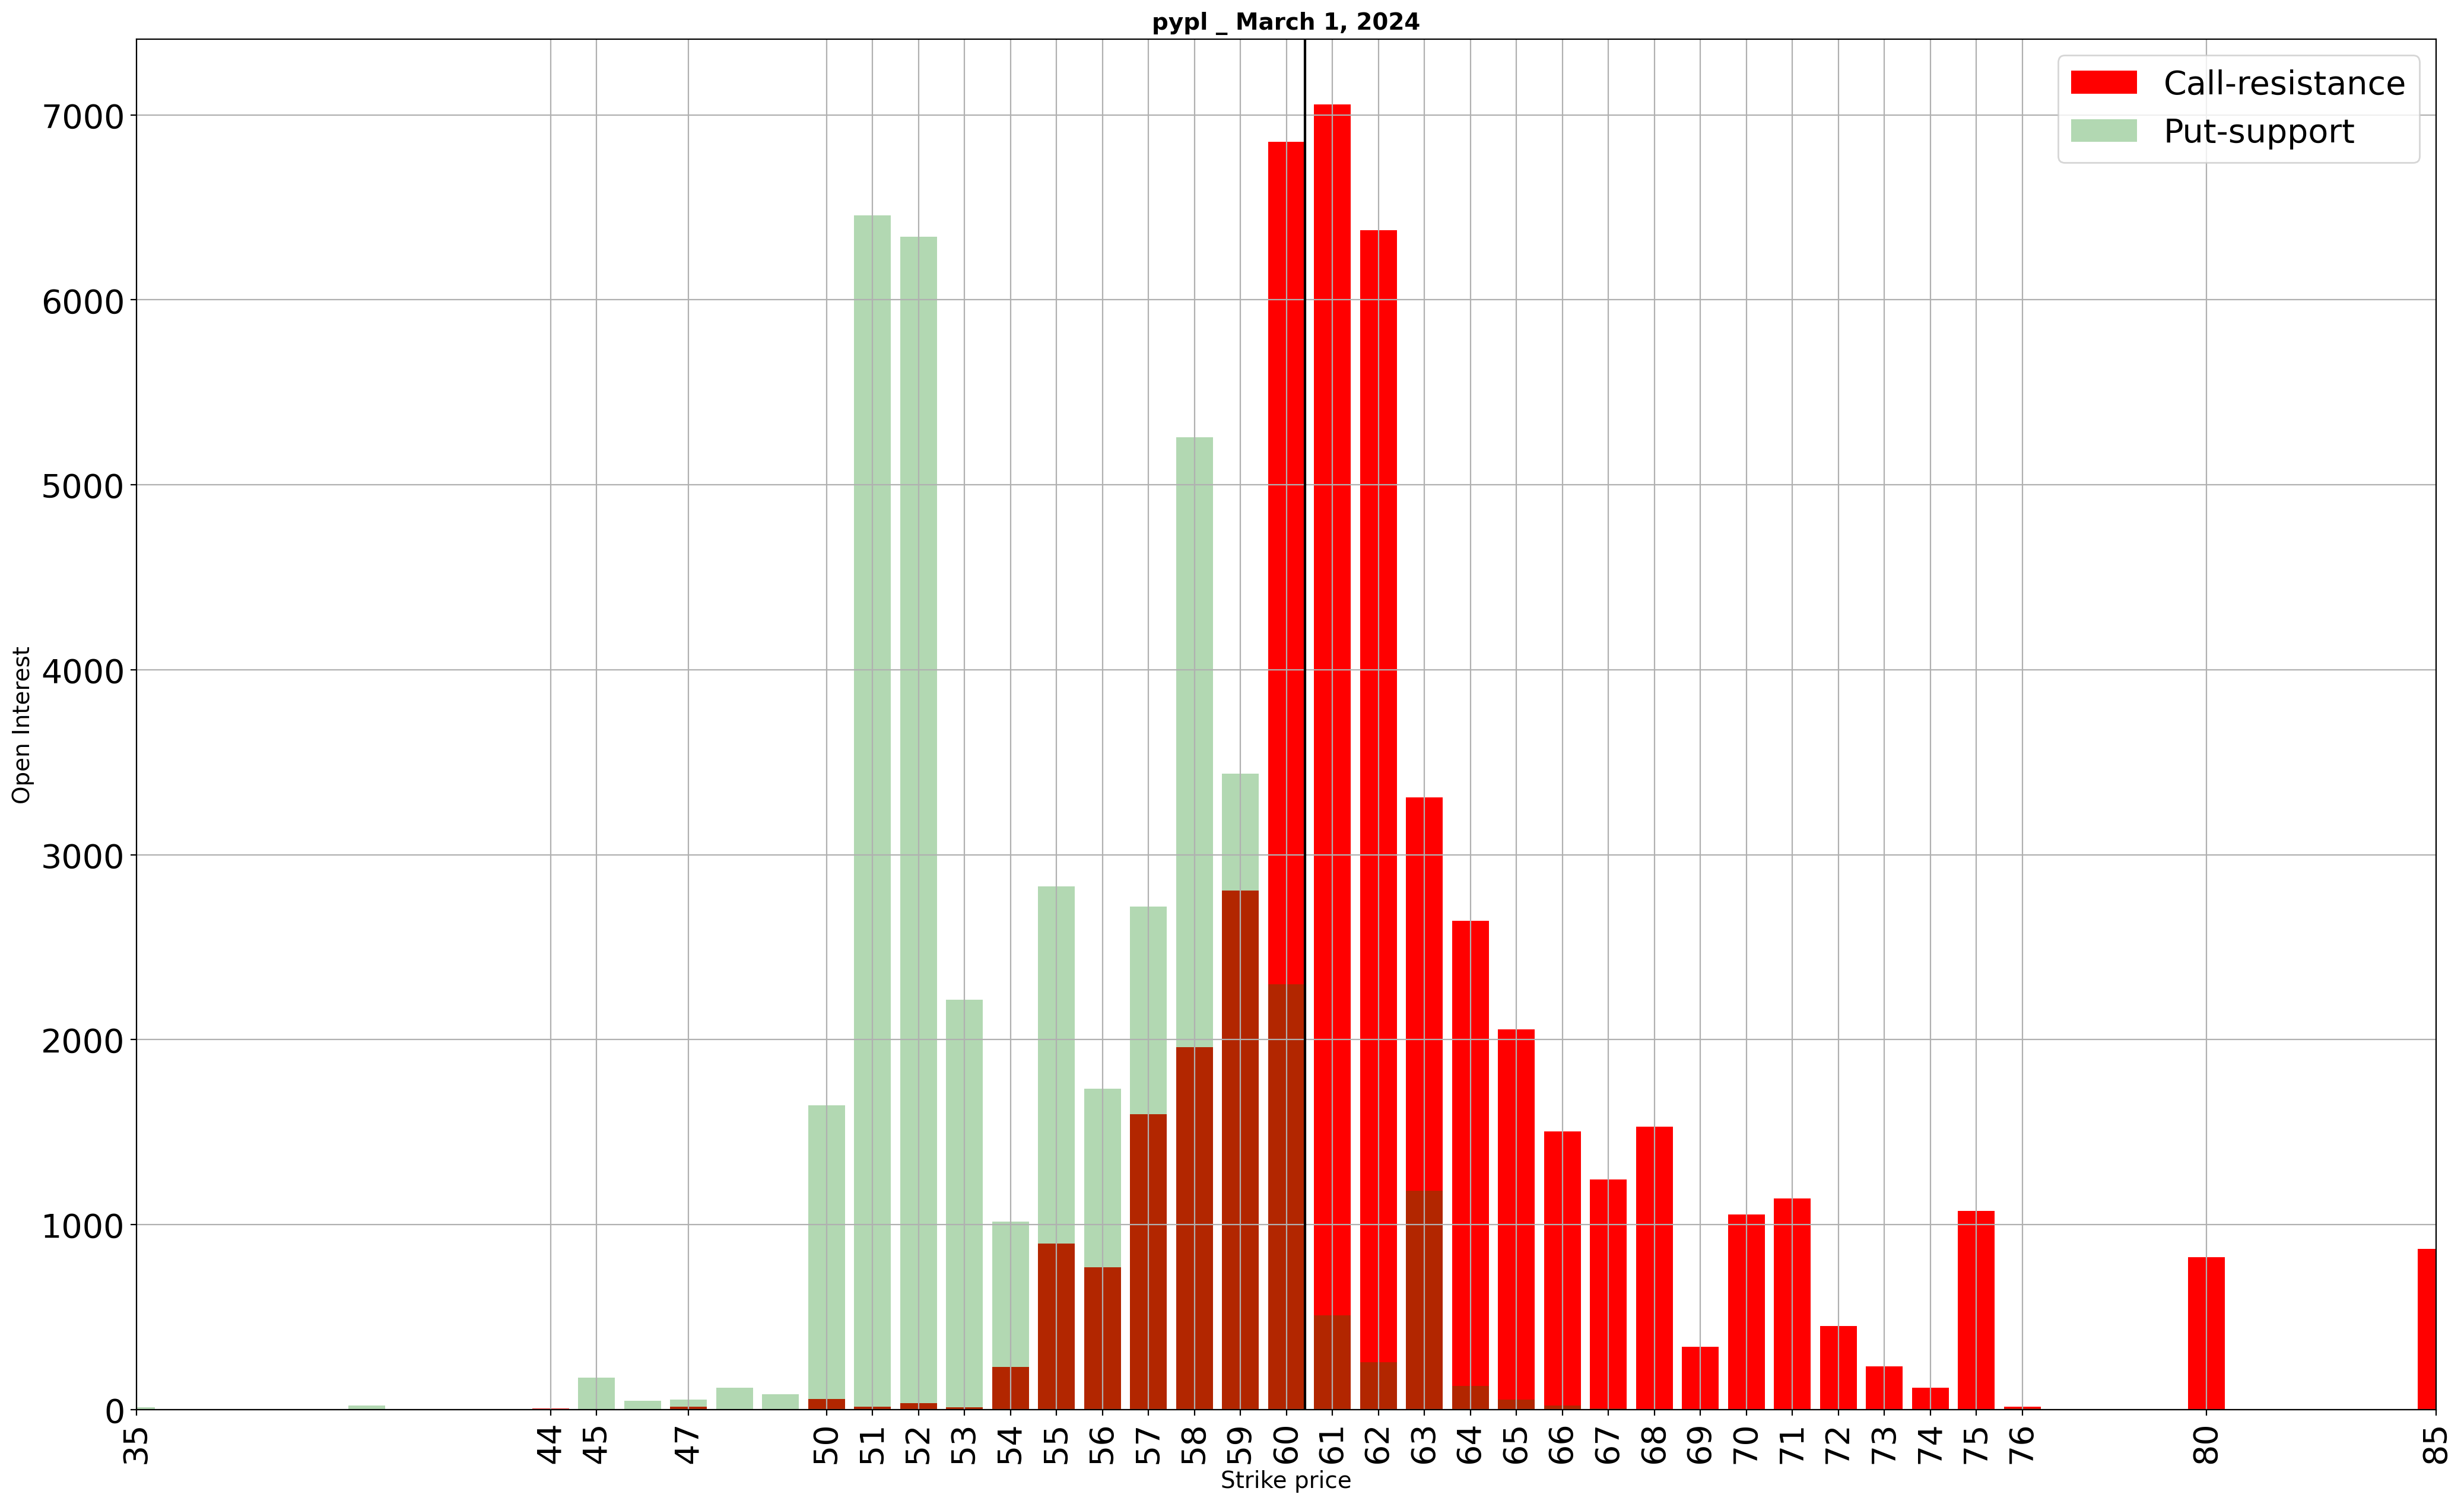

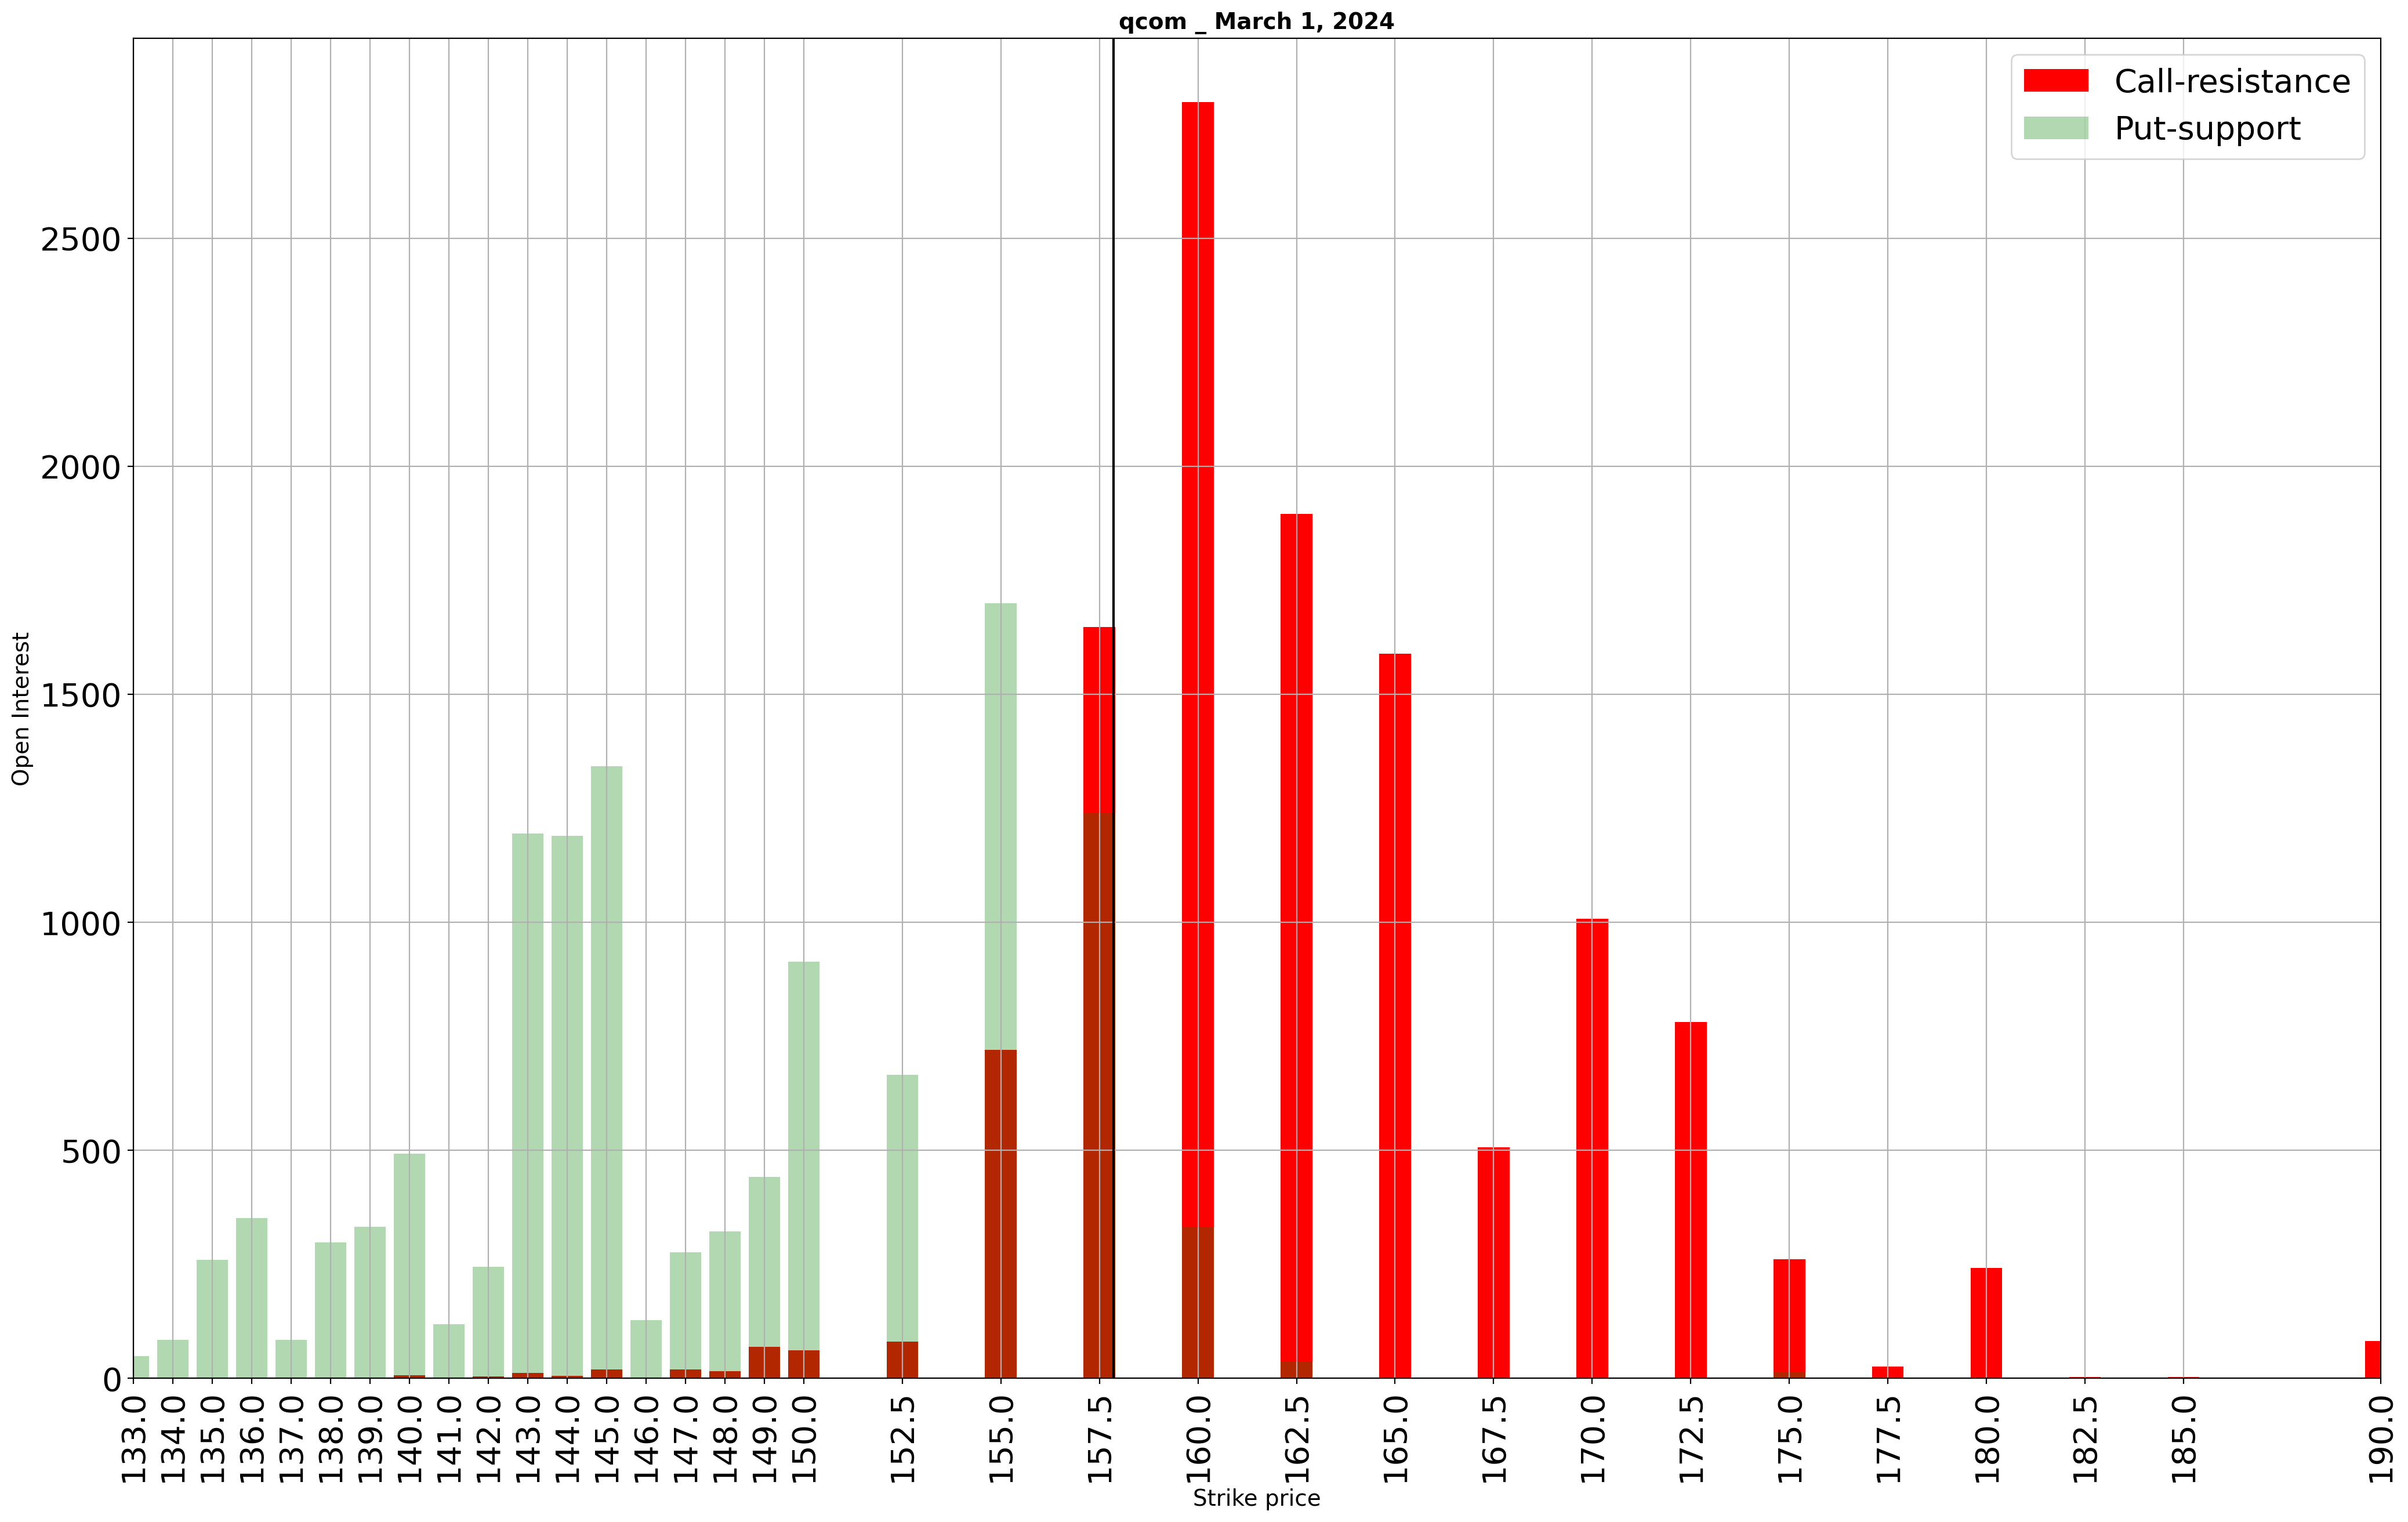

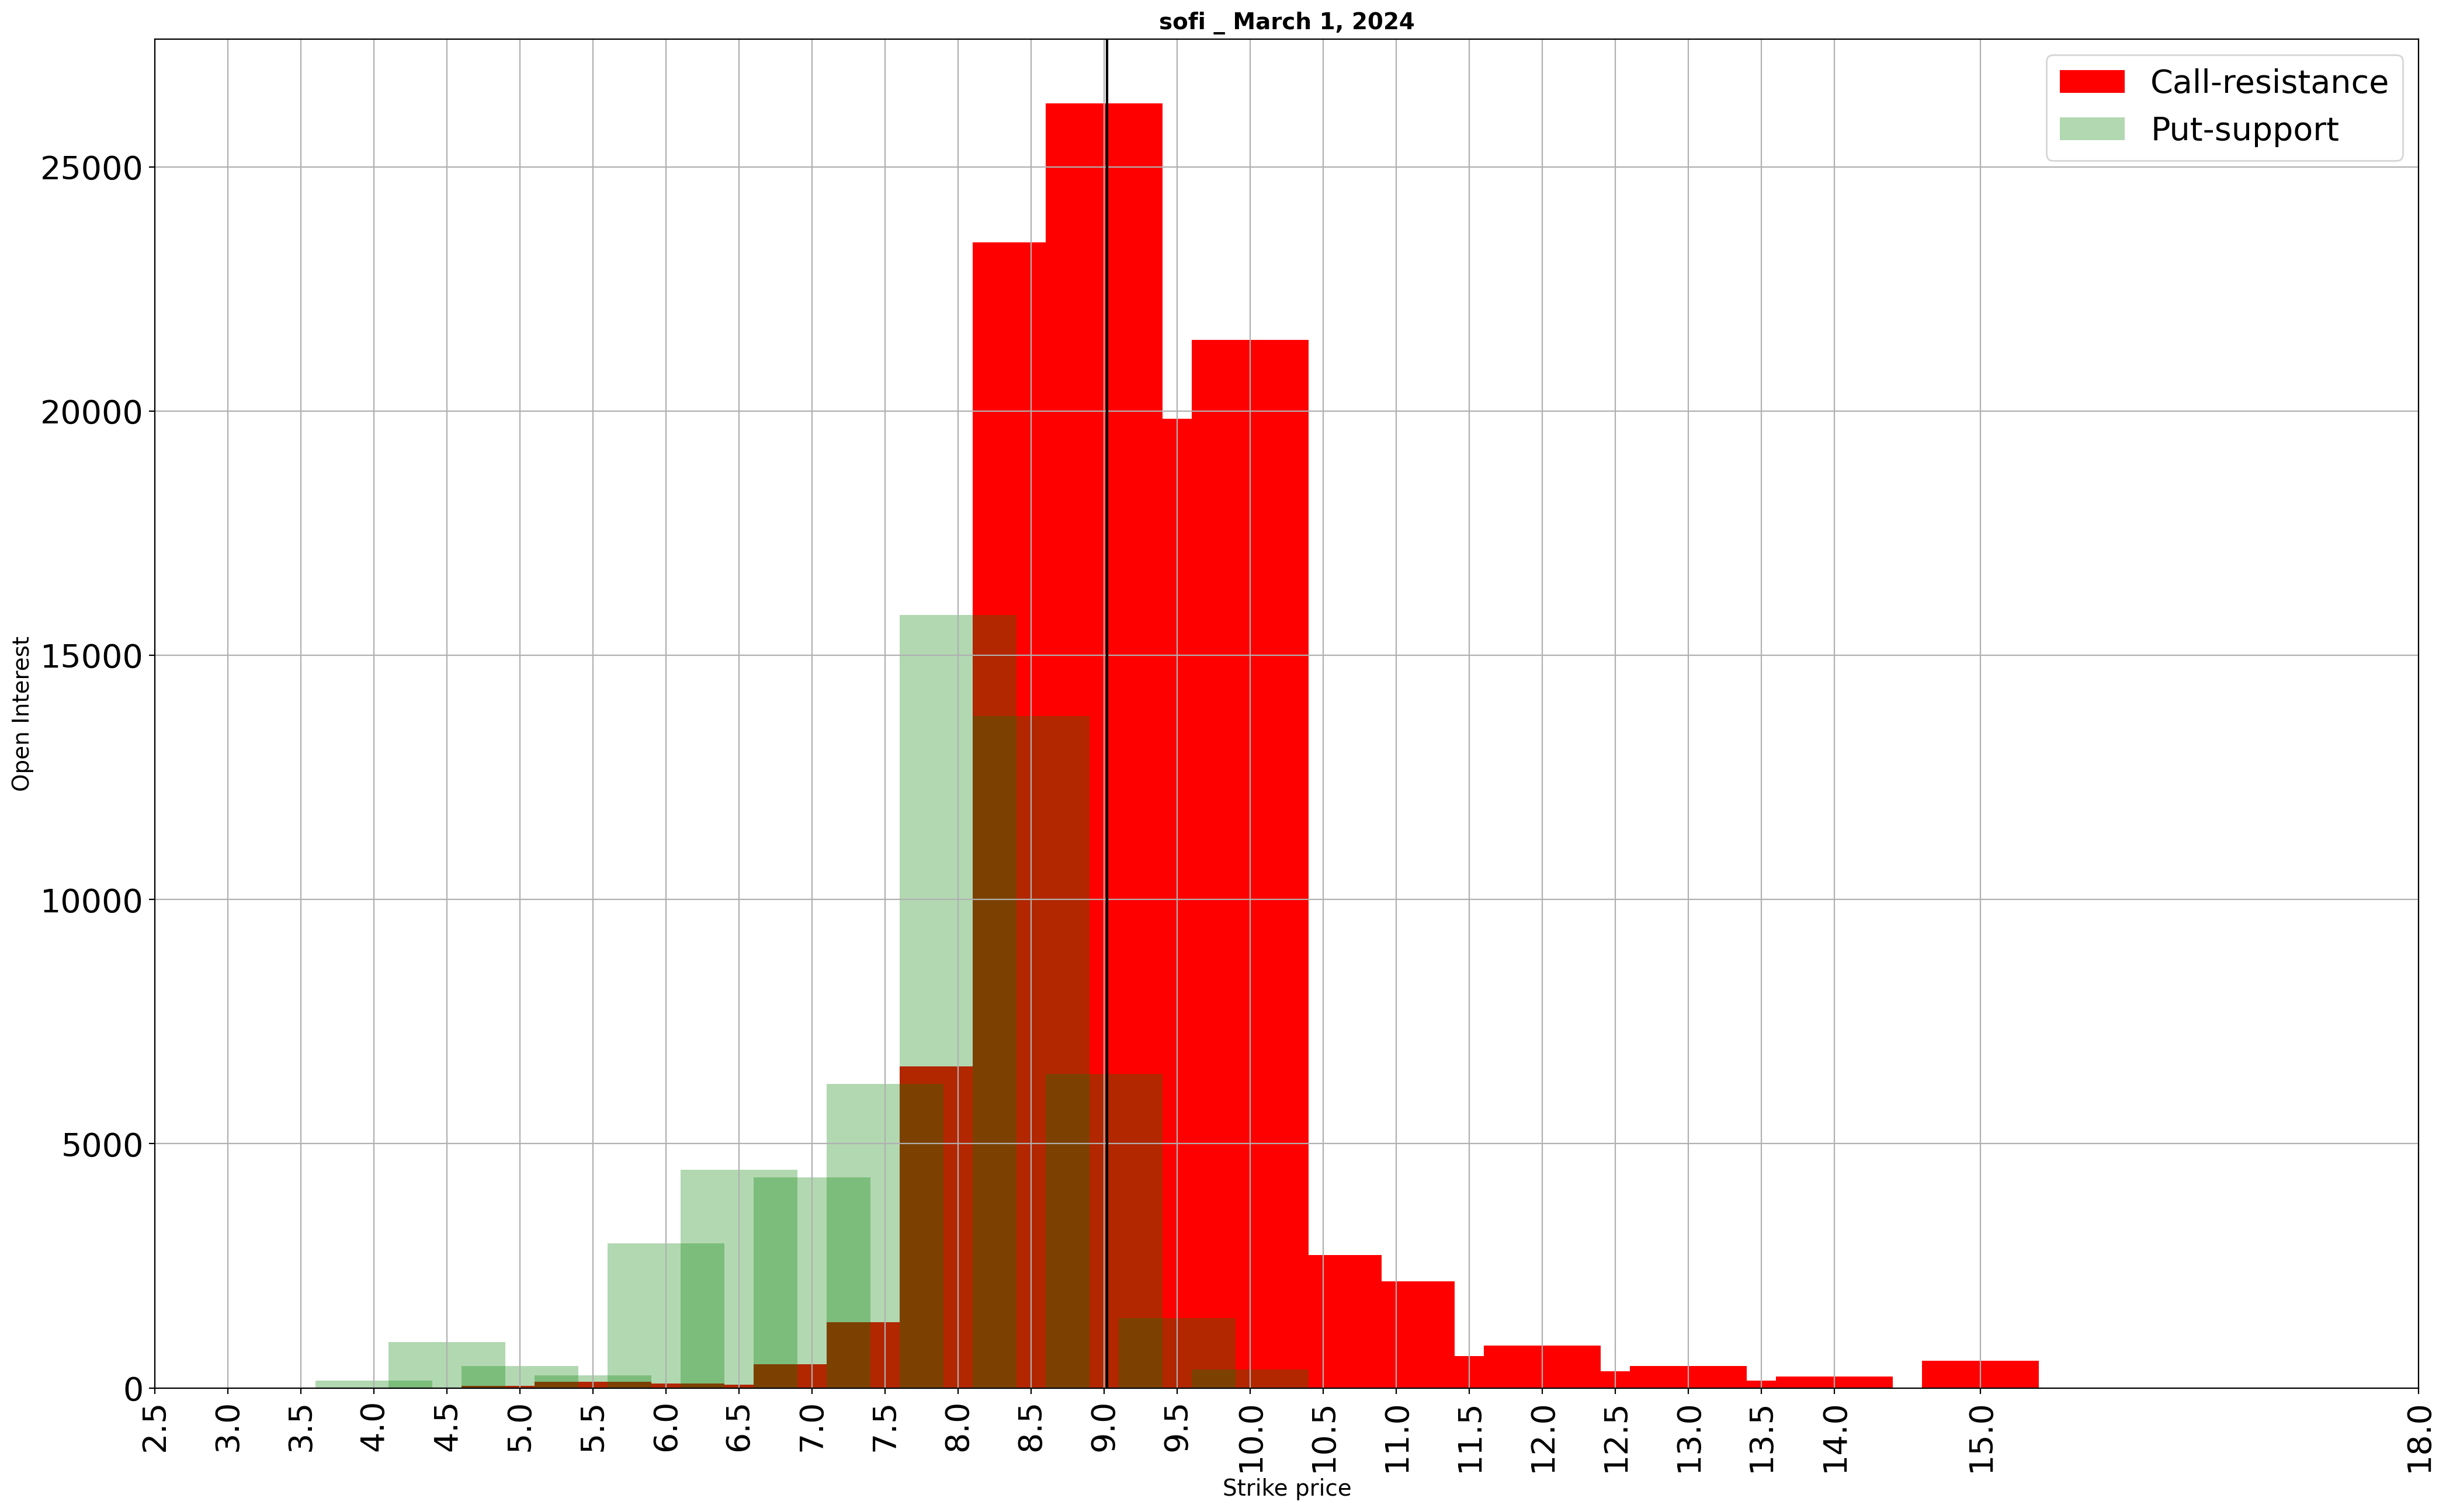

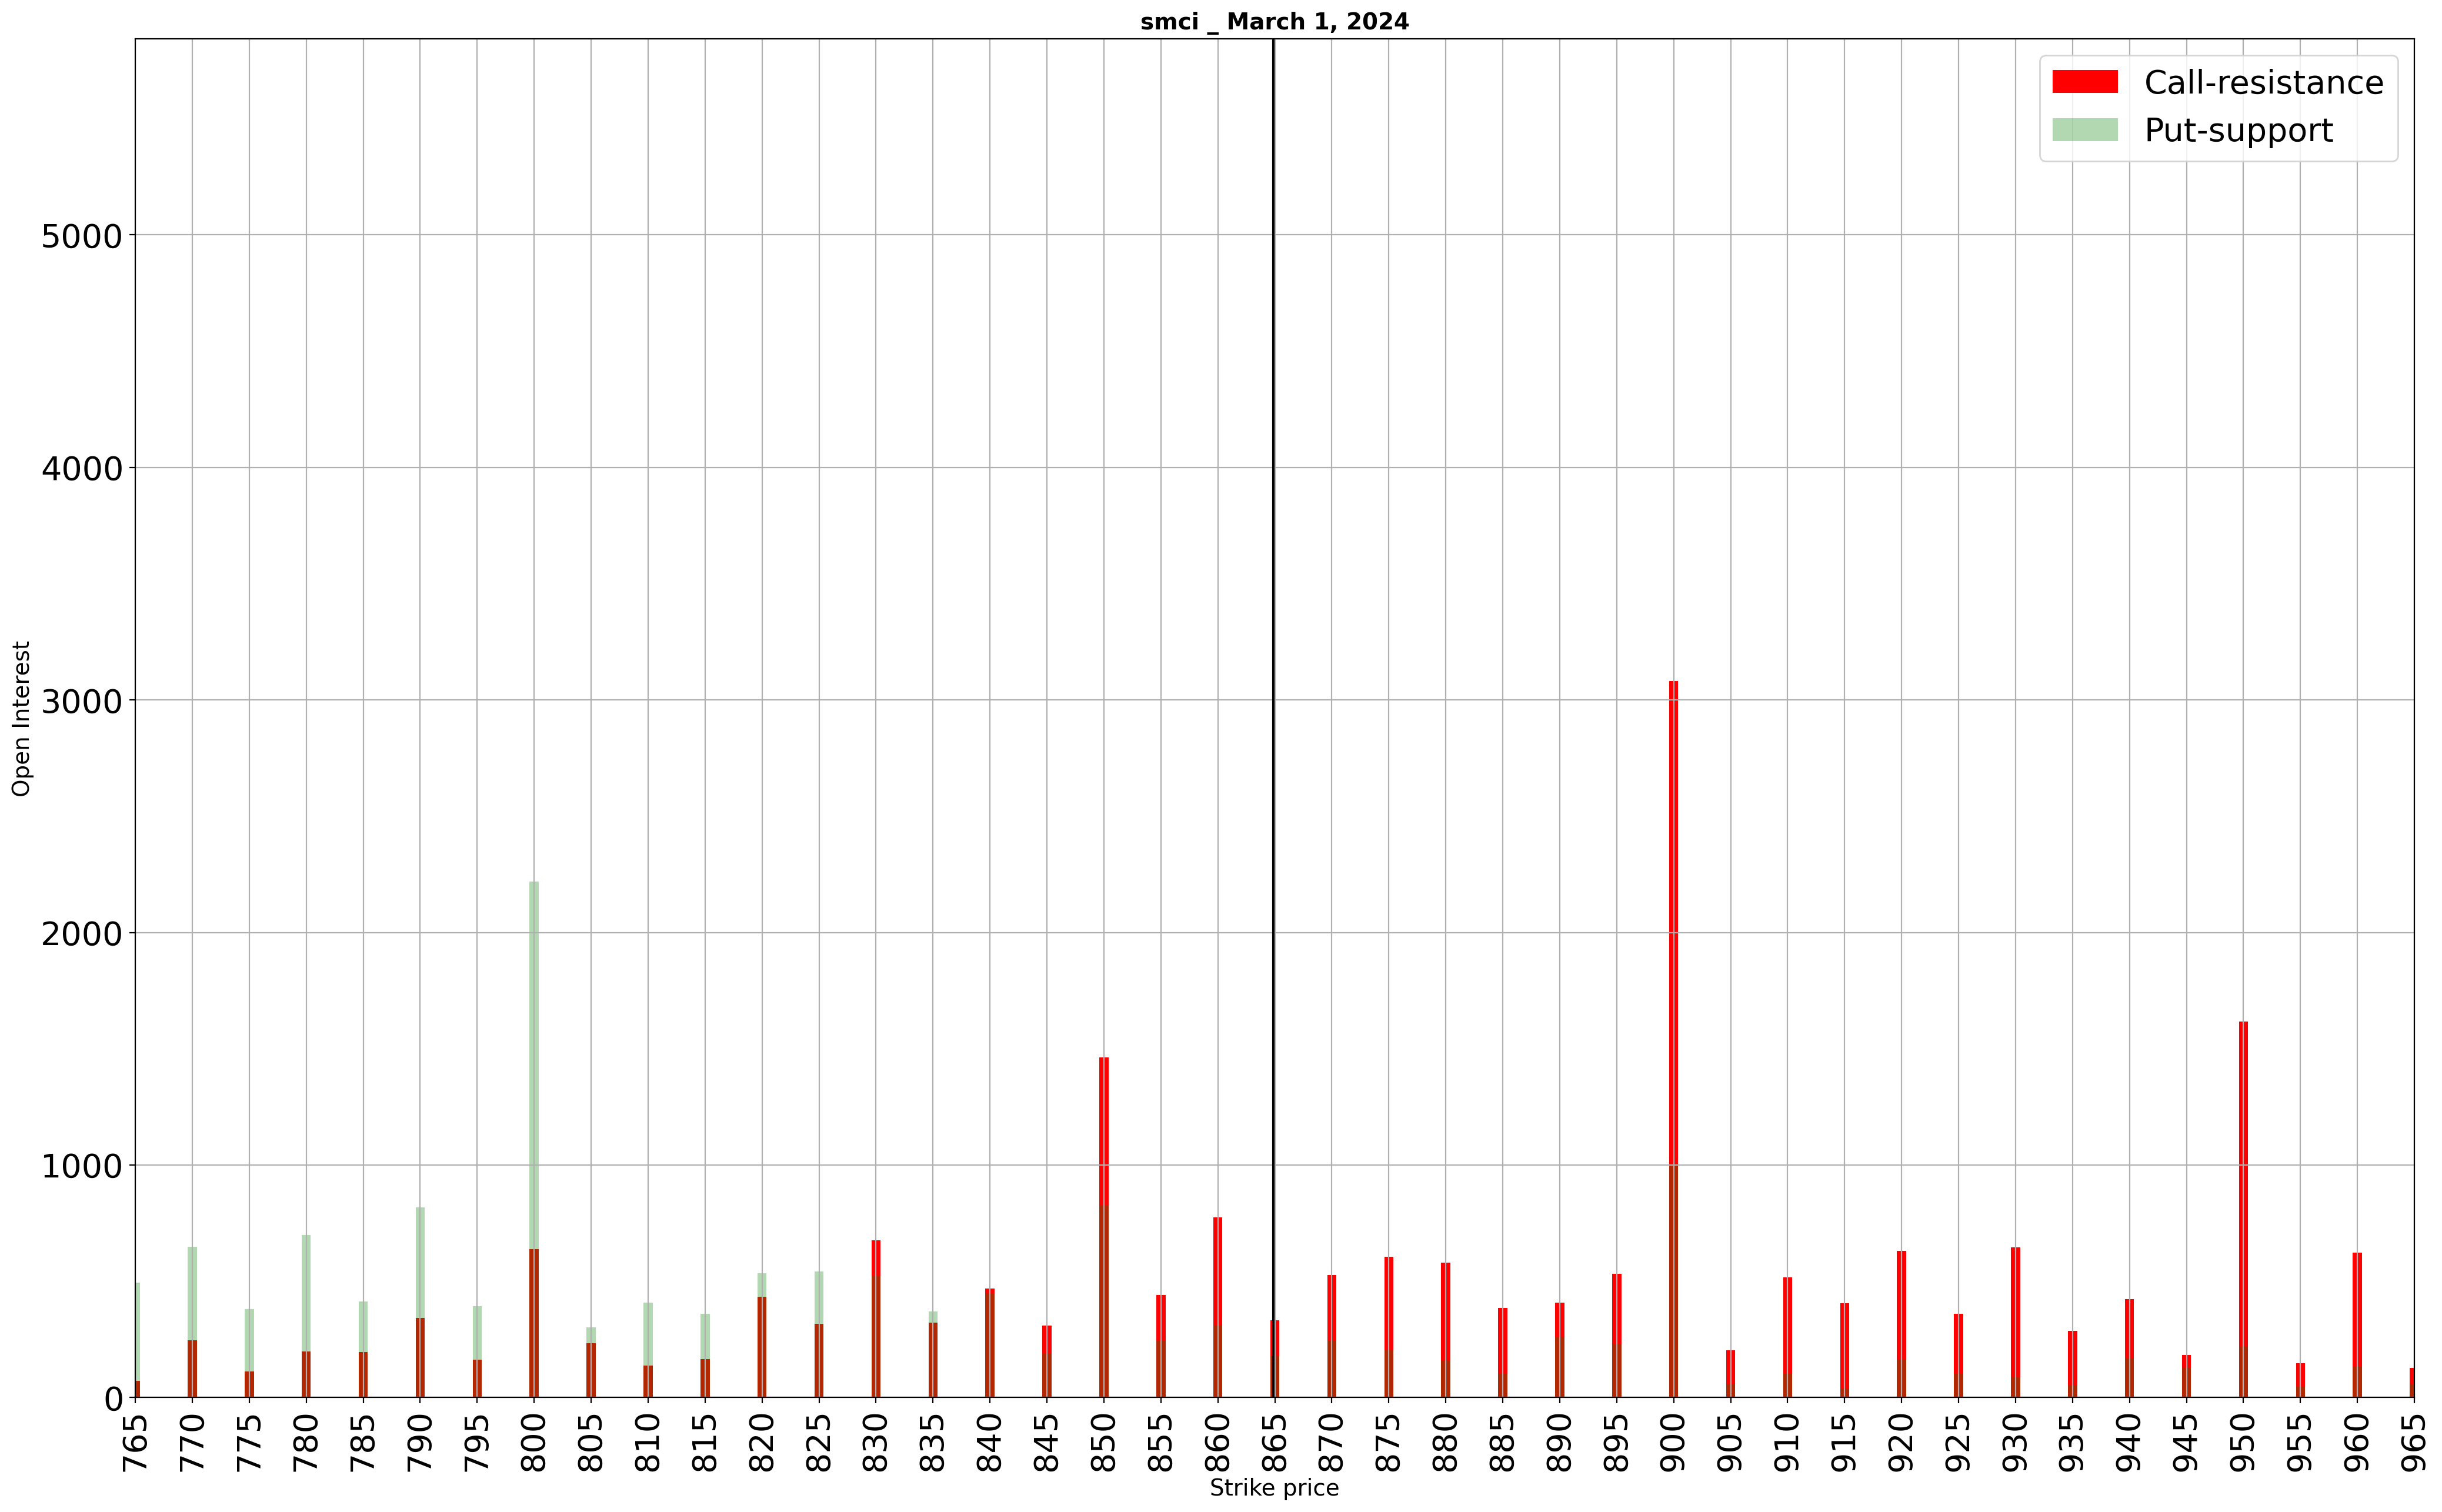

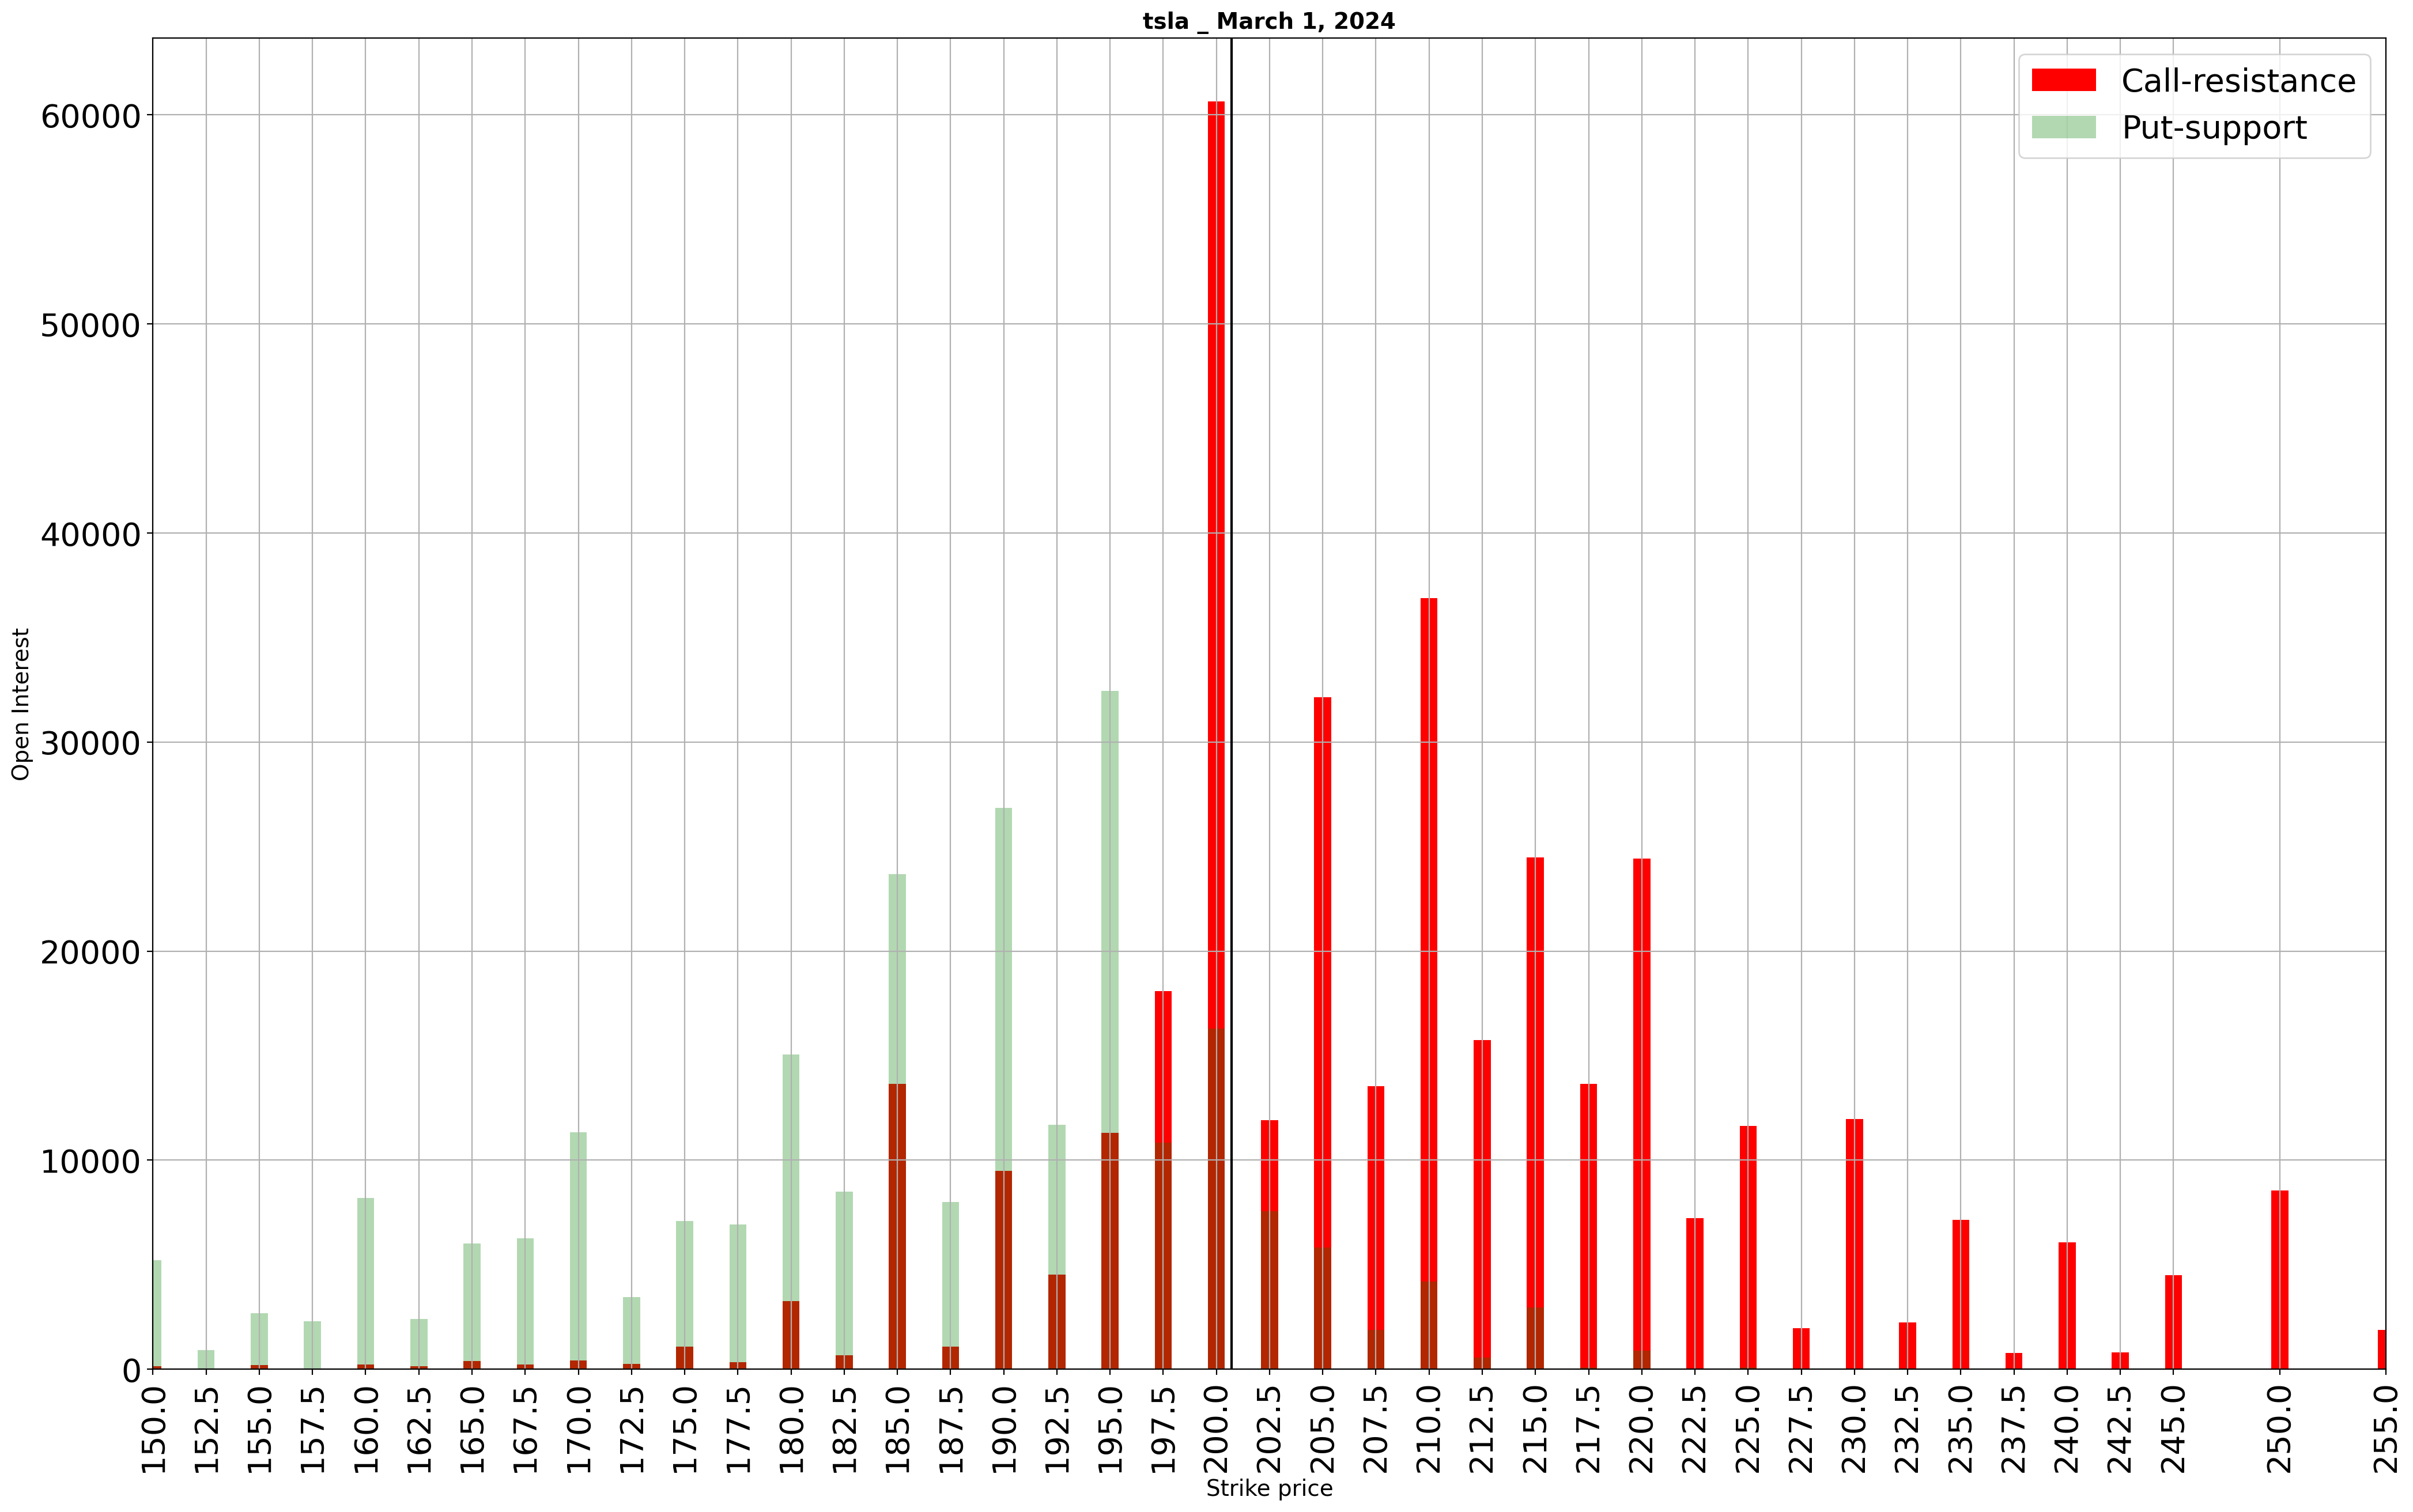

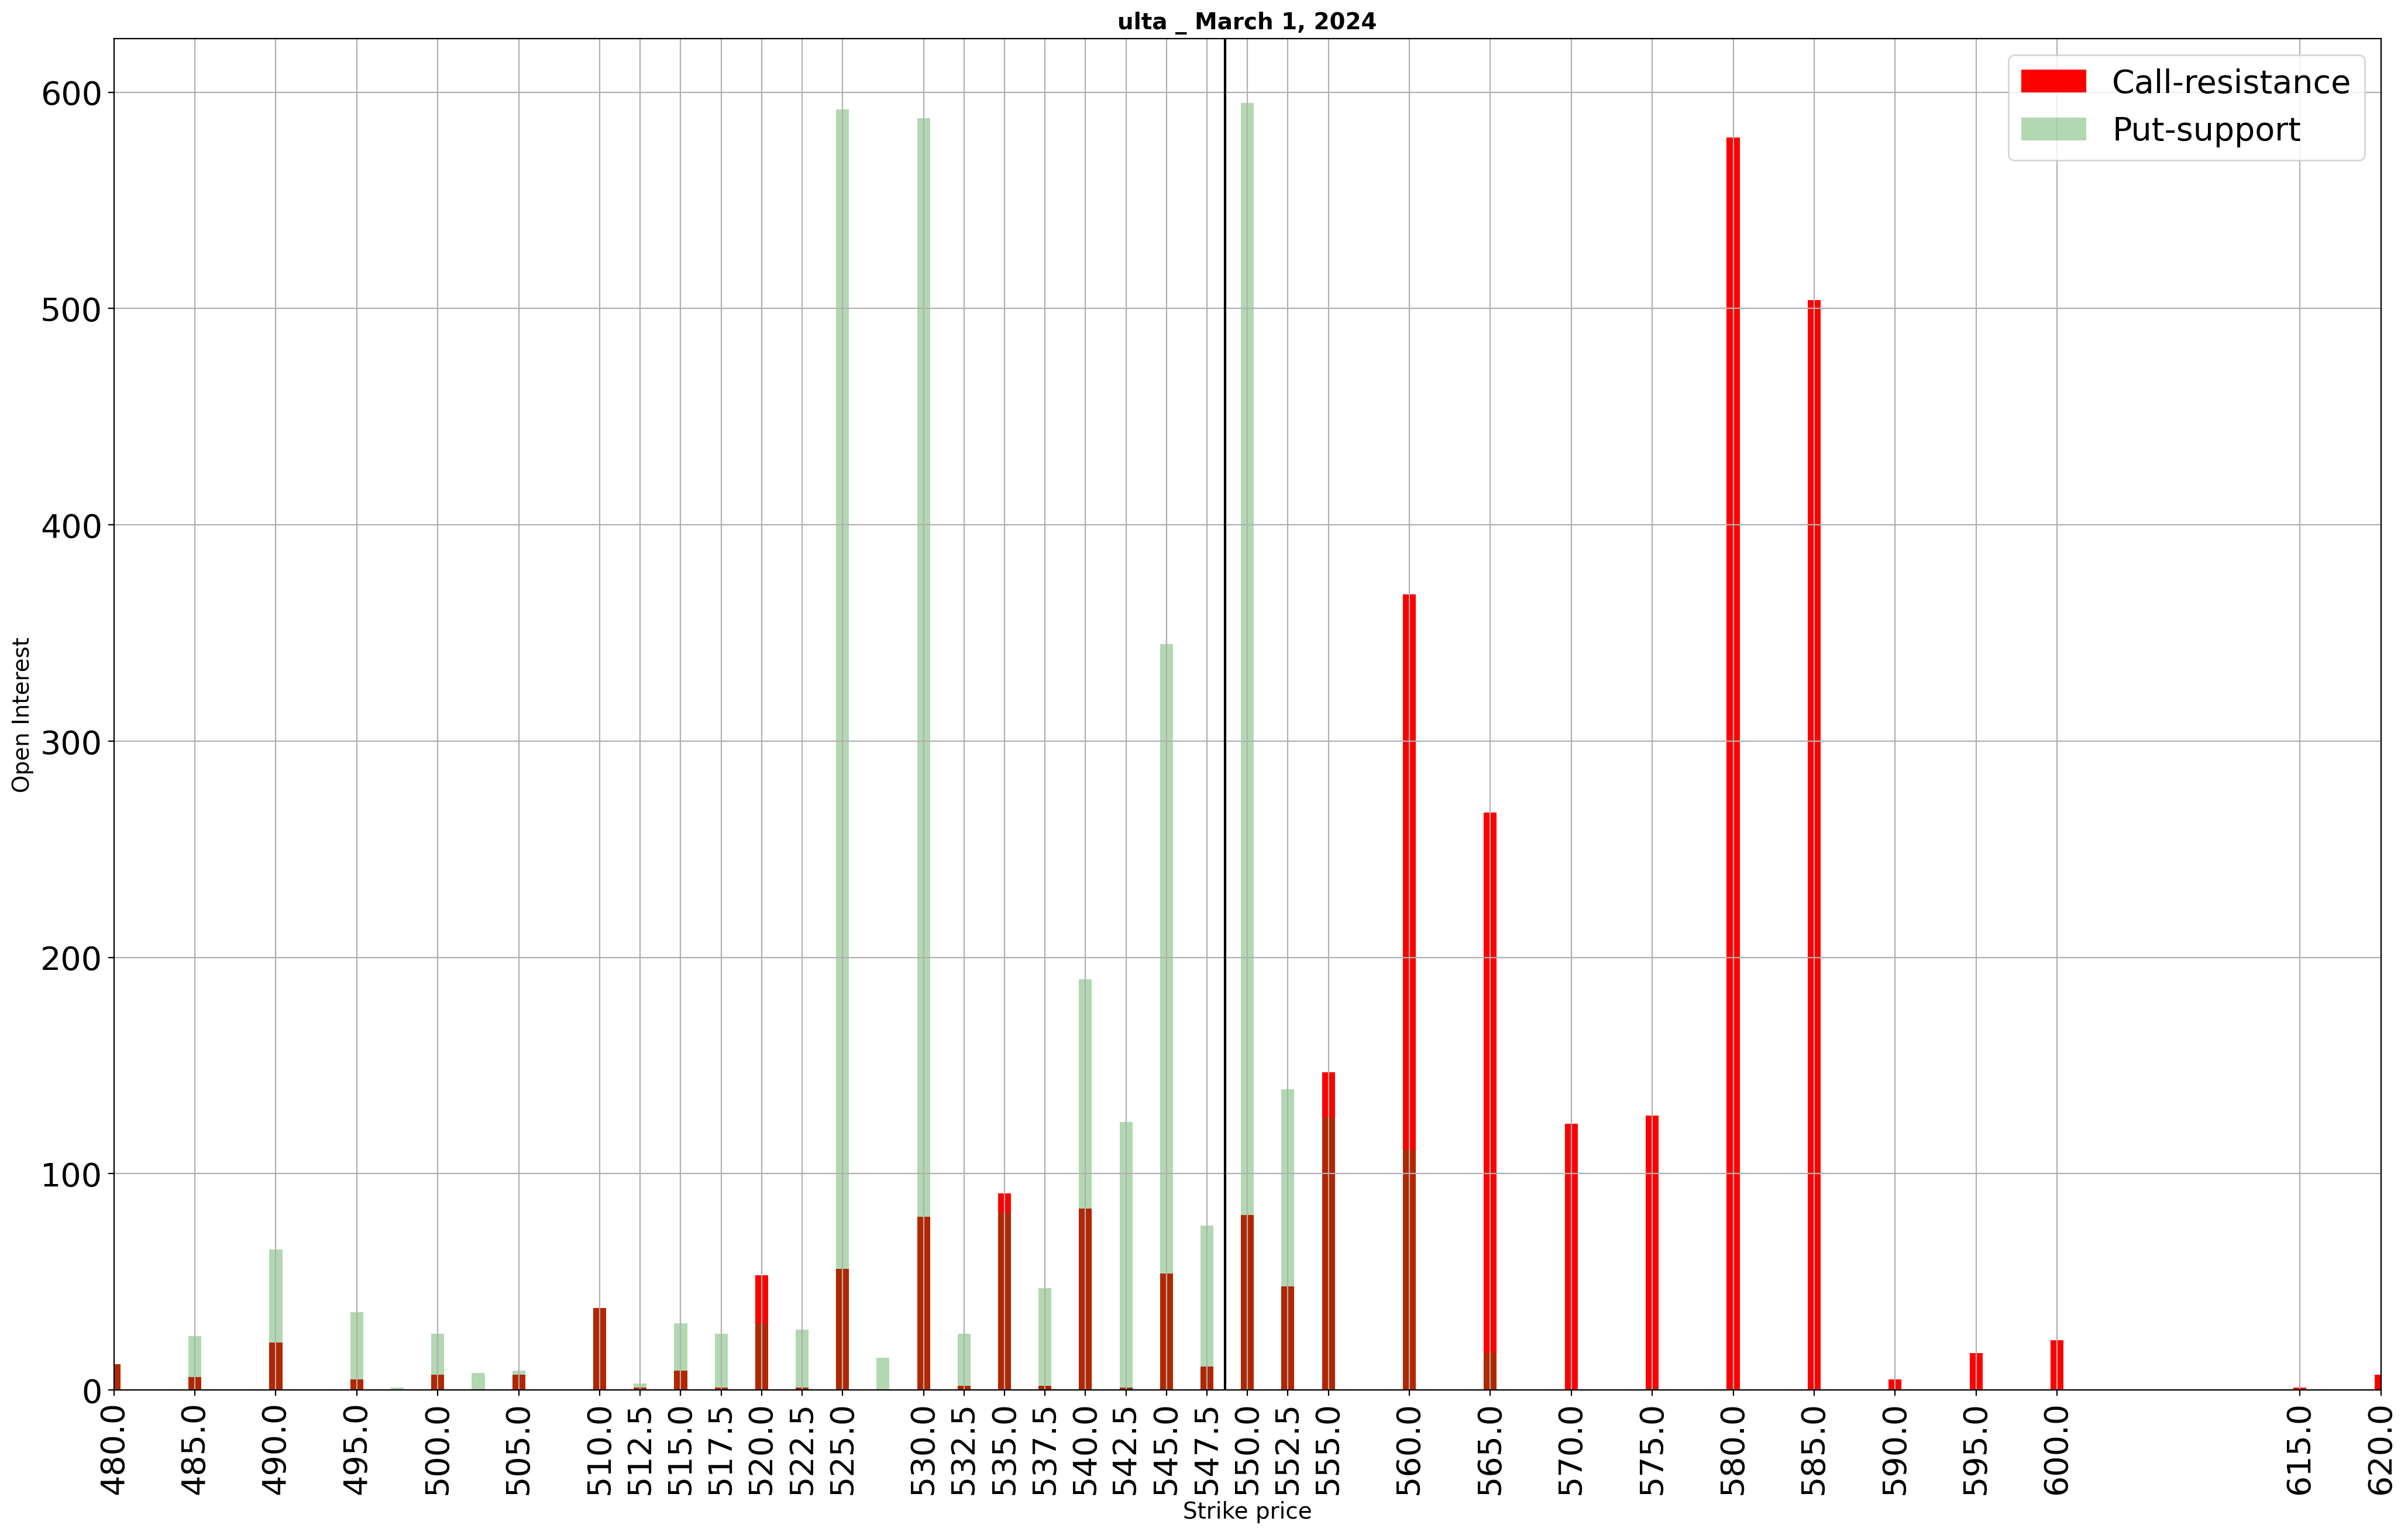

In [5]:
# symbols = ['SPY', 'ASML', 'META', 'AMZN', 'BABA', 'GOOGL', 'NXPI']
symbols= ['acmr', 'adbe','alb', 'AMD', 'ARM', 'AVGO', 'crwd', 'etsy', 'fslr', 'FTNT', 'googl', 'intc', 'meta', 'nflx', 'nvda', 'panw', 'pltr', 
          'plug', 'pypl', 'qcom', 'sofi', 'smci', 'tsla', 'ulta']

#symbols = ['nvda']
for symbol in symbols:
    df = options.get_options_chain(symbol)
    dates = options.get_expiration_dates(symbol)
    date = dates[0]
    cmp = si.get_live_price(symbol)

    #opt = df.option_chain(date)

    plt.figure(figsize=(25, 15), dpi=200)

    diff = 20
    i = np.abs(df['calls']['Strike'] - cmp).idxmin()
    size_ = df['calls']['Strike'].size

    if i + diff >= size_:
        b = size_ - 1
    else:
        b = i + diff

    if i - diff <= 0:
        a = 0
    else:
        a = i - diff

    plt.xticks(df['calls']['Strike'], fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    plt.xlim(df['calls']['Strike'][a], df['calls']['Strike'][b])
    plt.axvline(x=cmp, color='black')

    # Create the first y-axis for Open Interest
    plt.bar(df['calls']['Strike'], df['calls']['Open Interest'], label='Call-resistance', color='red')
    plt.bar(df['puts']['Strike'], df['puts']['Open Interest'], label='Put-support', alpha=0.3, color='green')
    
    #plt.plot(df['calls']['Strike'], df['calls']['Volume'], label='Call-resistance', color='red')
    #plt.plot(df['puts']['Strike'], df['puts']['Volume'], label='Put-support', alpha=0.3, color='green')
    
    plt.legend(fontsize=20, loc = 'upper left')
    
    plt.xlabel('Strike price')
    plt.ylabel('Open Interest')

    # Create the second y-axis for Volume
    #ax2 = plt.gca().twinx()
    #ax2.scatter(df['calls']['Strike'], df['calls']['Volume'], marker='o', s = 100, label='Call-resistance-v', color='b')
    #ax2.scatter(df['puts']['Strike'], df['puts']['Volume'], marker='D', s = 100, label='Put-support-v', color='k')

    plt.legend(fontsize=20)

    plt.grid(linestyle='dotted', which='minor')
    plt.grid(which='major')
    #plt.minorticks_on()

    plt.title(f'{symbol} _ {date}', weight='bold')

   
    plt.savefig(f'./{current_datetime} {symbol}.jpg')
    
    plt.show()

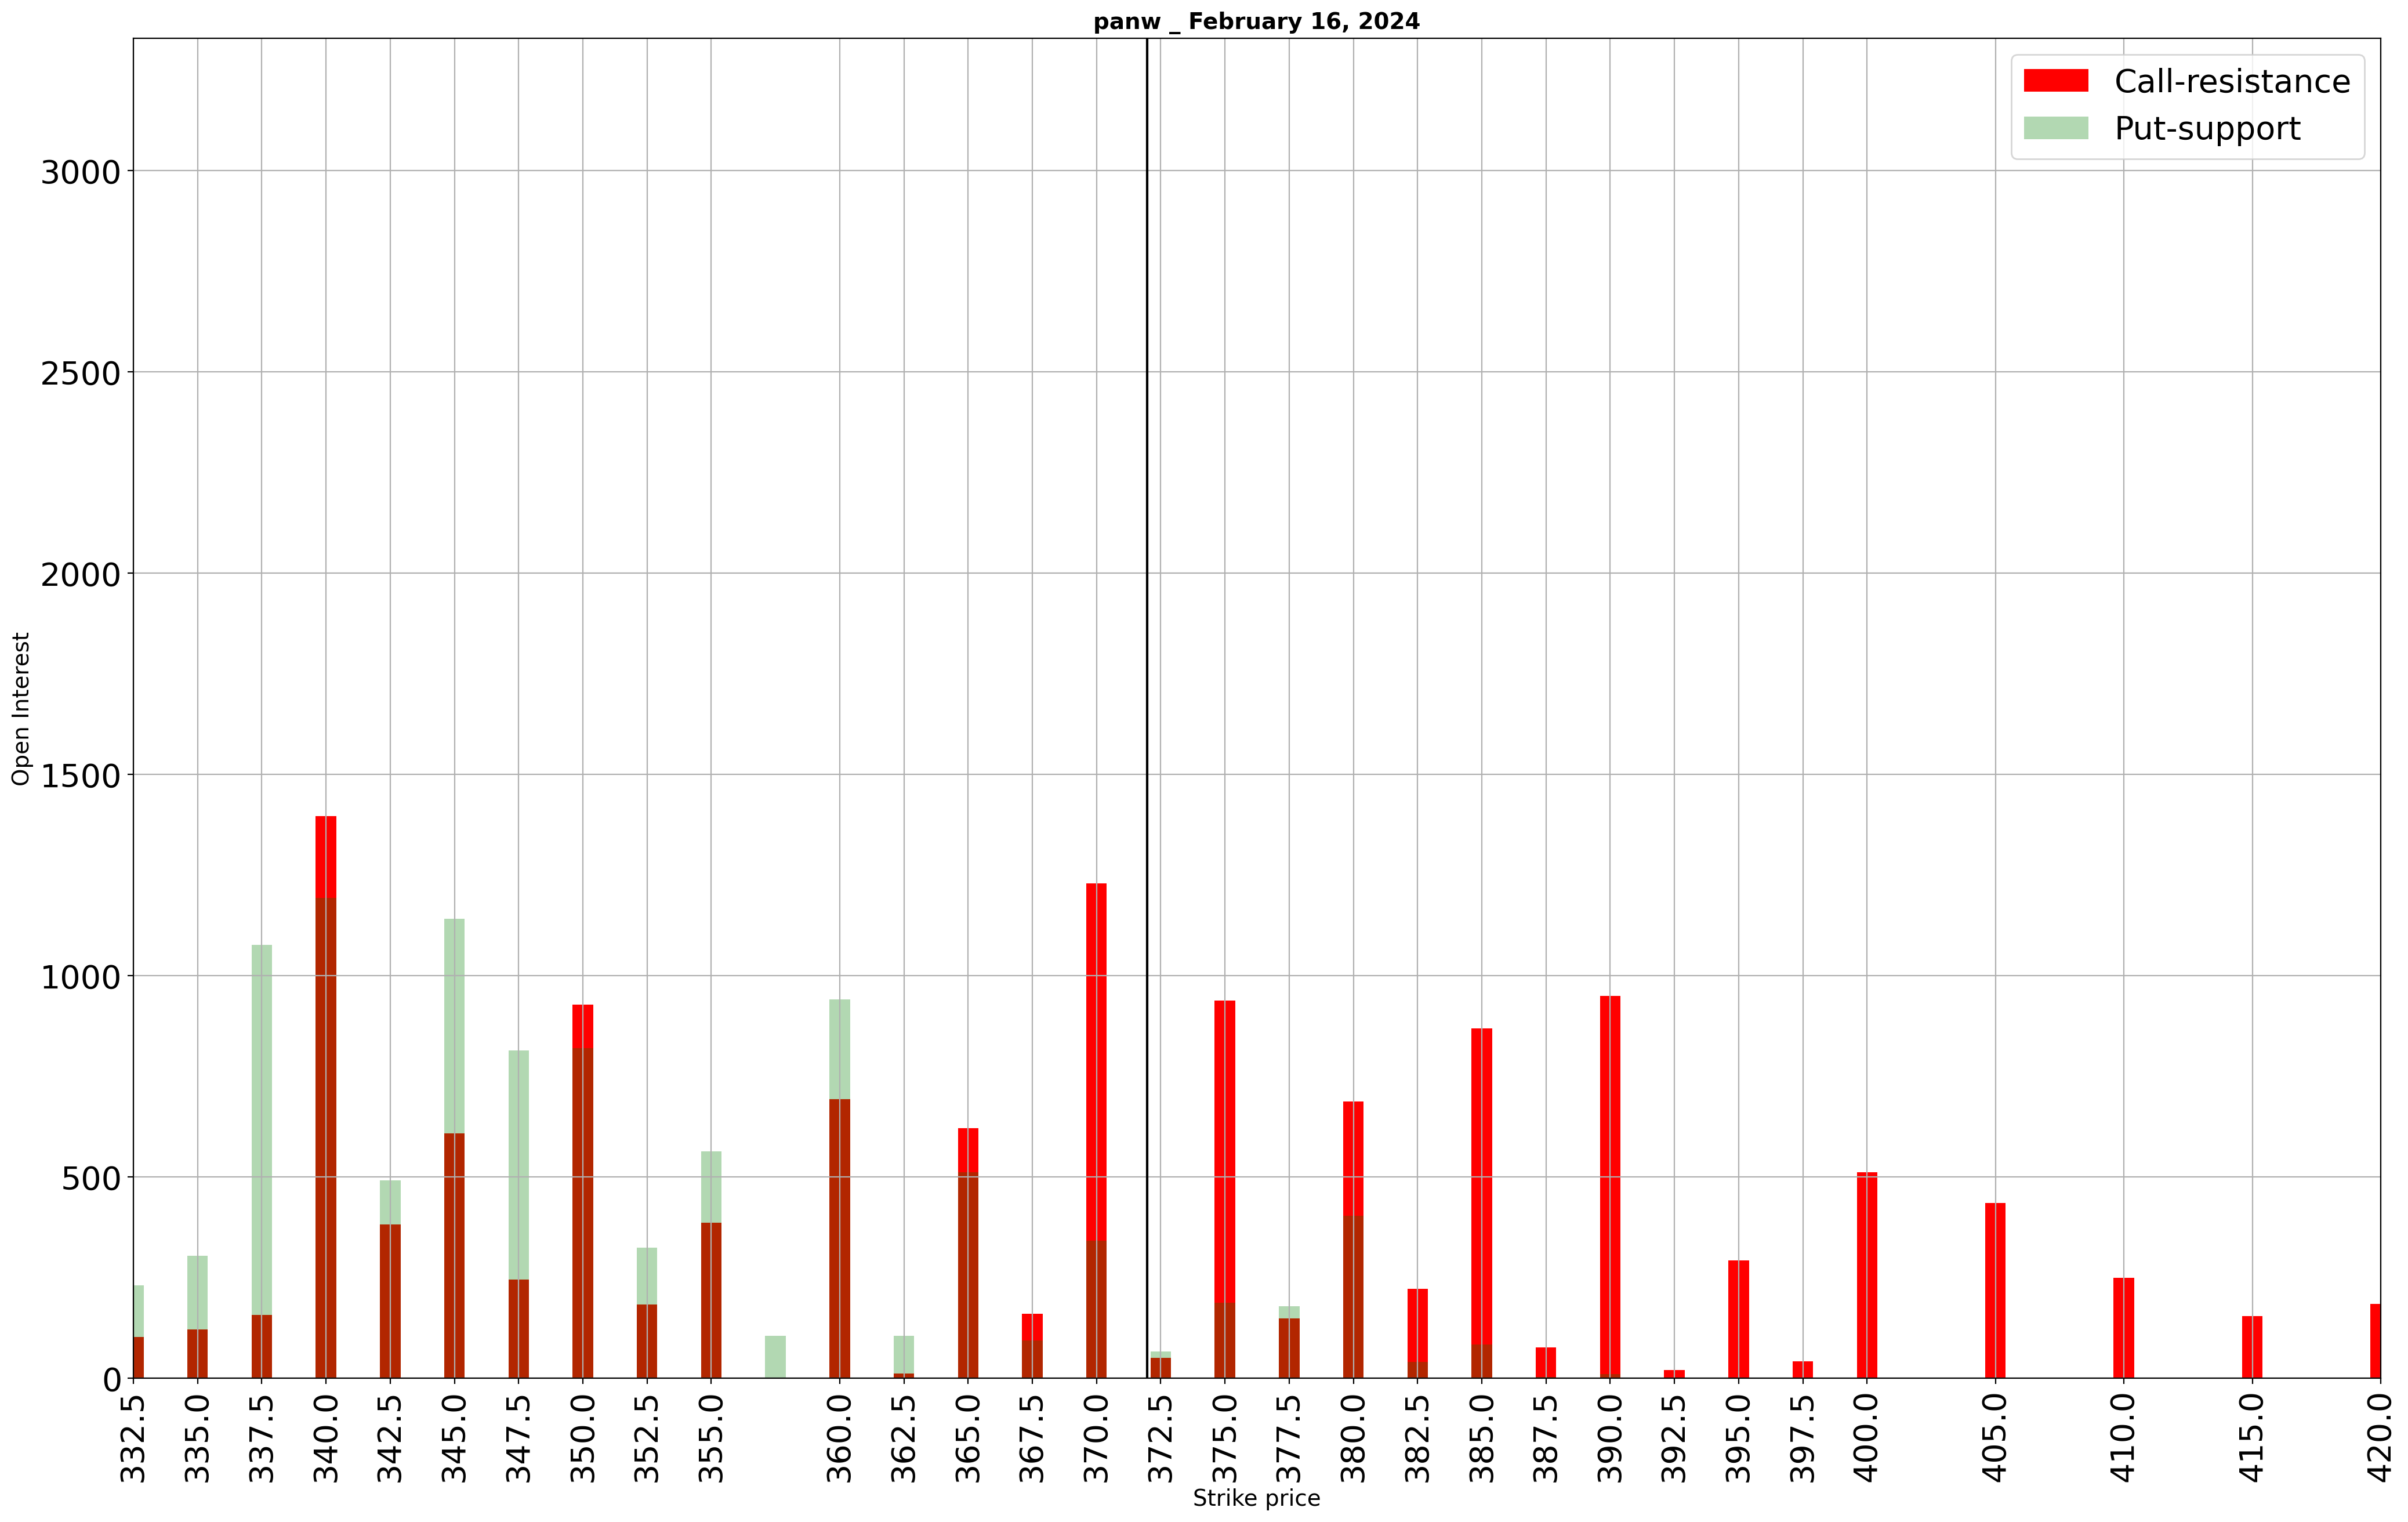

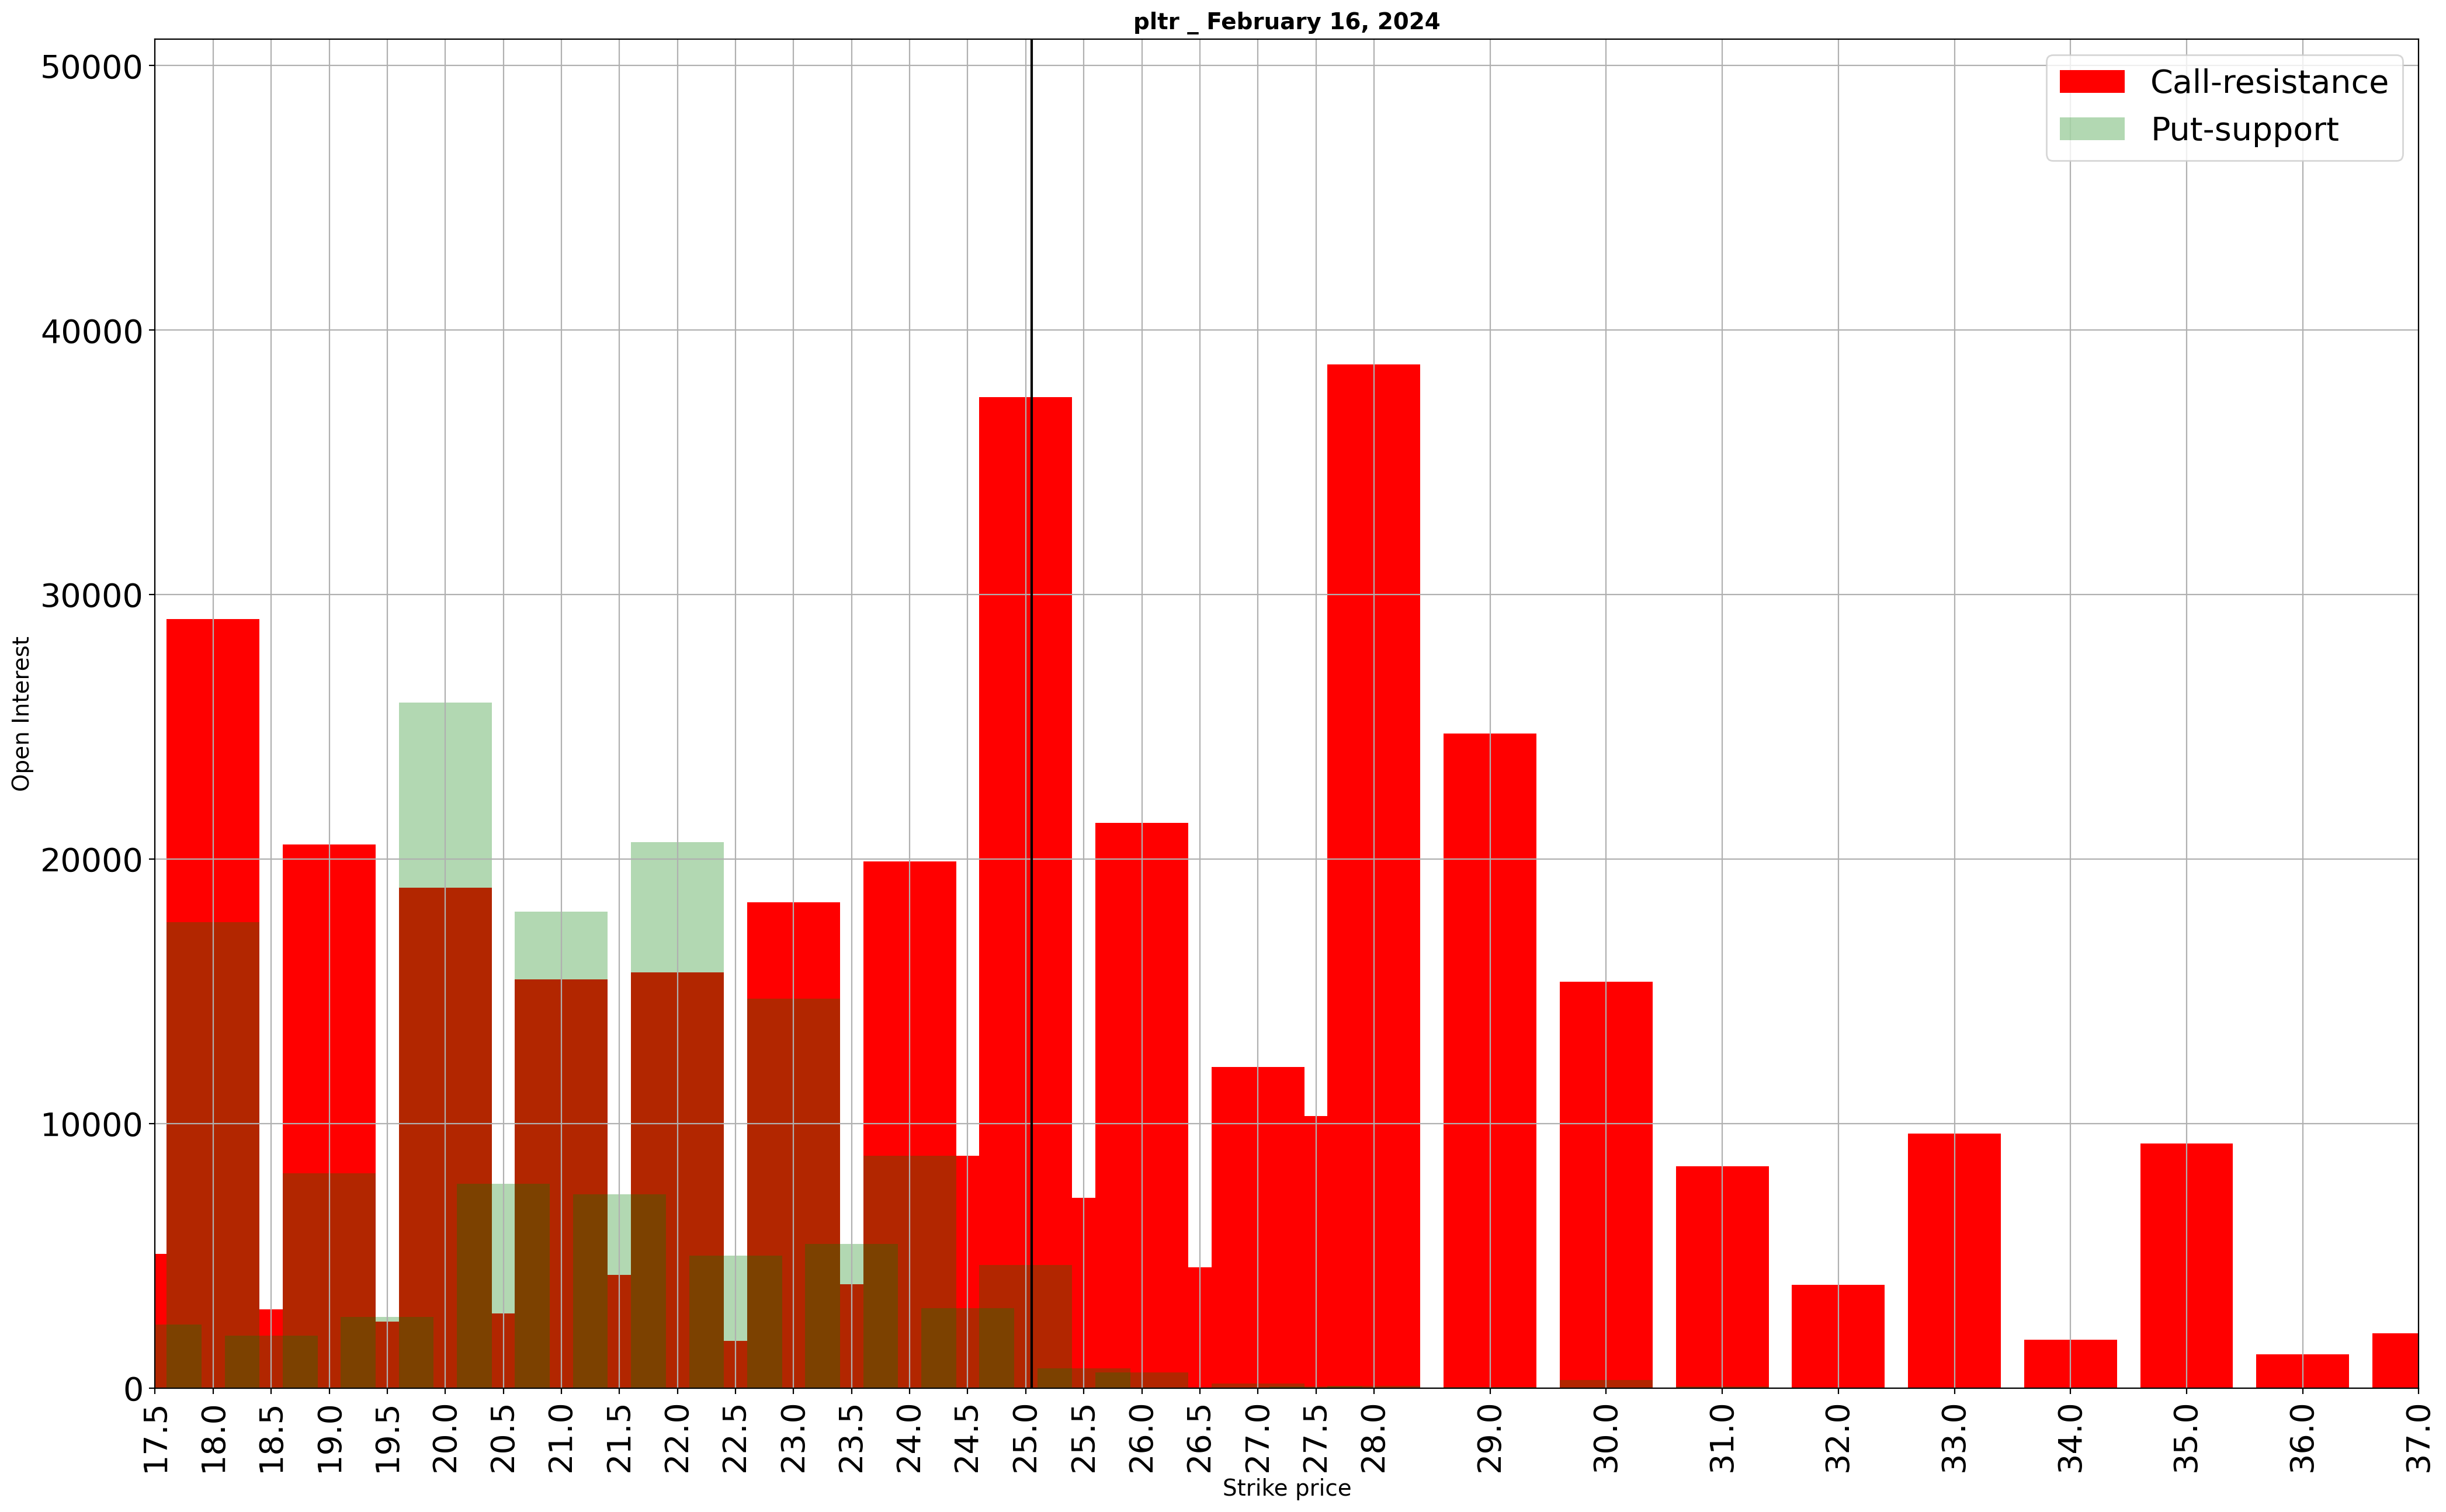

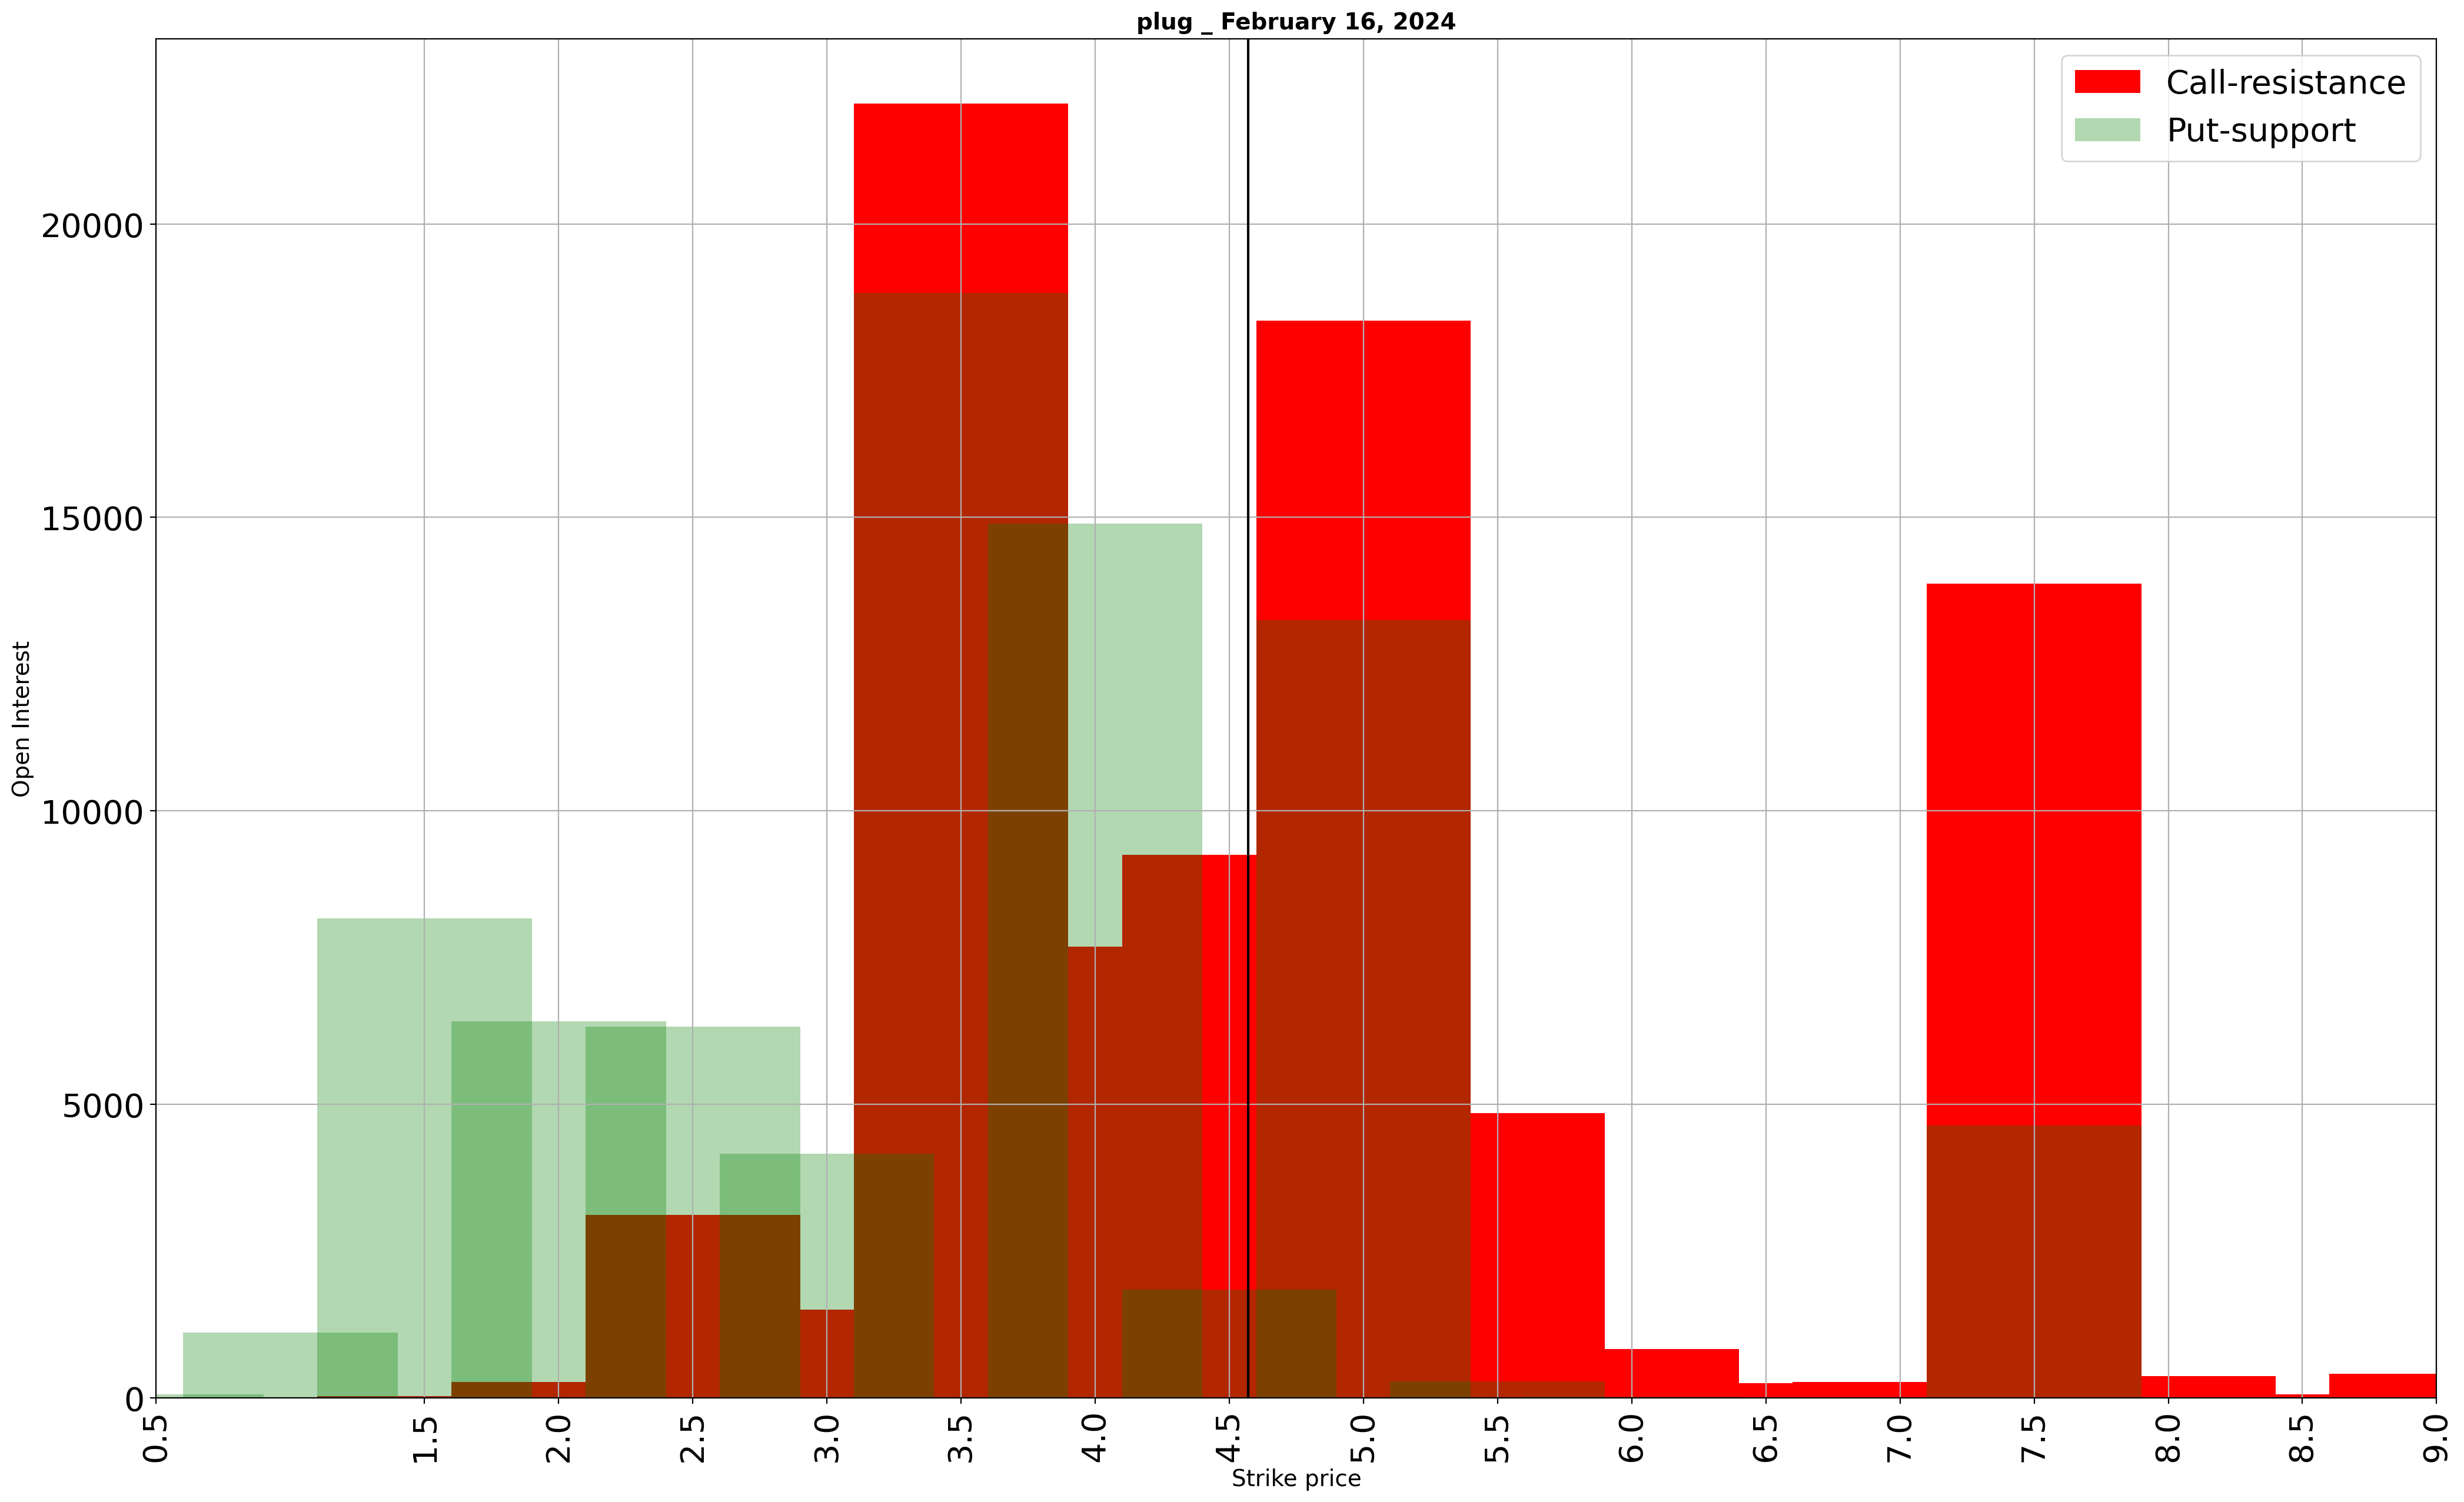

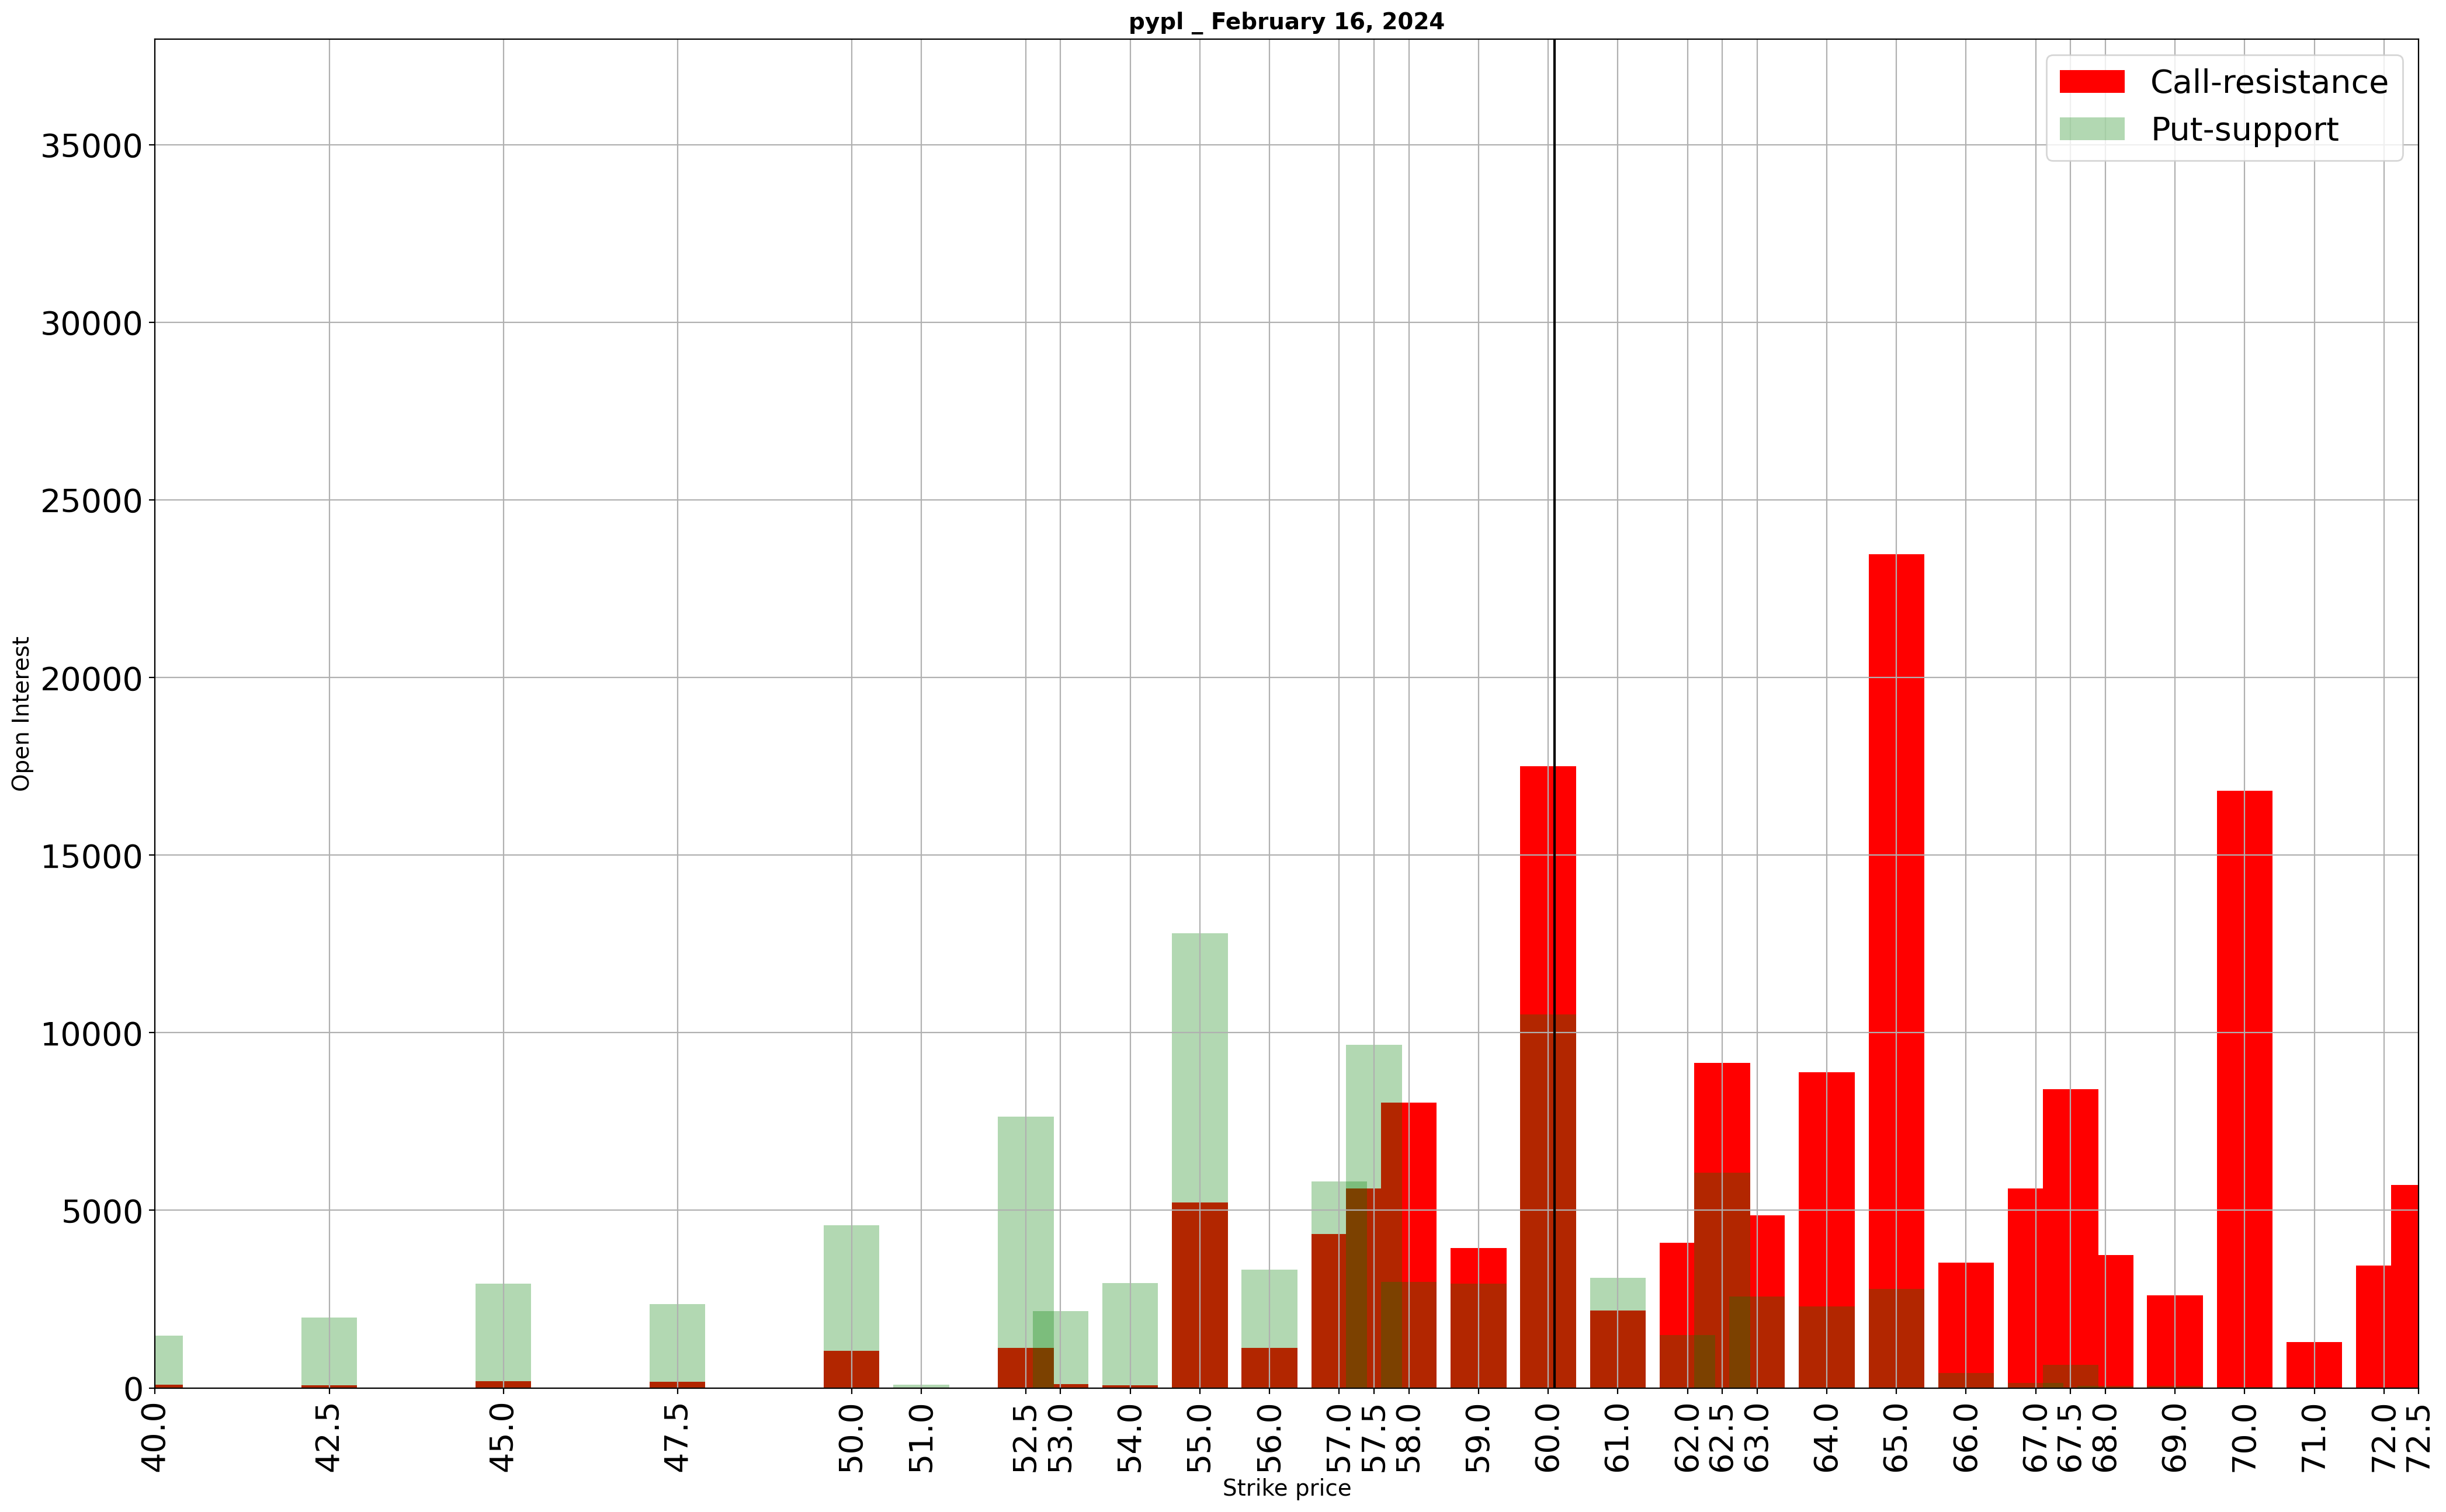

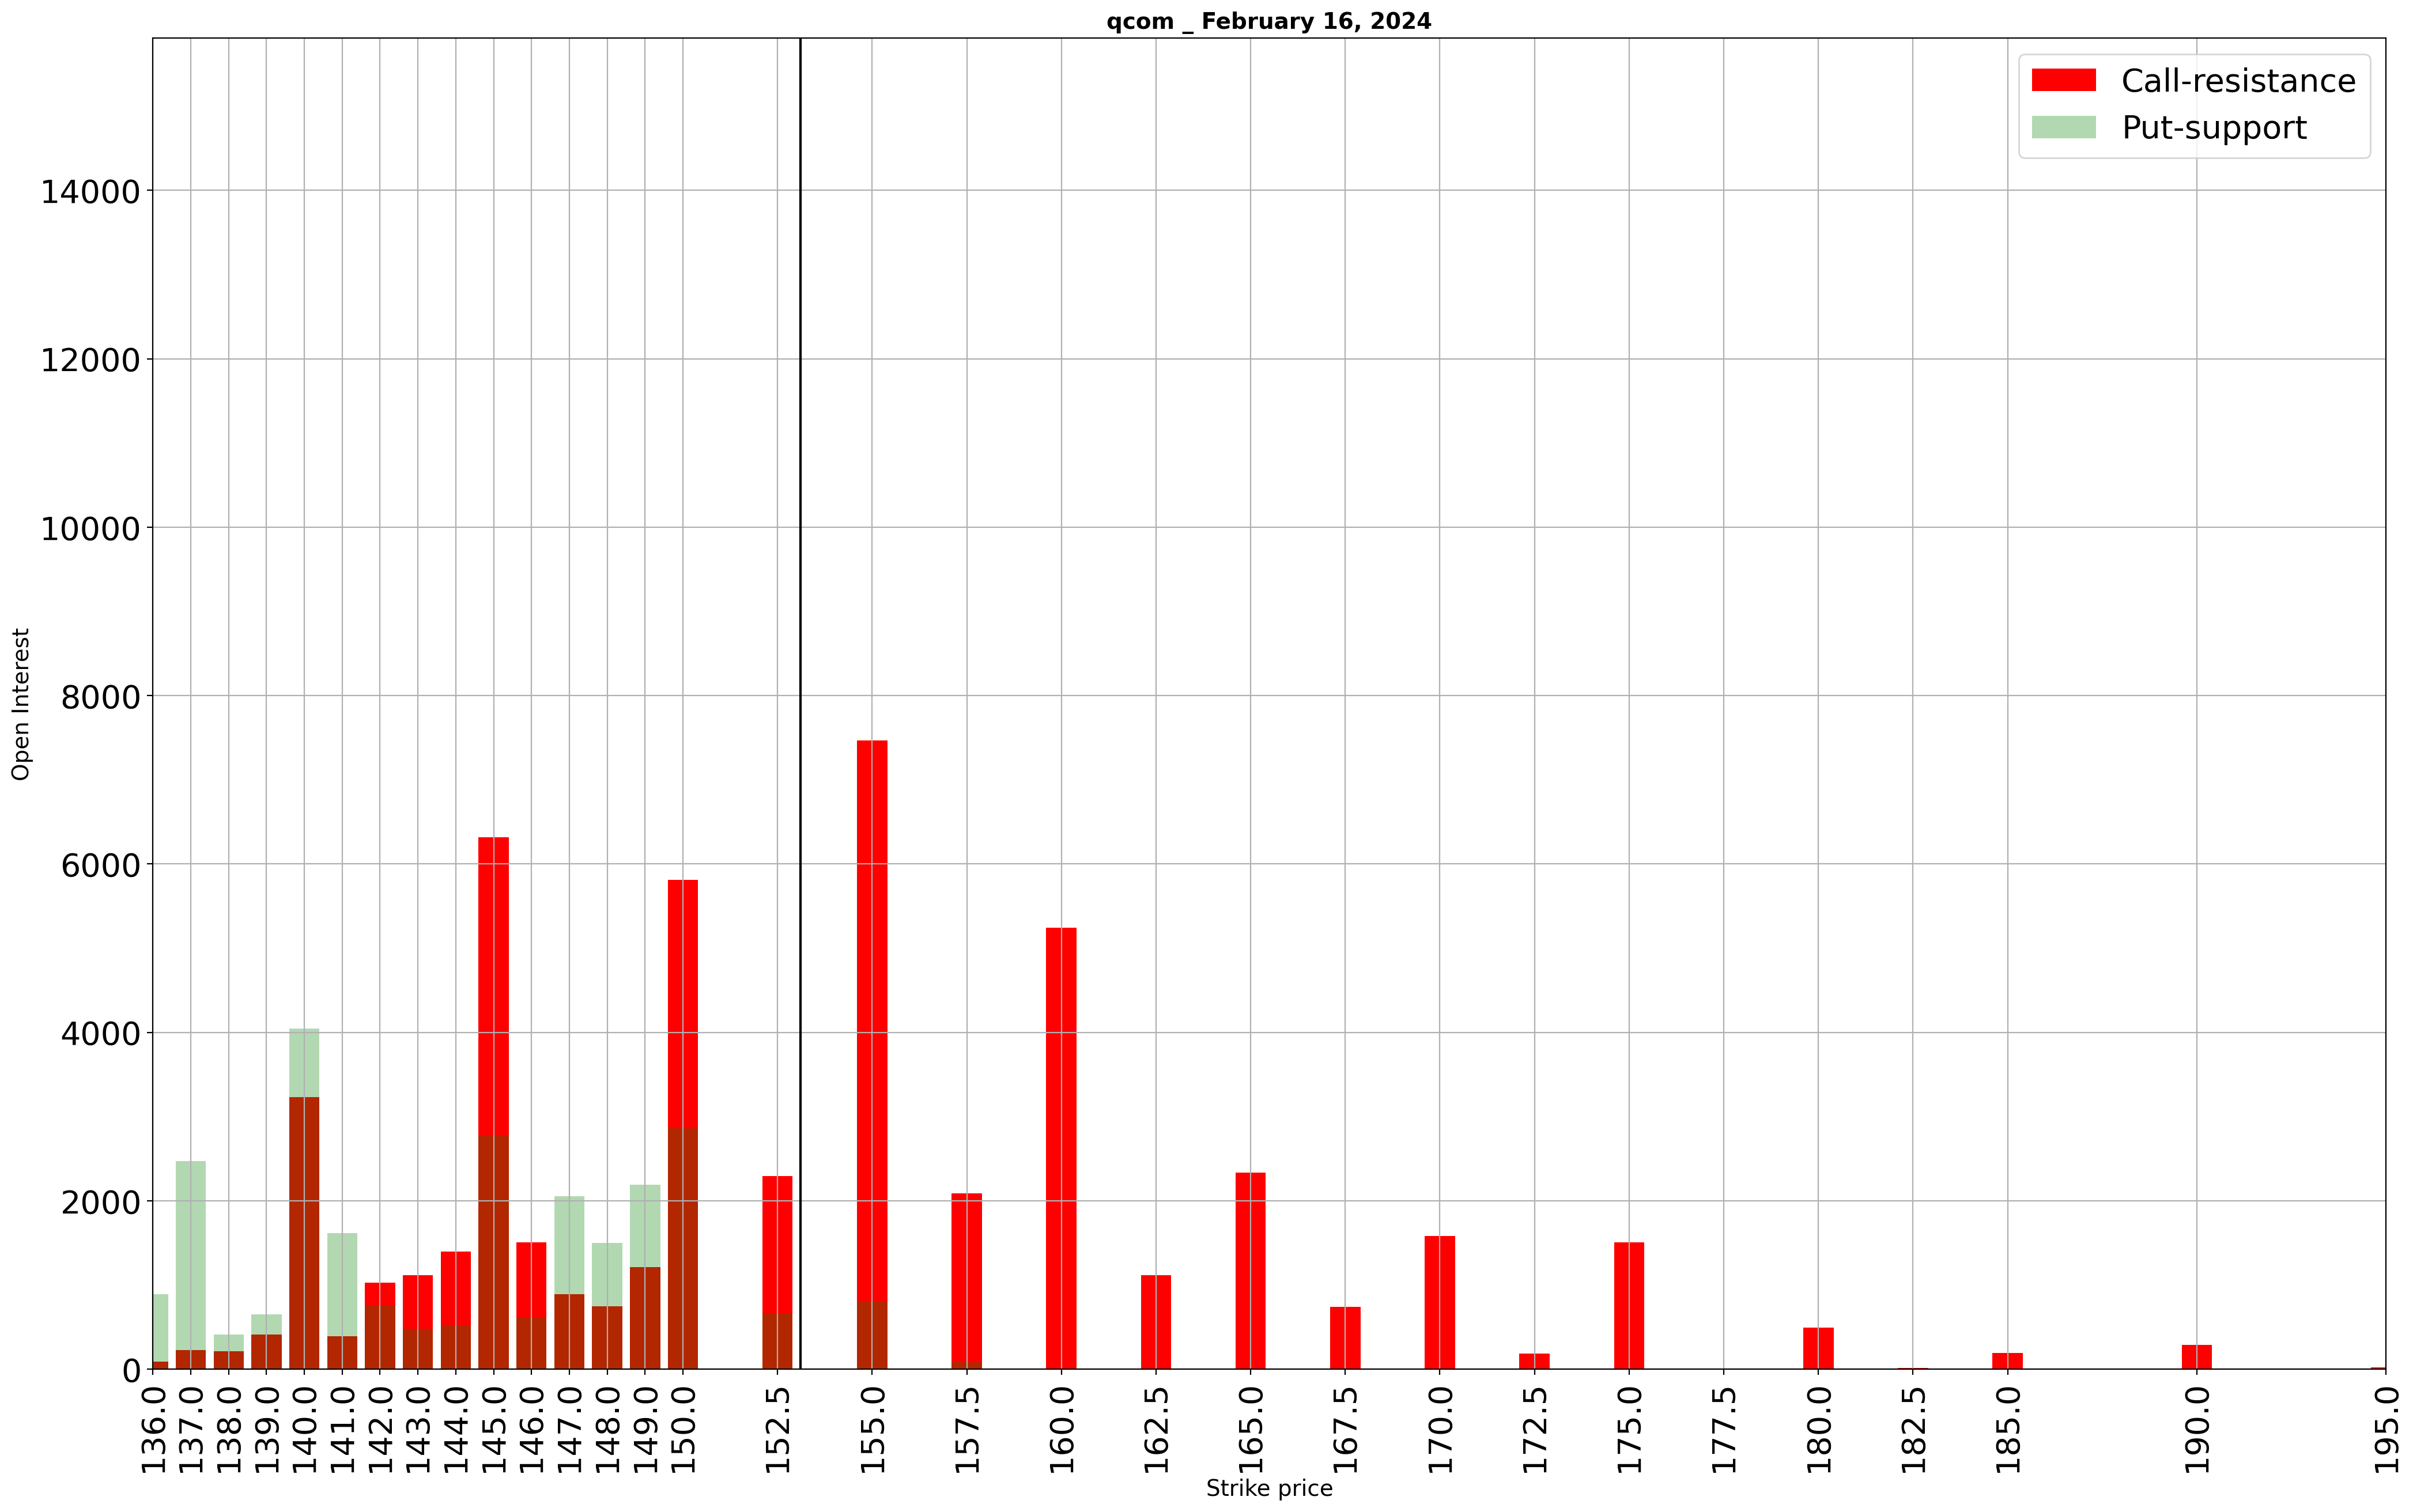

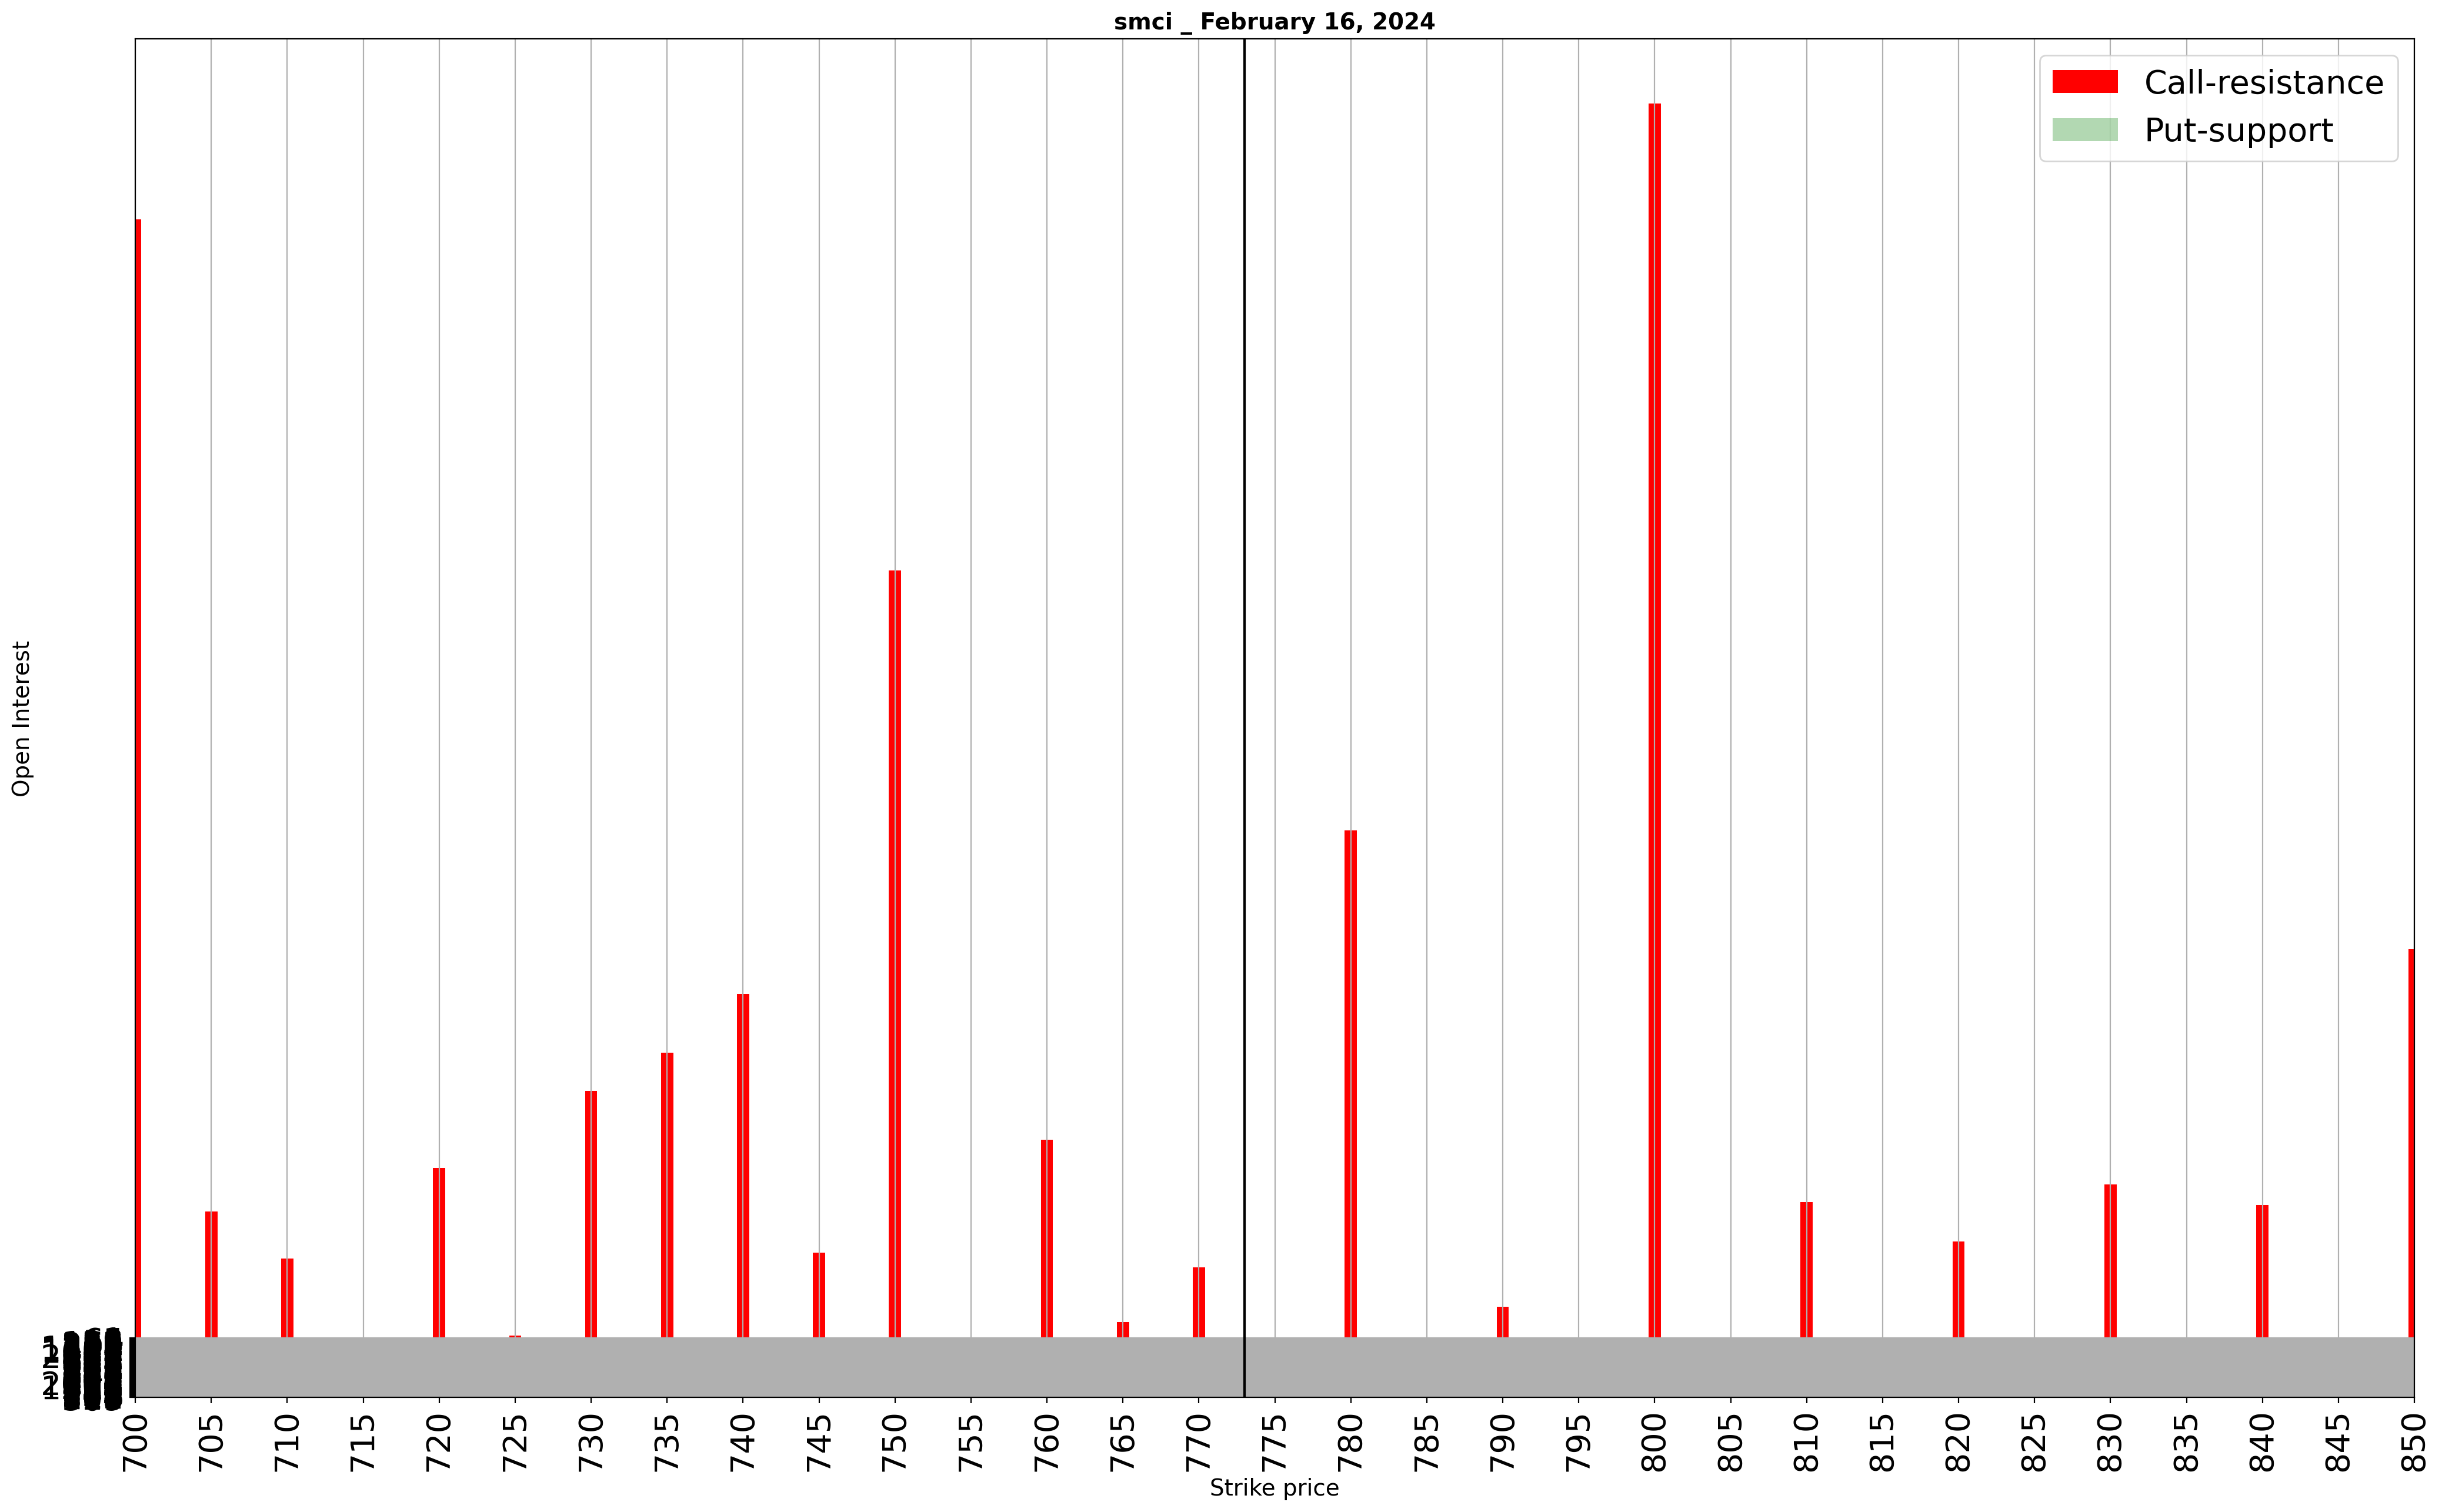

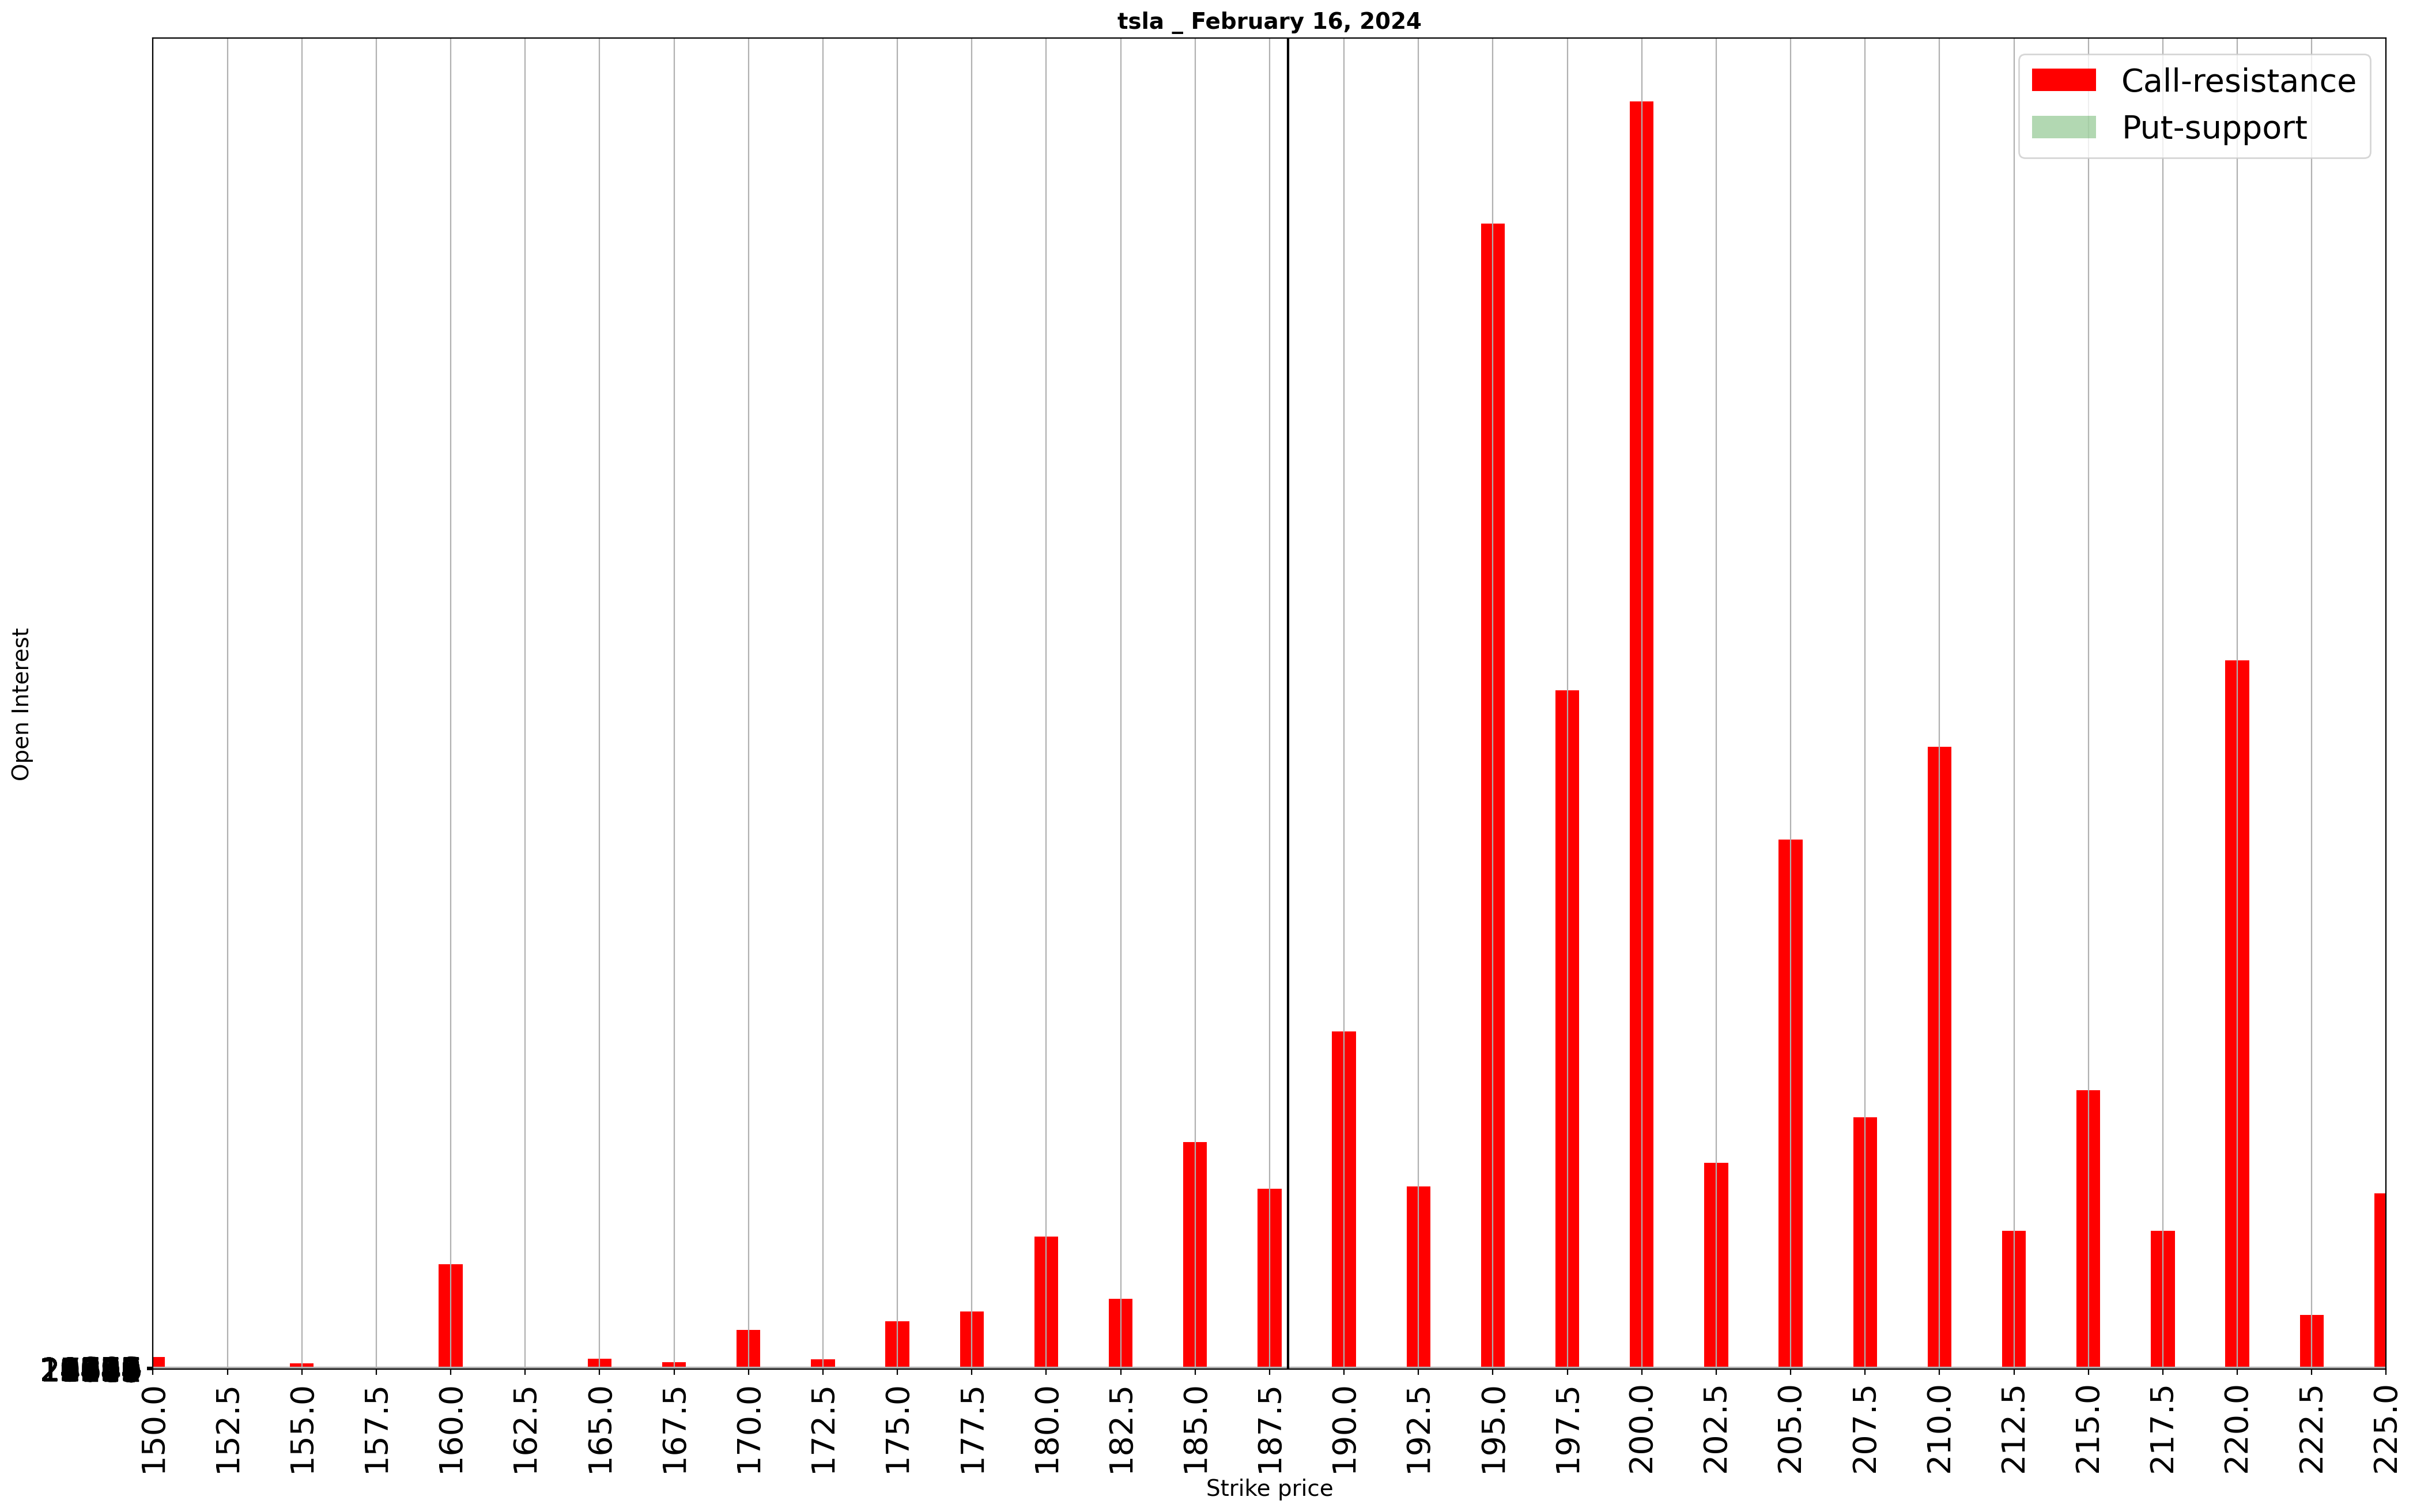

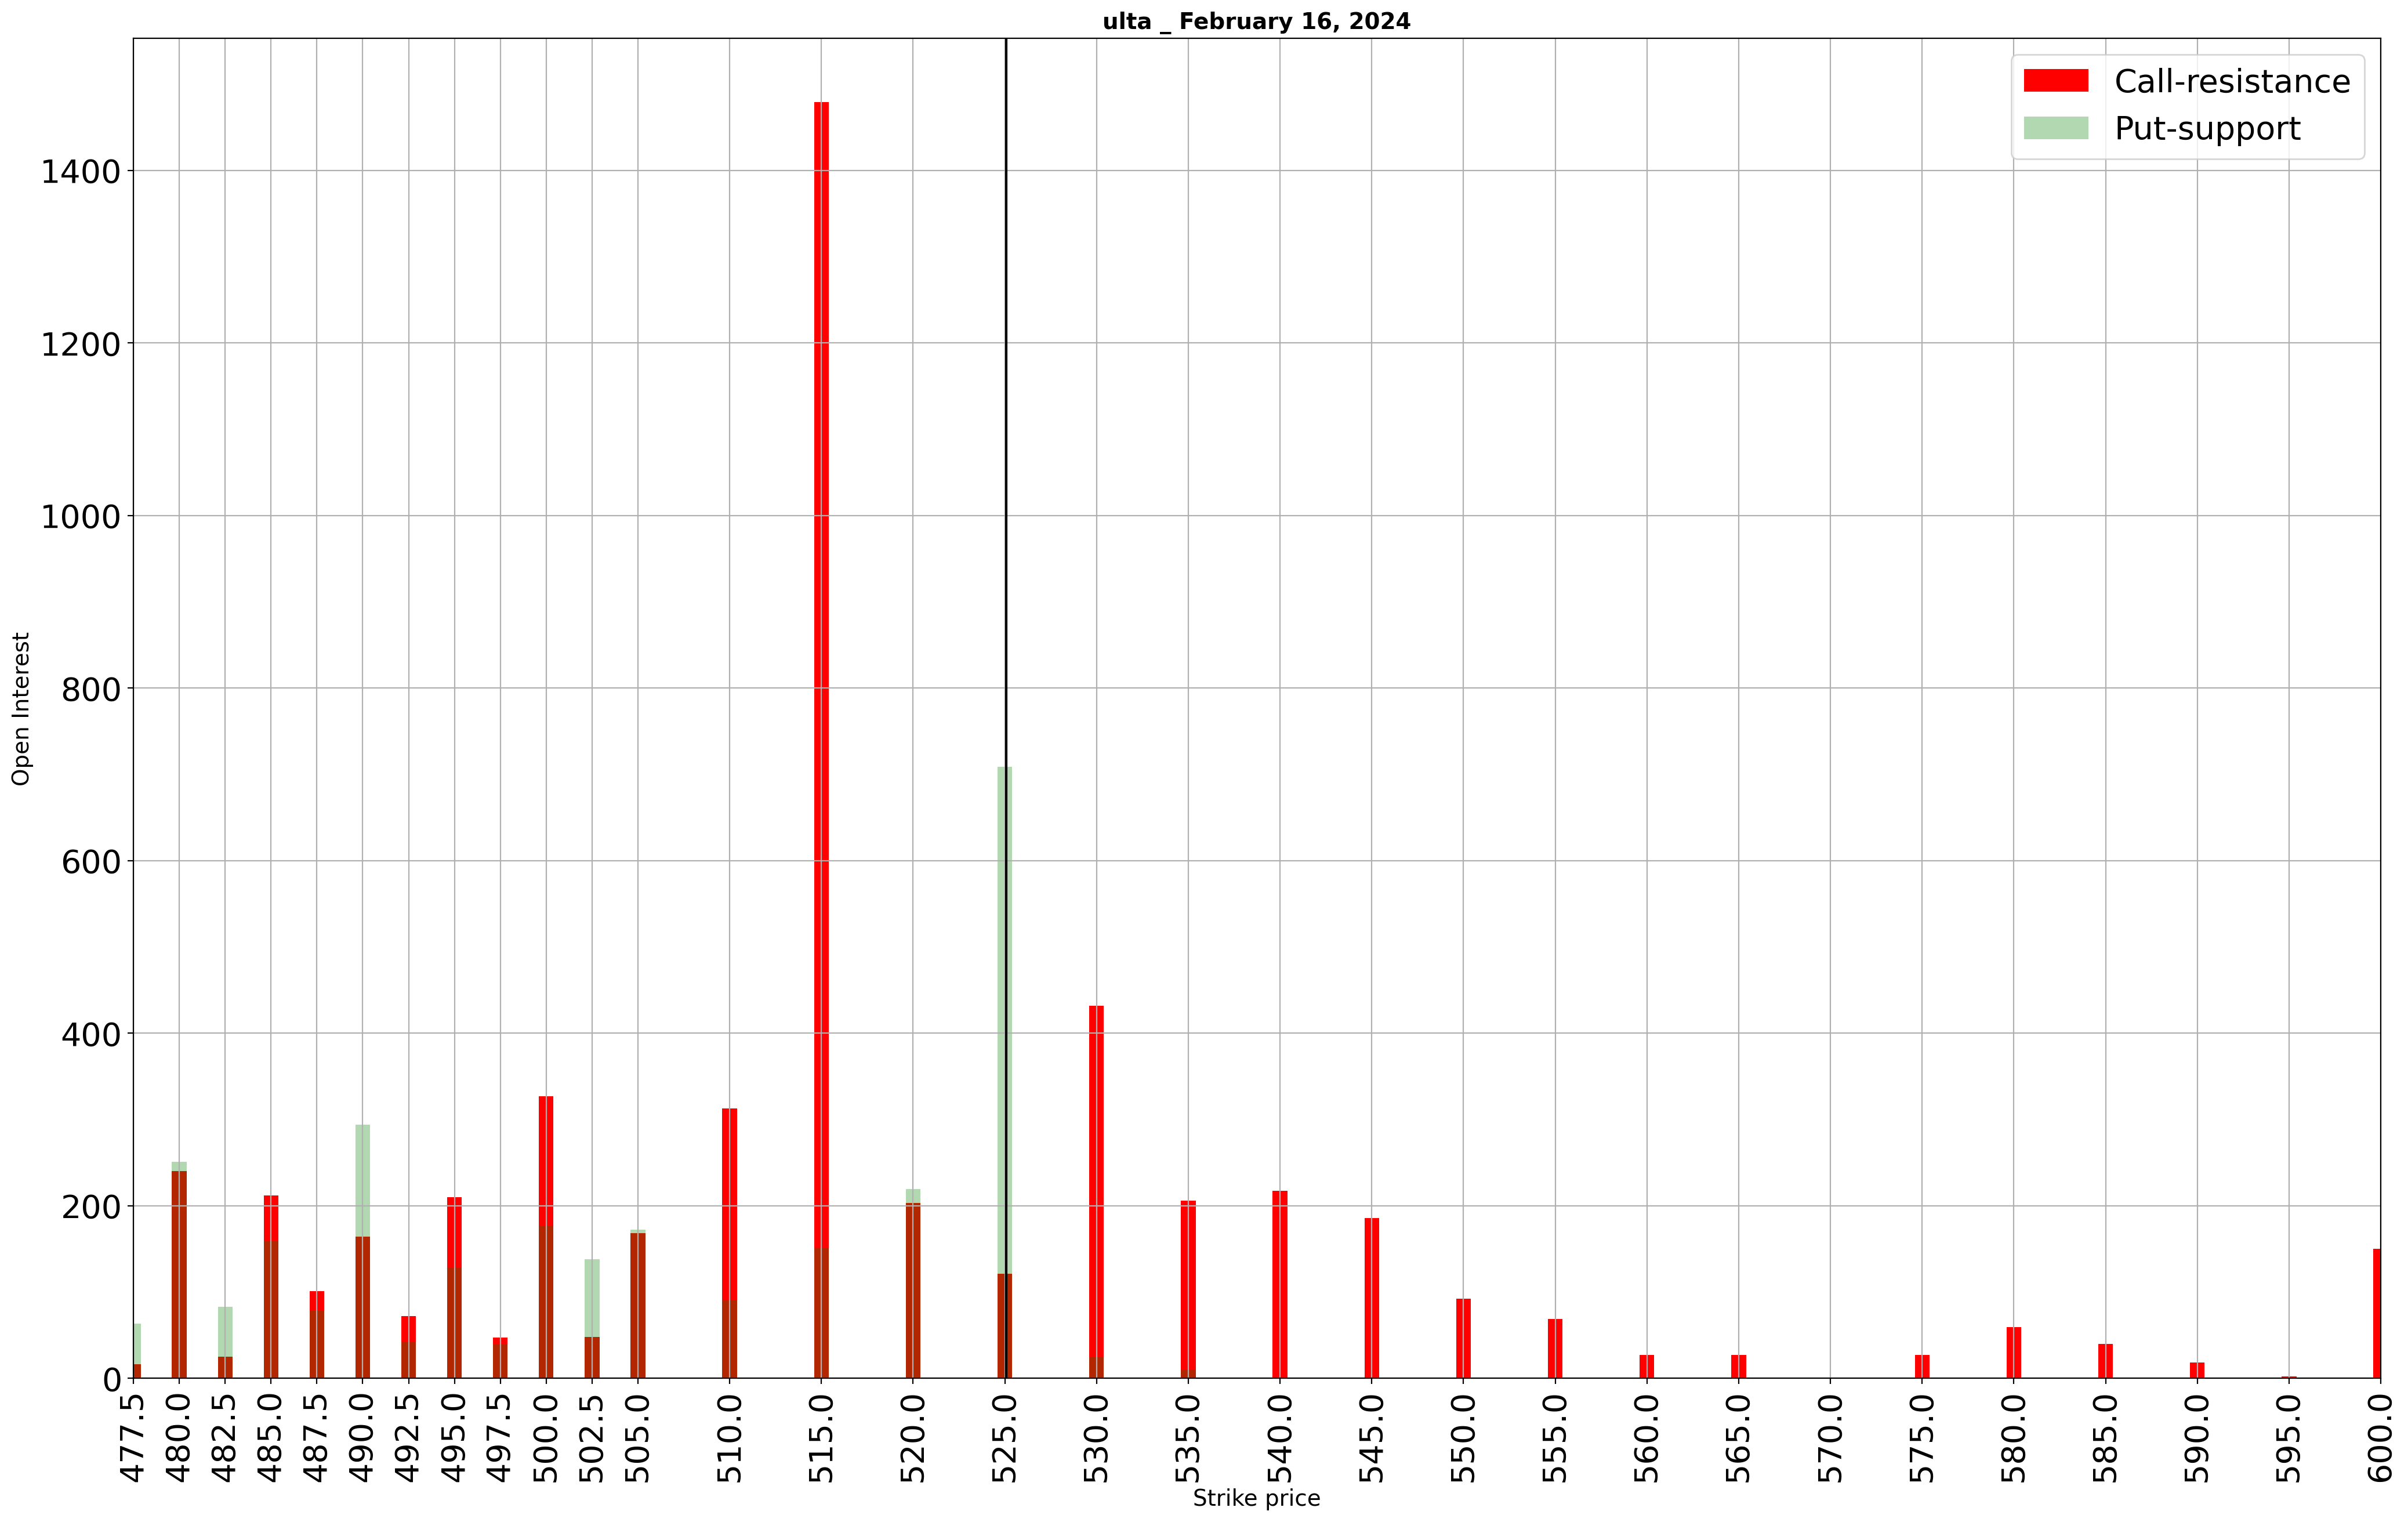

In [5]:
# symbols = ['SPY', 'ASML', 'META', 'AMZN', 'BABA', 'GOOGL', 'NXPI']

symbols= [ 'panw', 'pltr', 'plug', 'pypl', 'qcom', 'smci', 'tsla', 'ulta' ]

#symbols = ['nvda']
for symbol in symbols:
    df = options.get_options_chain(symbol)
    dates = options.get_expiration_dates(symbol)
    date = dates[0]
    cmp = si.get_live_price(symbol)

    #opt = df.option_chain(date)

    plt.figure(figsize=(25, 15), dpi=200)

    diff = 15
    i = np.abs(df['calls']['Strike'] - cmp).idxmin()
    size_ = df['calls']['Strike'].size

    if i + diff >= size_:
        b = size_ - 1
    else:
        b = i + diff

    if i - diff <= 0:
        a = 0
    else:
        a = i - diff

    plt.xticks(df['calls']['Strike'], fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    plt.xlim(df['calls']['Strike'][a], df['calls']['Strike'][b])
    plt.axvline(x=cmp, color='black')

    # Create the first y-axis for Open Interest
    plt.bar(df['calls']['Strike'], df['calls']['Open Interest'], label='Call-resistance', color='red')
    plt.bar(df['puts']['Strike'], df['puts']['Open Interest'], label='Put-support', alpha=0.3, color='green')
    
    plt.legend(fontsize=20, loc = 'upper left')
    
    plt.xlabel('Strike price')
    plt.ylabel('Open Interest')

    # Create the second y-axis for Volume
    #ax2 = plt.gca().twinx()
    #ax2.scatter(df['calls']['Strike'], df['calls']['Volume'], marker='o', s = 100, label='Call-resistance-v', color='b')
    #ax2.scatter(df['puts']['Strike'], df['puts']['Volume'], marker='D', s = 100, label='Put-support-v', color='k')

    plt.legend(fontsize=20)

    plt.grid(linestyle='dotted', which='minor')
    plt.grid(which='major')
    #plt.minorticks_on()

    plt.title(f'{symbol} _ {date}', weight='bold')

   
    #plt.savefig(f'./{current_datetime} {symbol}.jpg')
    
    plt.show()

In [12]:
data = options.get_options_chain("msft")
data['calls']['Strike']

0     190.0
1     200.0
2     210.0
3     220.0
4     230.0
      ...  
67    495.0
68    505.0
69    515.0
70    520.0
71    525.0
Name: Strike, Length: 72, dtype: float64

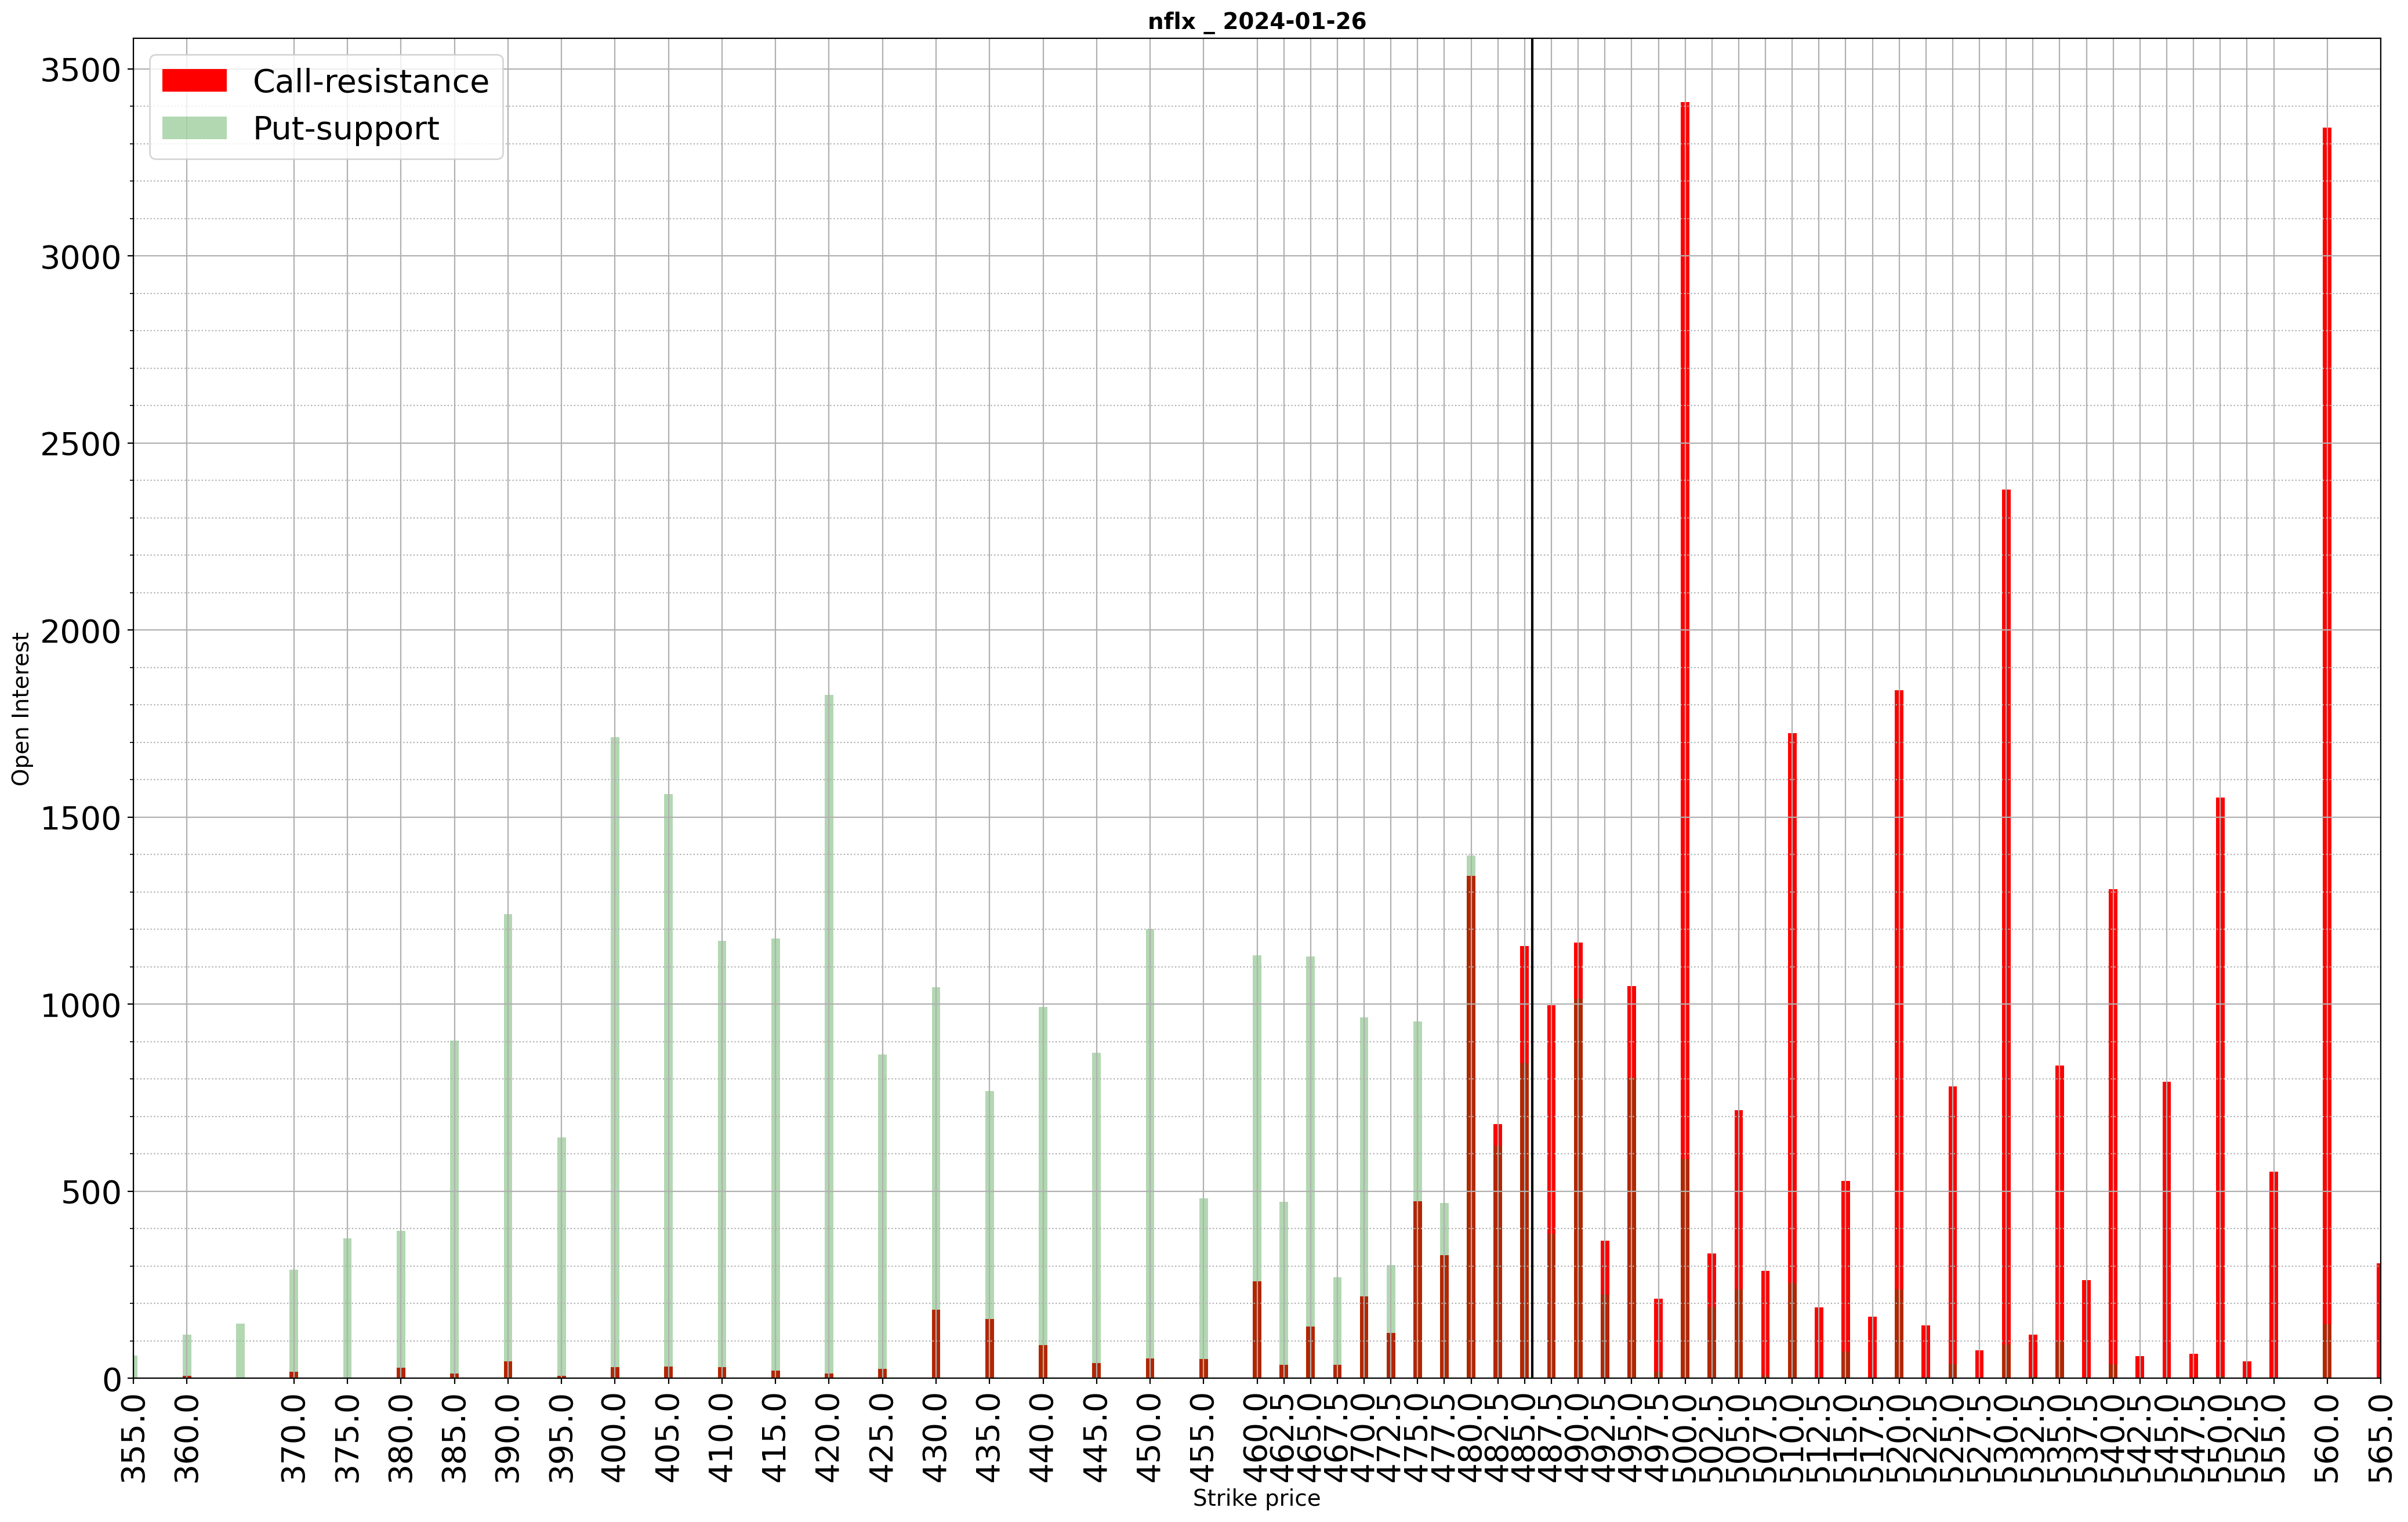

In [5]:
#date = '2024-01-19'
#symbols = ['SPY', 'ASML', 'META', 'AMZN', 'BABA', 'GOOGL', 'NXPI']
#symbols= ['acmr', 'adbe','alb', 'AMD', 'ARM', 'AVGO', 'crwd', 'etsy', 'fslr', 'FTNT', 'googl', 'meta', 'msft', 'nflx', 'NVDA', 'panw', 'pypl',  
#          'qcom', 'smci', 'tsla', 'ulta' ]
symbols = ['nflx']
for symbol in symbols:
    df = yf.Ticker(symbol)
    date = df.options[0]
    cmp = si.get_live_price(symbol)

    opt = df.option_chain(date)

    plt.figure(figsize = (25,15), dpi = 200)
 
######################################
    diff = 30
    i = np.abs(opt.calls['strike']-cmp).idxmin()
    size_ = opt.calls['strike'].size
    
    if i + diff >= size_:
        b = size_-1
    else:
        b = i + diff
        
    if i - diff <= 0:
        a = 0
    else:
        a = i - diff
###########################################

    plt.xticks(opt.calls['strike'], fontsize = 20, rotation = 90)
    plt.yticks(fontsize = 20)
    #plt.xlim([cmp-diff, cmp+diff])
    plt.xlim(opt.calls['strike'][a], opt.calls['strike'][b])
    plt.axvline(x = cmp,color = 'black')

    plt.bar(opt.calls['strike'], opt.calls['openInterest'], label = 'Call-resistance', color = 'red')
    plt.bar(opt.puts['strike'], opt.puts['openInterest'], label = 'Put-support', alpha = 0.3, color = 'green')
    plt.legend(fontsize = 20)

    plt.grid(linestyle = 'dotted', which = 'minor')
    plt.grid(which = 'major')
    plt.minorticks_on()
    
    plt.title(f'{symbol} _ {date}', weight='bold')
    
    plt.xlabel('Strike price')
    plt.ylabel('Open Interest')
    
    #savefig('Graph {0} ID {1}.jpg'.format(i+1, idx+1))
    
    #plt.legend()

    
    #plt.savefig(f'./{current_datetime} {symbol}.jpg')
    plt.show()
